## Business problem overview


In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

##### For many incumbent operators, retaining high profitable customers is the number one business goal.

 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

 

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

### Telecom Churn Case Study - Case Study Partner 

1. Lakshmi Narashimman 
2. Adit Paliwal
3. Sherin Lisa Antony

# Steps to solve this problem 

1. Data Understanding
2. Data Cleaning and Data Preparation
3. Exploratory Data Analysis 
4. Data preparation 
5. Data Modelling, prediction and evaluation
6. Final Inference 

In [1]:
# Importing the libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing most crucial modules

# Importing the logistic regression module
from sklearn.linear_model import LogisticRegression

# Import 'variance_inflation_factor' or VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Importing RFE for RFE selection
from sklearn.feature_selection import RFE

# Import statsmodels
import statsmodels.api as sm

# Import the precision recall curve
from sklearn.metrics import precision_recall_curve

# Import evaluation metrics from scikitlearn 
from sklearn import metrics

from sklearn.decomposition import IncrementalPCA

# To suppress the warnings which will be raised
import warnings
warnings.filterwarnings('ignore')

# Displaying all Columns without restrictions
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)

In [3]:
# Importing other crucial libraries to solve this problem

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [4]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import NearMiss, RandomUnderSampler
from imblearn.combine import SMOTEENN, SMOTETomek

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

from lightgbm import LGBMClassifier

# To display all the columns
pd.options.display.max_columns = None

# To display all the rows
pd.options.display.max_rows = None

# To map Empty Strings or numpy.inf as Na Values
pd.options.mode.use_inf_as_na = True

pd.options.display.expand_frame_repr =  False

%matplotlib inline

# Set Style
sns.set(style = "whitegrid")

In [112]:
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

# Step 1: Data Understanding 

In [5]:
tel_churn = pd.read_csv("telecom_churn_data.csv")
tel_churn.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7 last_date_of_month_8 last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2t_mou_9  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2m_mou_9  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2f_mou_9  std_og_t2c_mou_6  std_og_t2c_mou_7  std_og_t2c_mou_8  std_og_t2c_mou_9  std_og_mou_6  std_og_mou_7  std_og_mou_8  std_og_mou_9  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  isd_og_mou_9  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  spl_og_mou_9  og_others_6  og_others_7  og_others_8  og_others_9  total_og_mou_6  total_og_mou_7  total_og_mou_8  total_og_mou_9  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2t_mou_9  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2m_mou_9  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  loc_ic_t2f_mou_8  loc_ic_t2f_mou_9  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  loc_ic_mou_9  std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2t_mou_8  std_ic_t2t_mou_9  std_ic_t2m_mou_6  std_ic_t2m_mou_7  std_ic_t2m_mou_8  std_ic_t2m_mou_9  std_ic_t2f_mou_6  std_ic_t2f_mou_7  std_ic_t2f_mou_8  std_ic_t2f_mou_9  std_ic_t2o_mou_6  std_ic_t2o_mou_7  std_ic_t2o_mou_8  std_ic_t2o_mou_9  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  std_ic_mou_9  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  total_ic_mou_9  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  spl_ic_mou_9  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  isd_ic_mou_9  ic_others_6  ic_others_7  ic_others_8  ic_others_9  total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_num_9  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  total_rech_amt_9  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  max_rech_amt_9 date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8 date_of_last_rech_9  last_day_rch_amt_6  last_day_rch_amt_7  last_day_rch_amt_8  last_day_rch_amt_9 date_of_last_rech_data_6 date_of_last_rech_data_7 date_of_last_rech_data_8 date_of_last_rech_data_9  total_rech_data_6  total_rech_data_7  total_rech_data_8  total_rech_data_9  max_rech_data_6  max_rech_data_7  max_rech_data_8  max_rech_data_9  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_2g_9  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  count_rech_3g_9  av_rech_amt_data_6  av_rech_amt_data_7  av_rech_amt_data_8  av_rech_amt_data_9  vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8  vol_2g_mb_9  vol_3g_mb_6  vol_3g_mb_7  vol_3g_mb_8  vol_3g_mb_9  arpu_3g_6  arpu_3g_7  arpu_3g_8  arpu_3g_9  arpu_2g_6  arpu_2g_7  arpu_2g_8  arpu_2g_9  night_pck_user_6  night_pck_user_7  night_pck_user_8  night_pck_user_9  monthly_2g_6  monthly_2g_7  monthly_2g_8  monthly_2g_9  sachet_2g_6  sachet_2g_7  sachet_2g_8  sachet_2g_9  monthly_3g_6  monthly_3g_7  monthly_3g_8  monthly_3g_9  sachet_3g_6  sachet_3g_7  sachet_3g_8  sachet_3g_9  fb_user_6  fb_user_7  fb_user_8  fb_user_9   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g
0  7000842753     109        0.0             0.0             0.0             6/30/2014            7/31/2014            8/31/2014            9/30/2014            197.385  214.816  213.803  21.100  NaN          NaN           0.00        NaN          NaN           NaN            0.00         NaN           NaN            NaN             0.00          NaN            NaN            NaN             0.00          NaN 

In [6]:
tel_churn.tail()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7 last_date_of_month_8 last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2t_mou_9  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2m_mou_9  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2f_mou_9  std_og_t2c_mou_6  std_og_t2c_mou_7  std_og_t2c_mou_8  std_og_t2c_mou_9  std_og_mou_6  std_og_mou_7  std_og_mou_8  std_og_mou_9  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  isd_og_mou_9  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  spl_og_mou_9  og_others_6  og_others_7  og_others_8  og_others_9  total_og_mou_6  total_og_mou_7  total_og_mou_8  total_og_mou_9  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2t_mou_9  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2m_mou_9  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  loc_ic_t2f_mou_8  loc_ic_t2f_mou_9  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  loc_ic_mou_9  std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2t_mou_8  std_ic_t2t_mou_9  std_ic_t2m_mou_6  std_ic_t2m_mou_7  std_ic_t2m_mou_8  std_ic_t2m_mou_9  std_ic_t2f_mou_6  std_ic_t2f_mou_7  std_ic_t2f_mou_8  std_ic_t2f_mou_9  std_ic_t2o_mou_6  std_ic_t2o_mou_7  std_ic_t2o_mou_8  std_ic_t2o_mou_9  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  std_ic_mou_9  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  total_ic_mou_9  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  spl_ic_mou_9  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  isd_ic_mou_9  ic_others_6  ic_others_7  ic_others_8  ic_others_9  total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_num_9  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  total_rech_amt_9  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  max_rech_amt_9 date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8 date_of_last_rech_9  last_day_rch_amt_6  last_day_rch_amt_7  last_day_rch_amt_8  last_day_rch_amt_9 date_of_last_rech_data_6 date_of_last_rech_data_7 date_of_last_rech_data_8 date_of_last_rech_data_9  total_rech_data_6  total_rech_data_7  total_rech_data_8  total_rech_data_9  max_rech_data_6  max_rech_data_7  max_rech_data_8  max_rech_data_9  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_2g_9  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  count_rech_3g_9  av_rech_amt_data_6  av_rech_amt_data_7  av_rech_amt_data_8  av_rech_amt_data_9  vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8  vol_2g_mb_9  vol_3g_mb_6  vol_3g_mb_7  vol_3g_mb_8  vol_3g_mb_9  arpu_3g_6  arpu_3g_7  arpu_3g_8  arpu_3g_9  arpu_2g_6  arpu_2g_7  arpu_2g_8  arpu_2g_9  night_pck_user_6  night_pck_user_7  night_pck_user_8  night_pck_user_9  monthly_2g_6  monthly_2g_7  monthly_2g_8  monthly_2g_9  sachet_2g_6  sachet_2g_7  sachet_2g_8  sachet_2g_9  monthly_3g_6  monthly_3g_7  monthly_3g_8  monthly_3g_9  sachet_3g_6  sachet_3g_7  sachet_3g_8  sachet_3g_9  fb_user_6  fb_user_7  fb_user_8  fb_user_9   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g
99994  7001548952     109        0.0             0.0             0.0             6/30/2014            7/31/2014            8/31/2014            9/30/2014            18.471   69.161   57.530   29.950   5.40         3.36         5.91         0.00         15.19         54.46         52.79         27.14         0.0            0.0            0.0            0.00           0.0            0.0            0.0           

In [7]:
tel_churn.shape # There are 99999 rows and 226 columns in this dataframe 

(99999, 226)

In [8]:
tel_churn.size

22599774

In [9]:
# Creating original backup of data for other purposes 

original = tel_churn.copy()

In [10]:
# Checking the columns of telecom churn data

tel_churn.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

In [11]:
tel_churn.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9   onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2t_mou_9  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2m_mou_9  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2f_mou_9  std_og_t2c_mou_6  std_og_t2c_mou_7  std_og_t2c_mou_8  std_og_t2c_mou_9  std_og_mou_6  std_og_mou_7  std_og_mou_8  std_og_mou_9  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  isd_og_mou_9  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  spl_og_mou_9   og_others_6   og_others_7   og_others_8   og_others_9  total_og_mou_6  total_og_mou_7  total_og_mou_8  total_og_mou_9  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2t_mou_9  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2m_mou_9  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  loc_ic_t2f_mou_8  loc_ic_t2f_mou_9  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  loc_ic_mou_9  std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2t_mou_8  std_ic_t2t_mou_9  std_ic_t2m_mou_6  std_ic_t2m_mou_7  std_ic_t2m_mou_8  std_ic_t2m_mou_9  std_ic_t2f_mou_6  std_ic_t2f_mou_7  std_ic_t2f_mou_8  std_ic_t2f_mou_9  std_ic_t2o_mou_6  std_ic_t2o_mou_7  std_ic_t2o_mou_8  std_ic_t2o_mou_9  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  std_ic_mou_9  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  total_ic_mou_9  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  spl_ic_mou_9  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  isd_ic_mou_9   ic_others_6   ic_others_7   ic_others_8   ic_others_9  total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_num_9  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  total_rech_amt_9  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  max_rech_amt_9  last_day_rch_amt_6  last_day_rch_amt_7  last_day_rch_amt_8  last_day_rch_amt_9  total_rech_data_6  total_rech_data_7  total_rech_data_8  total_rech_data_9  max_rech_data_6  max_rech_data_7  max_rech_data_8  max_rech_data_9  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_2g_9  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  count_rech_3g_9  av_rech_amt_data_6  av_rech_amt_data_7  av_rech_amt_data_8  av_rech_amt_data_9   vol_2g_mb_6   vol_2g_mb_7   vol_2g_mb_8   vol_2g_mb_9   vol_3g_mb_6   vol_3g_mb_7   vol_3g_mb_8   vol_3g_mb_9     arpu_3g_6     arpu_3g_7     arpu_3g_8     arpu_3g_9     arpu_2g_6     arpu_2g_7     arpu_2g_8     arpu_2g_9  night_pck_user_6  night_pck_user_7  night_pck_user_8  night_pck_user_9  monthly_2g_6  monthly_2g_7  monthly_2g_8  monthly_2g_9   sachet_2g_6   sachet_2g_7   sachet_2g_8   sachet_2g_9  monthly_3g_6  monthly_3g_7  monthly_3g_8  monthly_3g_9   sachet_3g_6   sachet_3g_7   sachet_3g_8   sachet_3g_9     fb_user_6     fb_user_7     fb_user_8     fb_user_9           aon    aug_vbc_3g    jul_vbc_3g    jun_vbc_3g    sep_vbc_3g
count  9.999900e+04   99999.0    98981.0         98981.0         98981.0         99999.000000  99999.000000  99999.000000  99999.000000  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   96140.000000   94621.000000   92254.000000   96062.000000   96140.000000   94621.000000   92254.000000   96062.000000      96140.000000      94621.000000      92254.000000      96062.000000      96140.000000      94621.000000      92254.000000      96062.000000      96140.000000      94621.000000      92254.0000

In [12]:
# Finding the summary of feature type 

tel_churn.info(verbose = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

# Step 2: Data Cleaning and Data Preparation

In [13]:
# Let us find the missing values in this dataframe

tel_churn.isnull().sum()

mobile_number               0    
circle_id                   0    
loc_og_t2o_mou              1018 
std_og_t2o_mou              1018 
loc_ic_t2o_mou              1018 
last_date_of_month_6        0    
last_date_of_month_7        601  
last_date_of_month_8        1100 
last_date_of_month_9        1659 
arpu_6                      0    
arpu_7                      0    
arpu_8                      0    
arpu_9                      0    
onnet_mou_6                 3937 
onnet_mou_7                 3859 
onnet_mou_8                 5378 
onnet_mou_9                 7745 
offnet_mou_6                3937 
offnet_mou_7                3859 
offnet_mou_8                5378 
offnet_mou_9                7745 
roam_ic_mou_6               3937 
roam_ic_mou_7               3859 
roam_ic_mou_8               5378 
roam_ic_mou_9               7745 
roam_og_mou_6               3937 
roam_og_mou_7               3859 
roam_og_mou_8               5378 
roam_og_mou_9               7745 
loc_og_t2t_mou

In [14]:
# Finding the percentage of missing values for each feature

tel_churn.isna().sum()/tel_churn.isna().count()*100

mobile_number               0.000000 
circle_id                   0.000000 
loc_og_t2o_mou              1.018010 
std_og_t2o_mou              1.018010 
loc_ic_t2o_mou              1.018010 
last_date_of_month_6        0.000000 
last_date_of_month_7        0.601006 
last_date_of_month_8        1.100011 
last_date_of_month_9        1.659017 
arpu_6                      0.000000 
arpu_7                      0.000000 
arpu_8                      0.000000 
arpu_9                      0.000000 
onnet_mou_6                 3.937039 
onnet_mou_7                 3.859039 
onnet_mou_8                 5.378054 
onnet_mou_9                 7.745077 
offnet_mou_6                3.937039 
offnet_mou_7                3.859039 
offnet_mou_8                5.378054 
offnet_mou_9                7.745077 
roam_ic_mou_6               3.937039 
roam_ic_mou_7               3.859039 
roam_ic_mou_8               5.378054 
roam_ic_mou_9               7.745077 
roam_og_mou_6               3.937039 
roam_og_mou_

From the observations, it is clear that a few columns have more than 70% of the data missing. We would drop these columns because they convey a very little information


But the most important point is we have to filter the high value customers - Customers who have recharged the amount of more than or equal to 70th percentile of X in the good phase that is first two months. 

So, to get this we should have a list of columns that we should not drop


- total_rech_data_6 - 74.8467 % missing values
- total_rech_data_7 - 74.4287 % missing values
- av_rech_amt_data_6 - 74.8467 % missing values
- av_rech_amt_data_7 - 74.4287 % missing values

- date_of_last_rech_data_6 - 74.8467 % missing values
- date_of_last_rech_data_7 - 74.4287 % missing values

let us see how we can impute the missing values for these columns

In [15]:
# Now check for the duplicates

tel_churn.drop_duplicates(subset = None, inplace= True)
tel_churn.shape

(99999, 226)

In [16]:
# We will see if 'total_rech_data_6' and 'date_of_last_rech_data_6' columns have null values or not
# If both these columns have equal null values for the six month then we mean there was no recharge done for that month

total_rech_data_6_index = tel_churn['total_rech_data_6'].isnull()
date_of_last_rech_data_6_index = tel_churn['date_of_last_rech_data_6'].isnull()

if total_rech_data_6_index.equals(date_of_last_rech_data_6_index):
    print('The indexes for NULL values for month 6 are equal')

The indexes for NULL values for month 6 are equal


In [ ]:
# So we can impute 0 for 'total_rech_data_6' missing values and av_rech_amt_data_6' column as well 

In [17]:
tel_churn['total_rech_data_6'].fillna(0, inplace=True)
tel_churn['av_rech_amt_data_6'].fillna(0, inplace=True)

In [18]:
# Let us follow the same logic for total_rech_data_7', av_rech_amt_data_7, 'total_rech_data_8' & 'av_rech_amt_data_8' 
# columns too

total_rech_data_7_index = tel_churn['total_rech_data_7'].isnull()
date_of_last_rech_data_7_index = tel_churn['date_of_last_rech_data_7'].isnull()

if total_rech_data_7_index.equals(date_of_last_rech_data_7_index):
    print('The indexes for NULL values for month 7 are equal')


The indexes for NULL values for month 7 are equal


In [19]:
total_rech_data_8_index = tel_churn['total_rech_data_8'].isnull()
date_of_last_rech_data_8_index = tel_churn['date_of_last_rech_data_8'].isnull()

if total_rech_data_8_index.equals(date_of_last_rech_data_8_index):
    print('The indexes for NULL values for month 8 are equal')

The indexes for NULL values for month 8 are equal


In [ ]:
# From the above observations, it is evident that the missing values for 7th and 8th month are equal
# Hence, we can impute zeros for 'total_rech_data_7', av_rech_amt_data_7, 'total_rech_data_8' & 'av_rech_amt_data_8 columns too

In [20]:
# Month 7
tel_churn['total_rech_data_7'].fillna(0, inplace=True)
tel_churn['av_rech_amt_data_7'].fillna(0, inplace=True)

# Month 8
tel_churn['total_rech_data_8'].fillna(0, inplace=True)
tel_churn['av_rech_amt_data_8'].fillna(0, inplace=True)

In [21]:
# Let us again check for the missing percentage values

(tel_churn.isnull().sum(axis = 0)/ len(tel_churn)) * 100


mobile_number               0.000000 
circle_id                   0.000000 
loc_og_t2o_mou              1.018010 
std_og_t2o_mou              1.018010 
loc_ic_t2o_mou              1.018010 
last_date_of_month_6        0.000000 
last_date_of_month_7        0.601006 
last_date_of_month_8        1.100011 
last_date_of_month_9        1.659017 
arpu_6                      0.000000 
arpu_7                      0.000000 
arpu_8                      0.000000 
arpu_9                      0.000000 
onnet_mou_6                 3.937039 
onnet_mou_7                 3.859039 
onnet_mou_8                 5.378054 
onnet_mou_9                 7.745077 
offnet_mou_6                3.937039 
offnet_mou_7                3.859039 
offnet_mou_8                5.378054 
offnet_mou_9                7.745077 
roam_ic_mou_6               3.937039 
roam_ic_mou_7               3.859039 
roam_ic_mou_8               5.378054 
roam_ic_mou_9               7.745077 
roam_og_mou_6               3.937039 
roam_og_mou_

In [22]:
# Now let us check how many columns have more than 70% of data missing

cols_with_atleast_70_percent_missing_data = ((tel_churn.isnull().sum()/ len(tel_churn)) * 100) >= 70
cols_with_atleast_70_percent_missing_data.sum()

34

In [ ]:
# This shows that 34 columns have more than 70% of missing values. We will filter the high-value customers
# and then we will drop these columns.  

## New Feature Creation 

As we have values for av_rech_amt_data for 6,7, 8 and 9th months and total_rech_amt, we will create  new variable total_rech_data_amt for 6,7, 8 and 9th months. 

In [23]:
tel_churn['total_data_rech_amt_6'] = tel_churn['total_rech_data_6'] * tel_churn['av_rech_amt_data_6']
tel_churn['total_data_rech_amt_7'] = tel_churn['total_rech_data_7'] * tel_churn['av_rech_amt_data_7']
tel_churn['total_data_rech_amt_8'] = tel_churn['total_rech_data_8'] * tel_churn['av_rech_amt_data_8']
tel_churn['total_data_rech_amt_9'] = tel_churn['total_rech_data_9'] * tel_churn['av_rech_amt_data_9']


## Filtering high-value customers 

We should predict churn for the high-value customers. We find churn by filtering out the customers at 70th percentile of avg_rech_amt_data in the first two months.

In [24]:
# Lets compute the average recharge amount for the month 6 & 7. This total amount is equal to the sum of talk time recharge 
# and data recharge amounts for the respective months.

avg_recharge_amount_month_6_7 = tel_churn[['total_data_rech_amt_6','total_data_rech_amt_7','total_rech_amt_6',
                                             'total_rech_amt_7']].mean(axis = 1)

amount_70th_percentile = np.percentile(avg_recharge_amount_month_6_7, 70)

print("70th percentile of the average recharge amount in the first two months is - ", amount_70th_percentile)


70th percentile of the average recharge amount in the first two months is -  239.0


In [25]:
# Lets filter high-value customers

tel_churn = tel_churn[avg_recharge_amount_month_6_7 >= amount_70th_percentile]


In [26]:
tel_churn.shape # Checking the shape of high-value customers filtered

(30001, 230)

In [27]:
tel_churn.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7 last_date_of_month_8 last_date_of_month_9    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2t_mou_9  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2m_mou_9  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2f_mou_9  std_og_t2c_mou_6  std_og_t2c_mou_7  std_og_t2c_mou_8  std_og_t2c_mou_9  std_og_mou_6  std_og_mou_7  std_og_mou_8  std_og_mou_9  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  isd_og_mou_9  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  spl_og_mou_9  og_others_6  og_others_7  og_others_8  og_others_9  total_og_mou_6  total_og_mou_7  total_og_mou_8  total_og_mou_9  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2t_mou_9  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2m_mou_9  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  loc_ic_t2f_mou_8  loc_ic_t2f_mou_9  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  loc_ic_mou_9  std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2t_mou_8  std_ic_t2t_mou_9  std_ic_t2m_mou_6  std_ic_t2m_mou_7  std_ic_t2m_mou_8  std_ic_t2m_mou_9  std_ic_t2f_mou_6  std_ic_t2f_mou_7  std_ic_t2f_mou_8  std_ic_t2f_mou_9  std_ic_t2o_mou_6  std_ic_t2o_mou_7  std_ic_t2o_mou_8  std_ic_t2o_mou_9  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  std_ic_mou_9  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  total_ic_mou_9  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  spl_ic_mou_9  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  isd_ic_mou_9  ic_others_6  ic_others_7  ic_others_8  ic_others_9  total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_num_9  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  total_rech_amt_9  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  max_rech_amt_9 date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8 date_of_last_rech_9  last_day_rch_amt_6  last_day_rch_amt_7  last_day_rch_amt_8  last_day_rch_amt_9 date_of_last_rech_data_6 date_of_last_rech_data_7 date_of_last_rech_data_8 date_of_last_rech_data_9  total_rech_data_6  total_rech_data_7  total_rech_data_8  total_rech_data_9  max_rech_data_6  max_rech_data_7  max_rech_data_8  max_rech_data_9  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_2g_9  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  count_rech_3g_9  av_rech_amt_data_6  av_rech_amt_data_7  av_rech_amt_data_8  av_rech_amt_data_9  vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8  vol_2g_mb_9  vol_3g_mb_6  vol_3g_mb_7  vol_3g_mb_8  vol_3g_mb_9  arpu_3g_6  arpu_3g_7  arpu_3g_8  arpu_3g_9  arpu_2g_6  arpu_2g_7  arpu_2g_8  arpu_2g_9  night_pck_user_6  night_pck_user_7  night_pck_user_8  night_pck_user_9  monthly_2g_6  monthly_2g_7  monthly_2g_8  monthly_2g_9  sachet_2g_6  sachet_2g_7  sachet_2g_8  sachet_2g_9  monthly_3g_6  monthly_3g_7  monthly_3g_8  monthly_3g_9  sachet_3g_6  sachet_3g_7  sachet_3g_8  sachet_3g_9  fb_user_6  fb_user_7  fb_user_8  fb_user_9  aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  total_data_rech_amt_6  total_data_rech_amt_7  total_data_rech_amt_8  total_data_rech_amt_9
0   7000842753     109        0.0             0.0             0.0             6/30/2014            7/31/2014            8/31/2014            9/30/2014            197.385   214.816   213.803   21.100  NaN          NaN           0.00        NaN          NaN           NaN            0.00         NaN           NaN        

In [ ]:
# After filtering the high-value customers, the shape of tel_churn data is 30001, 230

## Rename columns 

In [28]:
# Rename month named vbc columns to format 6,7,8 and 9

tel_churn.rename(columns = {'jun_vbc_3g':'vbc_3g_6',
                               'jul_vbc_3g':'vbc_3g_7',
                               'aug_vbc_3g':'vbc_3g_8',
                               'sep_vbc_3g':'vbc_3g_9'}, inplace=True)

## Tagging churners and removing the attribute of the churn phase

To tage customers who have churned, we will calculate based on customers who have not made any calls (incoming or outgoing) AND not used any internet data even once in churn phase. The attributes used to do this are

- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9

We will create a separate dataset to tagged customers who are churn



In [29]:
churn_parameters_data = tel_churn[['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']]
churn_parameters_data.head()

total_ic_mou_9  total_og_mou_9  vol_2g_mb_9  vol_3g_mb_9
0   0.00            0.00            0.00         0.00       
7   0.00            0.00            0.00         0.00       
8   34.91           142.18          0.00         0.00       
21  252.61          1031.53         0.00         0.00       
23  127.48          127.63          13.93        314.74

So any customer who does not use any of the facility (calls or mobile data) during the 9th month, will have the row sum for the attributes equal to zero. This customer can be tagged as Churn (1) else the customer will be tagged as Not Churn (0).



In [30]:
tel_churn['churn'] = tel_churn.apply(lambda x: 1 if((x.total_ic_mou_9 == 0) & 
                                                          (x.total_og_mou_9 == 0) and 
                                                          (x.vol_2g_mb_9 == 0) and 
                                                          (x.vol_3g_mb_9 == 0)) else 0, axis=1)

In [31]:
tel_churn['churn'].head()


0     1
7     1
8     0
21    0
23    0
Name: churn, dtype: int64

In [ ]:
# When we compare the churn_parameters_data dataset and tel_churn['churn'] data we can find that the output matches

# Now let us remove all the attributes of the churn phase month 9

In [32]:
# Let us try to obtain all the columns in the columns that have 9

cols_with__9 = [col for col in tel_churn.columns if '_9' in col]
cols_with__9


['last_date_of_month_9',
 'arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'date_of_last_rech_data_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 

In [33]:
# We must drop the above list of last columns entirely 

print("Total number of columns to be dropped at this stage is - ", len(cols_with__9))


Total number of columns to be dropped at this stage is -  56


In [34]:
tel_churn.drop(cols_with__9, axis=1, inplace = True)


In [35]:
tel_churn.shape

(30001, 175)

In [ ]:
# After dropping the rows, we have 175 columns left 

## Data Cleaning and missing values treatment 

In [36]:
# Checking the percentage of missing values in columns 

(tel_churn.isnull().sum(axis = 0)/ len(tel_churn)) * 100


mobile_number               0.000000 
circle_id                   0.000000 
loc_og_t2o_mou              0.746642 
std_og_t2o_mou              0.746642 
loc_ic_t2o_mou              0.746642 
last_date_of_month_6        0.000000 
last_date_of_month_7        0.089997 
last_date_of_month_8        0.549982 
arpu_6                      0.000000 
arpu_7                      0.000000 
arpu_8                      0.000000 
onnet_mou_6                 1.816606 
onnet_mou_7                 1.789940 
onnet_mou_8                 3.913203 
offnet_mou_6                1.816606 
offnet_mou_7                1.789940 
offnet_mou_8                3.913203 
roam_ic_mou_6               1.816606 
roam_ic_mou_7               1.789940 
roam_ic_mou_8               3.913203 
roam_og_mou_6               1.816606 
roam_og_mou_7               1.789940 
roam_og_mou_8               3.913203 
loc_og_t2t_mou_6            1.816606 
loc_og_t2t_mou_7            1.789940 
loc_og_t2t_mou_8            3.913203 
loc_og_t2m_m

In [38]:
# We will check how many columns have more than 40% of missing values

total_cols_with_atleast_40_percent_missing_data = ((tel_churn.isnull().sum()/ len(tel_churn)) * 100) >= 40
total_cols_with_atleast_40_percent_missing_data.sum()




24

In [39]:
# We will obtain the column/feature names of columns that have more than 40% missing data 

cols_names_with_40_percent_missing_value = total_cols_with_atleast_40_percent_missing_data[
    total_cols_with_atleast_40_percent_missing_data > 0.40].index

cols_names_with_40_percent_missing_value


Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7',
       'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6',
       'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7',
       'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8'],
      dtype='object')

### We will examine the columns with more than 40% of missing values one by one 

As these columns have almost 50% of missing values, we cannot use it for prediction. Hence, we drop it

In [40]:
tel_churn.drop(['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8'], axis=1, inplace = True)


In [41]:
print("Column info for max_rech_data_6")
print("-------------------------------")
print(tel_churn.max_rech_data_6.describe())
print('-------------------------------------')
print("Total NULL values for max_rech_data_6 columns is - ", tel_churn.max_rech_data_6.isnull().sum())

Column info for max_rech_data_6
-------------------------------
count    16756.000000
mean     139.798580  
std      118.851784  
min      1.000000    
25%      25.000000   
50%      152.000000  
75%      198.000000  
max      1555.000000 
Name: max_rech_data_6, dtype: float64
-------------------------------------
Total NULL values for max_rech_data_6 columns is -  13245


In [43]:
print("Column info for max_rech_data_7")
print("-------------------------------")
print(tel_churn.max_rech_data_7.describe())
print('-------------------------------------')
print("Total NULL values for max_rech_data_7 columns is - ", tel_churn.max_rech_data_7.isnull().sum())

Column info for max_rech_data_7
-------------------------------
count    17057.000000
mean     140.431143  
std      120.247247  
min      1.000000    
25%      25.000000   
50%      152.000000  
75%      198.000000  
max      1555.000000 
Name: max_rech_data_7, dtype: float64
-------------------------------------
Total NULL values for max_rech_data_7 columns is -  12944


In [42]:
print("Column info for max_rech_data_8")
print("-------------------------------")
print(tel_churn.max_rech_data_8.describe())
print('-------------------------------------')
print("Total NULL values for max_rech_data_8 columns is - ", tel_churn.max_rech_data_8.isnull().sum())

Column info for max_rech_data_8
-------------------------------
count    15953.000000
mean     136.329217  
std      119.531924  
min      1.000000    
25%      25.000000   
50%      152.000000  
75%      198.000000  
max      1555.000000 
Name: max_rech_data_8, dtype: float64
-------------------------------------
Total NULL values for max_rech_data_8 columns is -  14048


In [ ]:
# From the above observations, it is obvious that the maximum value is 1555 and minimum value is 0
# So, we will impute the missing values with 0 as no recharge was done 

In [44]:
# Replace NA with 0

for col in ['max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8']:
    tel_churn[col].fillna(0, inplace=True)

In [ ]:
# All columns that have more than 40%missing values for months of 6,7,8 are related to mobile/internet 

One important observation that comes out is that for a particular month all these values have same number of missing values. The below data tells us the same -

- Count of missing values for Month 6 - count_rech_2g_6 13158 - count_rech_3g_6 13158 - arpu_3g_6 13158 - arpu_2g_6 13158 - night_pck_user_6 13158

- Count of missing values for Month 7 - count_rech_2g_7 13905 - count_rech_3g_7 13905 - arpu_3g_7 13905 - arpu_2g_7 13905 - night_pck_user_7 13905

- Count of missing values for Month 8 - count_rech_2g_8 14630 - count_rech_3g_8 14630 - arpu_3g_8 14630 - arpu_2g_8 14630 - night_pck_user_8 14630

So now lets check & confirm if these missing values from the respective months are all from the same observations/index

### Insight 1

One more insight from the given figures is that 8th month the number of missing values increases and this could possibly mean that the customer might have stopped using these services. This could be an indication that the particular customer is more likely to churn.

In [45]:
# Month 6

arpu_3g_6_index = tel_churn['arpu_3g_6'].isnull()
night_pck_user_6_index = tel_churn['night_pck_user_6'].isnull()
count_rech_2g_6_index = tel_churn['count_rech_2g_6'].isnull()
count_rech_3g_6_index = tel_churn['count_rech_3g_6'].isnull()
fb_user_6_index = tel_churn['fb_user_6'].isnull()

# If all the above objects/arrays are equal for all entries, then we can confirm that the missing values are all from the
# same observations/index.

if arpu_3g_6_index.equals(night_pck_user_6_index) & night_pck_user_6_index.equals(count_rech_2g_6_index) & count_rech_2g_6_index.equals(count_rech_3g_6_index) &  count_rech_3g_6_index.equals(fb_user_6_index):
    print('The indexes for NULL values for month 6 are equal')


# ***************************************************************************************************************************

# Month 7

arpu_3g_7_index = tel_churn['arpu_3g_7'].isnull()
night_pck_user_7_index = tel_churn['night_pck_user_7'].isnull()
count_rech_2g_7_index = tel_churn['count_rech_2g_7'].isnull()
count_rech_3g_7_index = tel_churn['count_rech_3g_7'].isnull()
fb_user_7_index = tel_churn['fb_user_7'].isnull()

# If all the above objects/arrays are equal for all entries, then we can confirm that the missing values are all from the
# same observations/index.

if arpu_3g_7_index.equals(night_pck_user_7_index) & night_pck_user_7_index.equals(count_rech_2g_7_index) & count_rech_2g_7_index.equals(count_rech_3g_7_index) &  count_rech_3g_7_index.equals(fb_user_7_index):
    print('The indexes for NULL values for month 7 are equal')

# ***************************************************************************************************************************

# Month 8

arpu_3g_8_index = tel_churn['arpu_3g_8'].isnull()
night_pck_user_8_index = tel_churn['night_pck_user_8'].isnull()
count_rech_2g_8_index = tel_churn['count_rech_2g_8'].isnull()
count_rech_3g_8_index = tel_churn['count_rech_3g_8'].isnull()
fb_user_8_index = tel_churn['fb_user_8'].isnull()

# If all the above objects/arrays are equal for all entries, then we can confirm that the missing values are all from the
# same observations/index.

if arpu_3g_8_index.equals(night_pck_user_8_index) & night_pck_user_8_index.equals(count_rech_2g_8_index) & count_rech_2g_8_index.equals(count_rech_3g_8_index) &  count_rech_3g_8_index.equals(fb_user_8_index):
    print('The indexes for NULL values for month 8 are equal')

The indexes for NULL values for month 6 are equal
The indexes for NULL values for month 7 are equal
The indexes for NULL values for month 8 are equal


## Insight 2 

If values are missing for internet usage, it means that customer is not using that particular service. It also means that customer is not using any add-on-services that require an internet pack 

So, we can impute the missing values with mobile data as 0 

Also we saw above that all the misssing values are from the same record i.e., say for example the column for max_rech_data_ for a particular month is missing then all the other attributes related to mobile internet are also missing. So every attribute can be imputed with 0.



In [46]:
# From the above inferences let's impute the missing values with 0

columns_to_impute = ['count_rech_2g_6', 'count_rech_2g_7',
       'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6',
       'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7',
       'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']

tel_churn[columns_to_impute] = tel_churn[columns_to_impute].fillna(0)

In [47]:
# We will check the information for the above columns 

tel_churn[columns_to_impute].info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   count_rech_2g_6   30001 non-null  float64
 1   count_rech_2g_7   30001 non-null  float64
 2   count_rech_2g_8   30001 non-null  float64
 3   count_rech_3g_6   30001 non-null  float64
 4   count_rech_3g_7   30001 non-null  float64
 5   count_rech_3g_8   30001 non-null  float64
 6   arpu_3g_6         30001 non-null  float64
 7   arpu_3g_7         30001 non-null  float64
 8   arpu_3g_8         30001 non-null  float64
 9   arpu_2g_6         30001 non-null  float64
 10  arpu_2g_7         30001 non-null  float64
 11  arpu_2g_8         30001 non-null  float64
 12  night_pck_user_6  30001 non-null  float64
 13  night_pck_user_7  30001 non-null  float64
 14  night_pck_user_8  30001 non-null  float64
 15  fb_user_6         30001 non-null  float64
 16  fb_user_7         30001 non-null  float6

In [ ]:
# Now, we have removed the missing values from columns that have more than 40% missing data 

### Columns that have zero variance

Before continuing with the remaining missing values analysis, let us check if columns have zero variance. This helps us while performing the Principal Component Analysis 

We have two methods for this

- nunique()
- var()



We will check both the methods

In [48]:
# Variance  - df.var() method

columns_with_0_variance = tel_churn.var() == 0
print("Total columns with ZERO variance are - ", columns_with_0_variance.sum())

column_name_with_0_variance = columns_with_0_variance[columns_with_0_variance == 1].index
print(column_name_with_0_variance)

print("\n------------------------------------------------------------------------------\n")


columns_with_1_unique_value = tel_churn.nunique() == 1
print("Total columns with only ONE unique value are - ", columns_with_1_unique_value.sum())

column_name_with_1_unique_value = columns_with_1_unique_value[columns_with_1_unique_value == 1].index
print(column_name_with_1_unique_value)

Total columns with ZERO variance are -  9
Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'],
      dtype='object')

------------------------------------------------------------------------------

Total columns with only ONE unique value are -  13
Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'],
      dtype='object')


In [ ]:
# There are 4 columns for a difference in result. We will drop non-data columns now and later data columns 

In [49]:
# Dropping the non - date columns 

tel_churn.drop(column_name_with_0_variance, axis=1, inplace = True)

In [50]:
# Noe let us have another glimpse of the data

tel_churn.head()

mobile_number  circle_id last_date_of_month_6 last_date_of_month_7 last_date_of_month_8    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  og_others_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  loc_ic_t2f_mou_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2t_mou_8  std_ic_t2m_mou_6  std_ic_t2m_mou_7  std_ic_t2m_mou_8  std_ic_t2f_mou_6  std_ic_t2f_mou_7  std_ic_t2f_mou_8  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  ic_others_6  ic_others_7  ic_others_8  total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8 date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8  last_day_rch_amt_6  last_day_rch_amt_7  last_day_rch_amt_8  total_rech_data_6  total_rech_data_7  total_rech_data_8  max_rech_data_6  max_rech_data_7  max_rech_data_8  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  av_rech_amt_data_6  av_rech_amt_data_7  av_rech_amt_data_8  vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8  vol_3g_mb_6  vol_3g_mb_7  vol_3g_mb_8  arpu_3g_6  arpu_3g_7  arpu_3g_8  arpu_2g_6  arpu_2g_7  arpu_2g_8  night_pck_user_6  night_pck_user_7  night_pck_user_8  monthly_2g_6  monthly_2g_7  monthly_2g_8  sachet_2g_6  sachet_2g_7  sachet_2g_8  monthly_3g_6  monthly_3g_7  monthly_3g_8  sachet_3g_6  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  fb_user_8  aon  vbc_3g_8  vbc_3g_7  vbc_3g_6  total_data_rech_amt_6  total_data_rech_amt_7  total_data_rech_amt_8  churn
0   7000842753     109        6/30/2014            7/31/2014            8/31/2014            197.385   214.816   213.803  NaN          NaN           0.00        NaN           NaN            0.00         NaN            NaN             0.00          NaN            NaN             0.00          NaN               NaN                0.00             NaN               NaN                0.00             NaN               NaN                0.00             NaN               NaN                0.00             NaN           NaN            0.00         NaN               NaN                0.00             NaN               NaN                0.00             NaN               NaN                0.00             NaN           NaN            0.00         NaN           NaN            0.00         NaN           NaN            0.00         NaN          NaN           0.0          0.00            0.00            0.00           NaN               NaN                0.16             NaN               NaN                4.13             NaN               NaN                1.15             NaN           NaN            5.44         NaN               NaN                0.00             NaN               NaN                0.00             NaN               NaN                0.00             NaN           NaN            0.00          0.00            0.00            5.44           NaN           NaN            0.0          NaN           NaN        

In [51]:
# We will look again at the missing values

columns_with_null_values = tel_churn.columns[tel_churn.isna().any()].tolist()
print(columns_with_null_values)

['last_date_of_month_7', 'last_date_of_month_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7',

In [52]:
cols_with_null_values_for_month_6 = [col for col in columns_with_null_values if '_6' in col]

tel_churn[cols_with_null_values_for_month_6].info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   onnet_mou_6          29456 non-null  float64
 1   offnet_mou_6         29456 non-null  float64
 2   roam_ic_mou_6        29456 non-null  float64
 3   roam_og_mou_6        29456 non-null  float64
 4   loc_og_t2t_mou_6     29456 non-null  float64
 5   loc_og_t2m_mou_6     29456 non-null  float64
 6   loc_og_t2f_mou_6     29456 non-null  float64
 7   loc_og_t2c_mou_6     29456 non-null  float64
 8   loc_og_mou_6         29456 non-null  float64
 9   std_og_t2t_mou_6     29456 non-null  float64
 10  std_og_t2m_mou_6     29456 non-null  float64
 11  std_og_t2f_mou_6     29456 non-null  float64
 12  std_og_mou_6         29456 non-null  float64
 13  isd_og_mou_6         29456 non-null  float64
 14  spl_og_mou_6         29456 non-null  float64
 15  og_others_6          29456 non-null 

In [ ]:
# Out of 30001 observations, we have 29456 non-null values
# This means 545 missing values are related to the month 6

# These missing values are related to minutes of usage calls
# So, we will impute 0 for 7,8 and 9th months 

In [53]:
# Before proceeding further, we will confirm this for 7th and 8th months 

# Month 7
print("*************************Month 7*************************\n")
cols_with_null_values_for_month_7 = [col for col in columns_with_null_values if '_7' in col]
print(tel_churn[cols_with_null_values_for_month_7].info())

# Month 8
print("\n*************************Month 8*************************\n")
cols_with_null_values_for_month_8 = [col for col in columns_with_null_values if '_8' in col]
print(tel_churn[cols_with_null_values_for_month_8].info())

*************************Month 7*************************

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   last_date_of_month_7  29974 non-null  object 
 1   onnet_mou_7           29464 non-null  float64
 2   offnet_mou_7          29464 non-null  float64
 3   roam_ic_mou_7         29464 non-null  float64
 4   roam_og_mou_7         29464 non-null  float64
 5   loc_og_t2t_mou_7      29464 non-null  float64
 6   loc_og_t2m_mou_7      29464 non-null  float64
 7   loc_og_t2f_mou_7      29464 non-null  float64
 8   loc_og_t2c_mou_7      29464 non-null  float64
 9   loc_og_mou_7          29464 non-null  float64
 10  std_og_t2t_mou_7      29464 non-null  float64
 11  std_og_t2m_mou_7      29464 non-null  float64
 12  std_og_t2f_mou_7      29464 non-null  float64
 13  std_og_mou_7          29464 non-null  float64
 14  isd_og_mou_

### Insight 3 

From the 8th month, the number of missing values increases and this could possibly mean that the customer might have stopped using these services. This could be an indication that the particular customer is more likely to churn.



Not using service means it can imputed with 0

In [54]:
# Let's impute the missing values from the above columns with 0. There are 3 column with date values - 'date_of_last_rech'.
# We do not want to impute date objects with 0. So will exclude it for now.

for column in columns_with_null_values:
    if "date_of_last_rech" not in column:
        tel_churn[column].fillna(0, inplace=True)


In [55]:
# Lets again have the glimpse of data

tel_churn.head()

mobile_number  circle_id last_date_of_month_6 last_date_of_month_7 last_date_of_month_8    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  og_others_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  loc_ic_t2f_mou_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2t_mou_8  std_ic_t2m_mou_6  std_ic_t2m_mou_7  std_ic_t2m_mou_8  std_ic_t2f_mou_6  std_ic_t2f_mou_7  std_ic_t2f_mou_8  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  ic_others_6  ic_others_7  ic_others_8  total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8 date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8  last_day_rch_amt_6  last_day_rch_amt_7  last_day_rch_amt_8  total_rech_data_6  total_rech_data_7  total_rech_data_8  max_rech_data_6  max_rech_data_7  max_rech_data_8  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  av_rech_amt_data_6  av_rech_amt_data_7  av_rech_amt_data_8  vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8  vol_3g_mb_6  vol_3g_mb_7  vol_3g_mb_8  arpu_3g_6  arpu_3g_7  arpu_3g_8  arpu_2g_6  arpu_2g_7  arpu_2g_8  night_pck_user_6  night_pck_user_7  night_pck_user_8  monthly_2g_6  monthly_2g_7  monthly_2g_8  sachet_2g_6  sachet_2g_7  sachet_2g_8  monthly_3g_6  monthly_3g_7  monthly_3g_8  sachet_3g_6  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  fb_user_8  aon  vbc_3g_8  vbc_3g_7  vbc_3g_6  total_data_rech_amt_6  total_data_rech_amt_7  total_data_rech_amt_8  churn
0   7000842753     109        6/30/2014            7/31/2014            8/31/2014            197.385   214.816   213.803   0.00         0.00         0.00         0.00          0.00          0.00          0.00           0.00           0.00           0.00           0.00           0.00           0.00              0.00              0.00              0.00              0.00              0.00              0.00              0.00              0.00              0.0               0.0               0.00              0.00          0.00          0.00          0.00              0.00              0.00              0.00              0.00              0.00              0.00              0.00              0.00              0.00          0.00          0.00          0.0           0.00          0.00          0.0           0.0           0.00          0.0          0.0          0.0          0.00            0.00            0.00            0.00              0.00              0.16              0.00              0.00              4.13              0.00              0.00              1.15              0.00          0.00          5.44          0.00              0.00              0.00              0.00              0.00              0.00              0.00              0.00              0.00              0.00          0.00          0.00          0.00            0.00            5.44            0.00          0.0           0.0           0.00          0.00      

In [56]:
# Now, let us look at the date columns that we excluded 

date_columns = ['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 
                'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8']

tel_churn[date_columns].info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   date_of_last_rech_6   29928 non-null  object
 1   date_of_last_rech_7   29903 non-null  object
 2   date_of_last_rech_8   29418 non-null  object
 3   last_date_of_month_6  30001 non-null  object
 4   last_date_of_month_7  30001 non-null  object
 5   last_date_of_month_8  30001 non-null  object
dtypes: object(6)
memory usage: 1.6+ MB


In [57]:
# As date columns may not be of any use to the analysis, we will drop it now

tel_churn.drop(date_columns, axis=1, inplace = True)


In [58]:
# Let us look at the decription of missing values again

print(tel_churn.isnull().sum())


mobile_number            0
circle_id                0
arpu_6                   0
arpu_7                   0
arpu_8                   0
onnet_mou_6              0
onnet_mou_7              0
onnet_mou_8              0
offnet_mou_6             0
offnet_mou_7             0
offnet_mou_8             0
roam_ic_mou_6            0
roam_ic_mou_7            0
roam_ic_mou_8            0
roam_og_mou_6            0
roam_og_mou_7            0
roam_og_mou_8            0
loc_og_t2t_mou_6         0
loc_og_t2t_mou_7         0
loc_og_t2t_mou_8         0
loc_og_t2m_mou_6         0
loc_og_t2m_mou_7         0
loc_og_t2m_mou_8         0
loc_og_t2f_mou_6         0
loc_og_t2f_mou_7         0
loc_og_t2f_mou_8         0
loc_og_t2c_mou_6         0
loc_og_t2c_mou_7         0
loc_og_t2c_mou_8         0
loc_og_mou_6             0
loc_og_mou_7             0
loc_og_mou_8             0
std_og_t2t_mou_6         0
std_og_t2t_mou_7         0
std_og_t2t_mou_8         0
std_og_t2m_mou_6         0
std_og_t2m_mou_7         0
s

### Insight 4

We will drop columns and attributes like total_ic_mou_9, total_og_mou_9, vol_2g_mb_9 and vol_3g_mb_9 on incoming, outgoing calls and internet data usage volume as it may lead to multicollinearity 

In [59]:
# Let's drop individual columns whose totals are available as a different attribute

individual_cols = ['loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8',
                   'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
                   'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8',
                   'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8',
                   'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8',
                   'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8',
                   'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
                   'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
                   'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
                   'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
                   'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8',
                   'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8',
                   'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8',
                   'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
                   'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
                   'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
                   'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8']

tel_churn.drop(individual_cols, axis = 1, inplace = True)

tel_churn.shape

(30001, 106)

### Rows 

In [61]:
# We will check the revenues columns to see if there is any discrepency in data

# Let's check the data description for the arpu columns

arpu_columns = ['arpu_6', 'arpu_7', 'arpu_8']

def describe_ARPU_Columns():
    for column in arpu_columns:
        print("Column Description for -",column, end='\n')
        print(tel_churn[column].describe(), end='\n')
        print("----------------------------------------", end='\n')

describe_ARPU_Columns()



Column Description for - arpu_6
count    30001.000000
mean     558.490824  
std      460.640461  
min     -2258.709000 
25%      309.865000  
50%      481.694000  
75%      699.943000  
max      27731.088000
Name: arpu_6, dtype: float64
----------------------------------------
Column Description for - arpu_7
count    30001.000000
mean     560.782203  
std      479.776947  
min     -2014.045000 
25%      309.826000  
50%      480.943000  
75%      698.315000  
max      35145.834000
Name: arpu_7, dtype: float64
----------------------------------------
Column Description for - arpu_8
count    30001.000000
mean     508.597957  
std      501.961981  
min     -945.808000  
25%      231.473000  
50%      427.585000  
75%      661.491000  
max      33543.624000
Name: arpu_8, dtype: float64
----------------------------------------


In the above statistical description, it is evident the ARPU (Average Revenue Per User) minimum value is marked as negative. If a customer does not use the service, it must be zero. But it is marked as negative. This means those negative value data are wrong/corrupt ones.



In [62]:
# We will go ahead for the months 6,7,8 and find out this 

# Index where the arpu values for month 6 are less than 0 -

arpu_6_index = (tel_churn['arpu_6'] < 0)
    
# Total number of such observations for month 6 -
print('Total observations with negative arpu values for month 6 -', arpu_6_index.sum())


Total observations with negative arpu values for month 6 - 39


In [63]:
# Index where the arpu values for month 7 are less than 0 -

arpu_7_index = (tel_churn['arpu_7'] < 0)
    
# Total number of such observations for month 7 -
print('Total observations with negative arpu values for month 7 -', arpu_7_index.sum())

Total observations with negative arpu values for month 7 - 50


In [64]:
# Index where the arpu values for month 8 are less than 0 -

arpu_8_index = (tel_churn['arpu_8'] < 0)
    
# Total number of such observations for month 8 -
print('Total observations with negative arpu values for month 8 -', arpu_8_index.sum())


Total observations with negative arpu values for month 8 - 90


In total, there are totally 179 observations that have negative values. We will drop those observations from the data

In [65]:
# Let's delete the observations with negative arpu values. 

tel_churn = tel_churn[(tel_churn['arpu_6'] >= 0) & 
                            (tel_churn['arpu_7'] >= 0) & 
                            (tel_churn['arpu_8'] >= 0)]

In [66]:
tel_churn.shape

(29824, 106)

In [ ]:
# Let us now go ahead with Exploratory Data Analysis (EDA)

# Step 3: Exploratory Data Analysis 

## Checking the presence of categorical variables 

In [68]:
# Summay statistics 

tel_churn.describe()

mobile_number  circle_id        arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8   og_others_6   og_others_7   og_others_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8   ic_others_6   ic_others_7   ic_others_8  total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  total_rech_data_6  total_rech_data_7  total_rech_data_8  max_rech_data_6  max_rech_data_7  max_rech_data_8  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8   vol_2g_mb_6   vol_2g_mb_7   vol_2g_mb_8   vol_3g_mb_6   vol_3g_mb_7   vol_3g_mb_8  night_pck_user_6  night_pck_user_7  night_pck_user_8  monthly_2g_6  monthly_2g_7  monthly_2g_8   sachet_2g_6   sachet_2g_7   sachet_2g_8  monthly_3g_6  monthly_3g_7  monthly_3g_8   sachet_3g_6   sachet_3g_7   sachet_3g_8     fb_user_6     fb_user_7     fb_user_8           aon      vbc_3g_8      vbc_3g_7      vbc_3g_6  total_data_rech_amt_6  total_data_rech_amt_7  total_data_rech_amt_8         churn
count  2.982400e+04   29824.0    29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000   29824.000000   29824.000000   29824.000000   29824.000000   29824.000000   29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000    29824.000000    29824.000000    29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000    29824.000000    29824.000000    29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000      29824.000000      29824.000000      29824.000000      29824.000000      29824.000000      29824.000000    29824.000000    29824.000000    29824.000000       29824.00000        29824.000000       29824.000000     29824.000000     29824.000000     29824.000000     29824.000000     29824.000000     29824.000000     29824.000000     29824.000000     29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000      29824.000000      29824.000000      29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000           29824.000000           29824.000000           29824.000000
mean   7.001205e+09   109.0      559.219456    562.562717    510.085640    261.221418    268.432668    234.713851    373.290400    378.524141    335.496097    16.163287      12.665772      12.540844      26.587856      20.221840      19.959368      254.184985    255.602001    236.198045    347.042871    364.456108    307.816943    2.157038      2.105380      1.955376      5.820176      7.118840      6.572885      0.661218      0.043034      0.057949      609.875318      629.333328      552.608763      231.763090    235.266615    224.307171    46.913021     49.226000     44.591636     290.629534      297.906546      281.173369      0.061103      0.019789      0.026632      10.731791     11.881996     11.018455     1.152407      1.504573      1.222134      11.85763

Some variables like night_pck_user_6, night_pck_user_7, night_pck_user_8, fb_user_6, fb_user_7 and fb_user_8 are encoded with 0 and 1. This means these are ordered categorical variables.



Also, we can convert these data types to integers

In [69]:
category_list = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']

tel_churn[category_list] = tel_churn[category_list].astype(int)

tel_churn[category_list].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29824 entries, 0 to 99997
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   night_pck_user_6  29824 non-null  int32
 1   night_pck_user_7  29824 non-null  int32
 2   night_pck_user_8  29824 non-null  int32
 3   fb_user_6         29824 non-null  int32
 4   fb_user_7         29824 non-null  int32
 5   fb_user_8         29824 non-null  int32
dtypes: int32(6)
memory usage: 932.0 KB


## Checking for duplicate rows

In [70]:
# Using the mobile number variable, let us check if all the variables are unique are not

if len(tel_churn['mobile_number'].unique()) == len(tel_churn.index):
    print("No Duplicates. Each Mobile Number is unique.")
else:
    print("Duplicate observations present.")

No Duplicates. Each Mobile Number is unique.


In [71]:
# We also do not need mobile number for our analysis. So, we will drop that variable

tel_churn.drop(['mobile_number'], axis=1, inplace = True)

# Data glimpse
tel_churn.head()


circle_id    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  og_others_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  ic_others_6  ic_others_7  ic_others_8  total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  total_rech_data_6  total_rech_data_7  total_rech_data_8  max_rech_data_6  max_rech_data_7  max_rech_data_8  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8  vol_3g_mb_6  vol_3g_mb_7  vol_3g_mb_8  night_pck_user_6  night_pck_user_7  night_pck_user_8  monthly_2g_6  monthly_2g_7  monthly_2g_8  sachet_2g_6  sachet_2g_7  sachet_2g_8  monthly_3g_6  monthly_3g_7  monthly_3g_8  sachet_3g_6  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  fb_user_8  aon  vbc_3g_8  vbc_3g_7  vbc_3g_6  total_data_rech_amt_6  total_data_rech_amt_7  total_data_rech_amt_8  churn
0   109        197.385   214.816   213.803   0.00         0.00         0.00         0.00          0.00          0.00          0.00           0.00           0.00           0.00           0.00           0.00           0.00          0.00          0.00          0.00          0.00          0.00          0.0           0.00          0.00          0.0           0.0           0.00          0.0          0.0          0.0          0.00            0.00            0.00            0.00          0.00          5.44          0.00          0.00          0.00          0.00            0.00            5.44            0.00          0.0           0.0           0.00          0.00          0.00          0.00         0.00         0.00         4                 3                 2                 362               252               252               252             252             252             1.0                1.0                1.0                252.0            252.0            252.0            0.0              0.0              0.0              1.0              1.0              1.0              30.13        1.32         5.75         83.57        150.76       109.61       0                 0                 0                 0             0             0             0            0            0            1             1             1             0            0            0            1          1          1          968  30.40     0.00      101.20    252.0                  252.0                  252.0                  1    
7   109        1069.180  1349.850  3171.480  57.84        54.68        52.29        453.43        567.16        325.91        16.23          33.49          31.64          23.74          12.59          38.06          422.16        533.91        255.79        60.86         75.14         77.84         0.0           0.18          10.01         4.5           0.0           6.50          0.0          0.0          0.0          487.53          609.24          350.16          427.88        355.23        188.04        180.54        173.08        193.94        626.46          558.04          428.74          0.21          0.0           0.0           2.06          14.53         31.59         15.74        15.19        15.14        5                 5                 7                 1580              790               3638              1580            790             1580            0.0                0.0                0.0                0.0    

## Univariate analysis - Ordered Categorical variables 

In [72]:
# Custom Function to add data labels in the graph

def add_data_labels(ax, spacing = 5):

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.2f}%".format(y_value)

        # Create annotation
        plt.annotate(
            label,                        # Use `label` as label
            (x_value, y_value),           # Place label at end of the bar
            xytext = (0, space),          # Vertically shift label by `space`
            textcoords = "offset points", # Interpret `xytext` as offset in points
            ha = 'center',                # Horizontally center label
            va = va)                      # Vertically align label differently for positive and negative values.


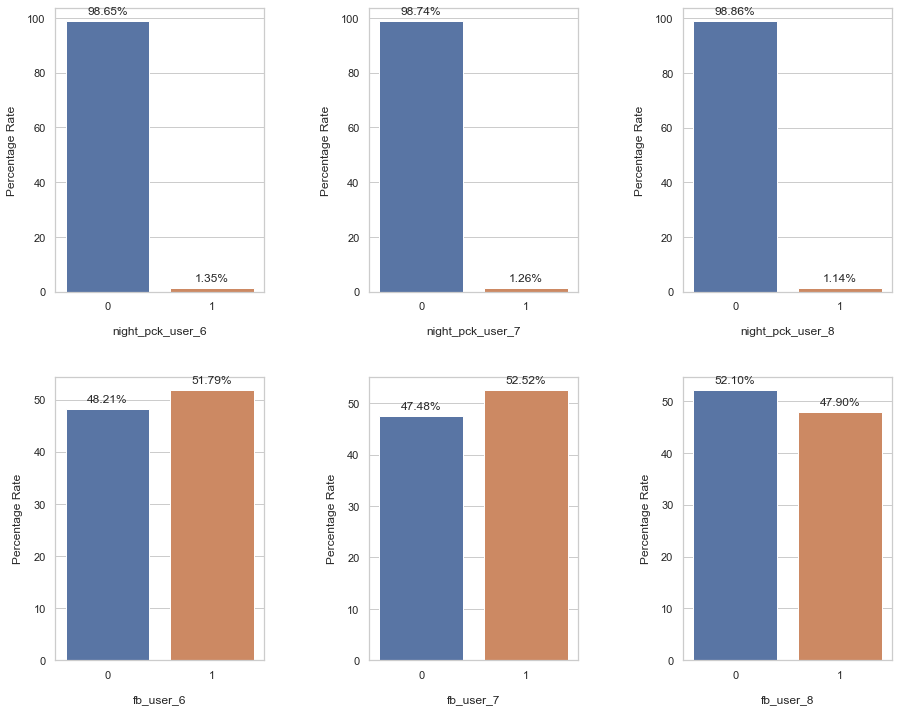

In [73]:
# Univariate Plot Analysis of Ordered categorical variables vs Percentage Rate
category_list = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']
counter = 1

plt.figure(figsize = (15, 12))

for col_list in category_list:
        
    series = round(((tel_churn[col_list].value_counts(dropna = False))/(len(tel_churn[col_list])) * 100), 2)

    plt.subplot(2, 3, counter)
    ax = sns.barplot(x = series.index, y = series.values, order = series.sort_index().index)
    plt.xlabel(col_list, labelpad = 15)
    plt.ylabel('Percentage Rate', labelpad = 10)

    # Call Custom Function
    add_data_labels(ax)

    counter += 1

del category_list, counter, ax

plt.subplots_adjust(hspace = 0.3)
plt.subplots_adjust(wspace = 0.5)
plt.show()

In [ ]:
# It is evident from this visualization that 99% of customers don't use night packs 

In [ ]:
# In fb_usage it is almost similar. But that metric decreases as month increases 

Positive examples = 2364
Negative examples = 27460
Proportion of positive to negative examples = 8.61%


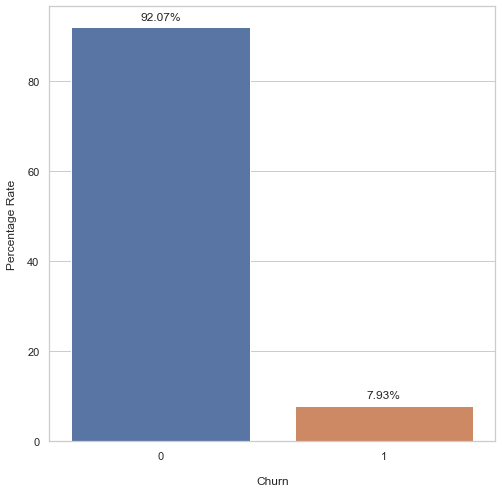

In [74]:
# Get number of positve and negative examples
pos = tel_churn[tel_churn["churn"] == 1].shape[0]
neg = tel_churn[tel_churn["churn"] == 0].shape[0]

print(f"Positive examples = {pos}")
print(f"Negative examples = {neg}")
print(f"Proportion of positive to negative examples = {(pos / neg) * 100:.2f}%")

plt.figure(figsize = (8, 8))

series = round(((tel_churn["churn"].value_counts(dropna = False))/(len(tel_churn["churn"])) * 100), 2)

ax = sns.barplot(x = series.index, y = series.values, order = series.sort_index().index)
plt.xlabel("Churn", labelpad = 15)
plt.ylabel('Percentage Rate', labelpad = 10)

# Call Custom Function
add_data_labels(ax)

plt.subplots_adjust(hspace = 0.3)
plt.subplots_adjust(wspace = 0.5)
plt.show()


## Insight 5

It is evident from the above dataset that churn dataset is highly imbalanced. The proportion for churn to non-churn is 8%.

For correcting this, we need to deal with class imbalance problem and we can do it after data preparation


## Univariate Analysis - Quantitative variables 

In [75]:
# Custom Function for Default Plotting variables

# Function Parameters  - 

# figure_title         -    The title to use for the plot.
# xlabel               -    The x-axis label for the plot.
# ylabel               -    The y-axis label for the plot.

def set_plotting_variable(figure_title, xlabel, ylabel):
    
    plt.title(figure_title)
    plt.xlabel(xlabel, labelpad = 15)
    plt.ylabel(ylabel, labelpad = 10)

In [76]:
# Custom Function for Univariate Analysis

# Function Parameters   -

# figsize_x             -      The width of the plot figure in inches.
# figsize_y             -      The height of the plot figure in inches.
# subplot_x             -      The rows for the subplot.
# subplot_y             -      The columns for the subplot.
# xlabel                -      The x-axis label for the plot.
# ylabel                -      The y-axis label for the plot.
# x_axis                -      The series/variable to be plotted along the x-axis.
# data                  -      The data frame.

# wspace                -      The amount of width reserved for space between subplots,
#                              expressed as a fraction of the average axis width

# xlabel_rotation       -      The degree of rotation for the x-axis ticks (values).

def plot_univariate(figsize_x, figsize_y, subplot_x, subplot_y, xlabel, ylabel, x_axis, data, wspace):
    
    plt.figure(figsize = (figsize_x, figsize_y))
    
    title_1 = "Distribution Plot of " + xlabel
    title_2 = "Box Plot of " + xlabel

    # Subplot - 1
    plt.subplot(subplot_x, subplot_y, 1)

    sns.distplot(data[x_axis], hist = True, kde = True, color = 'g')
    # Call Custom Function
    set_plotting_variable(title_1, xlabel, ylabel)

    # Subplot - 2
    plt.subplot(subplot_x, subplot_y, 2)

    sns.boxplot(x = x_axis, data = data, color = 'm')
    # Call Custom Function
    set_plotting_variable(title_2, xlabel, ylabel)
    
    plt.subplots_adjust(wspace = wspace)
    plt.show()


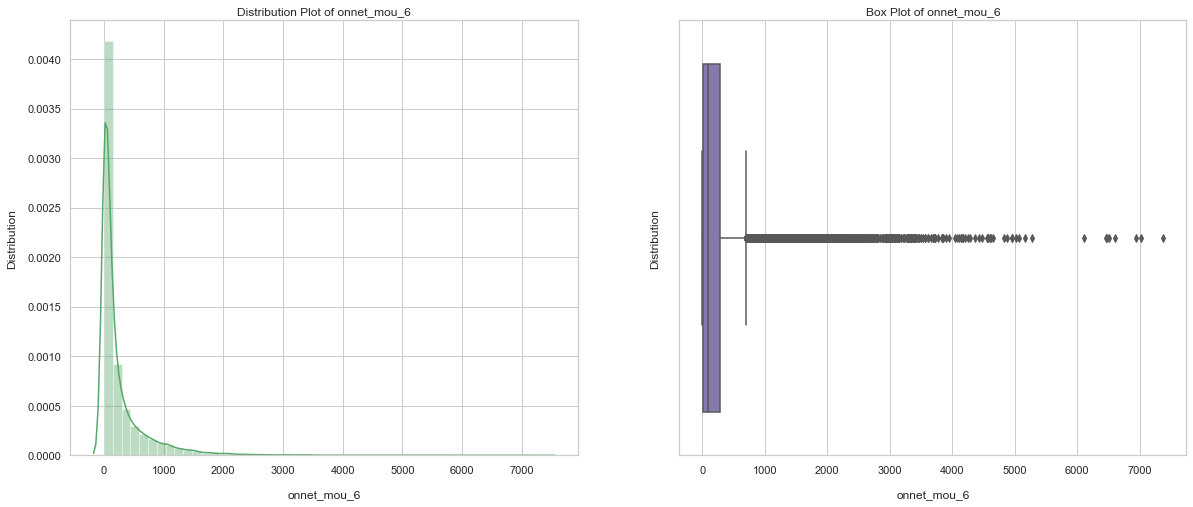

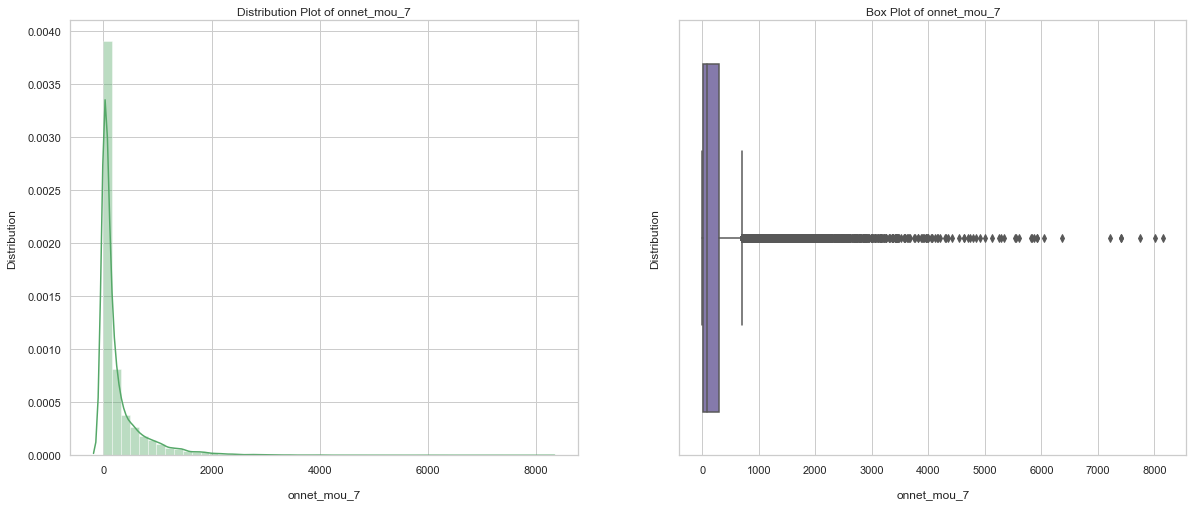

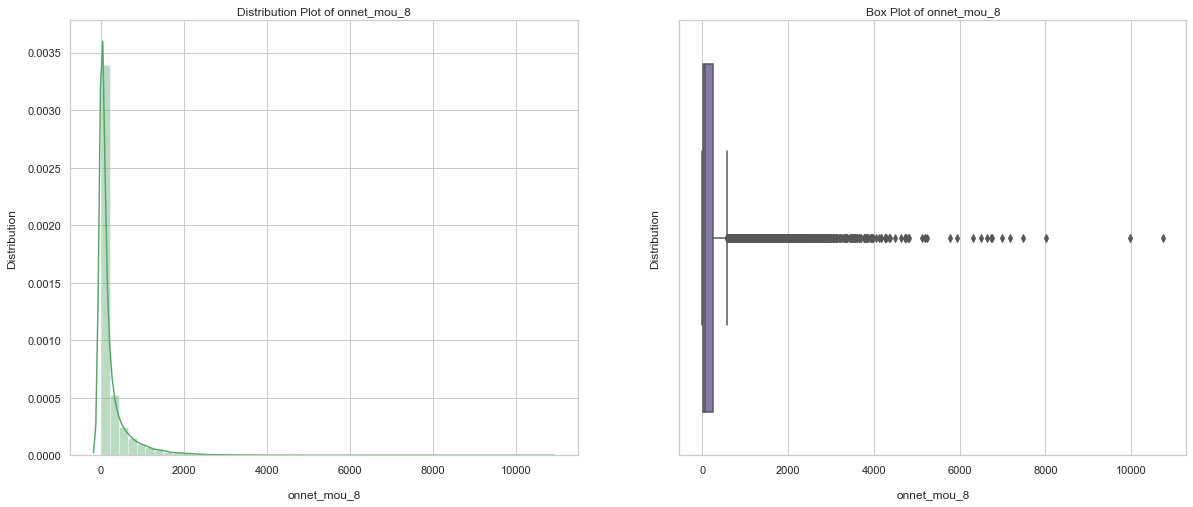

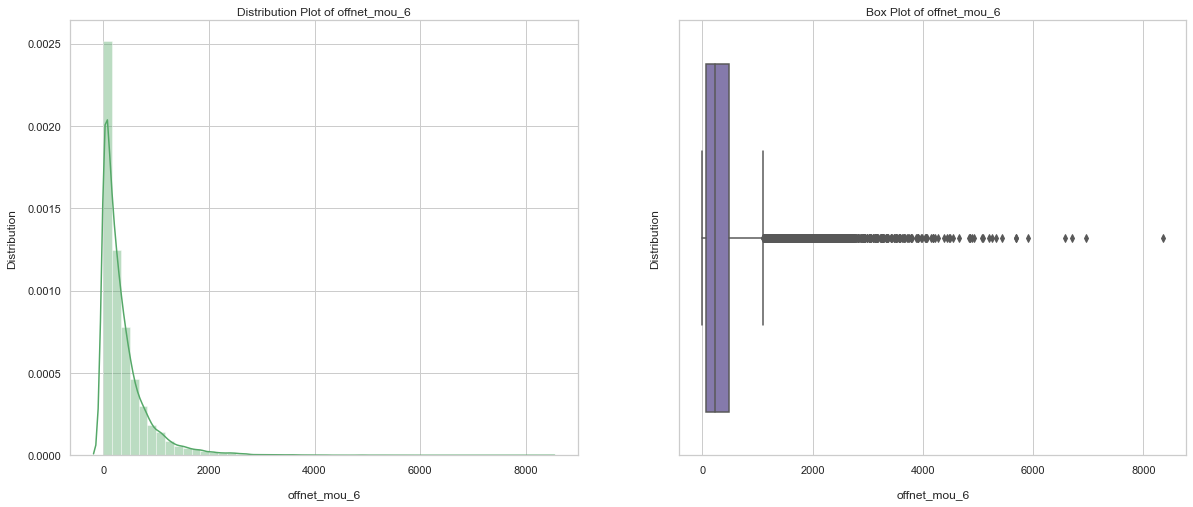

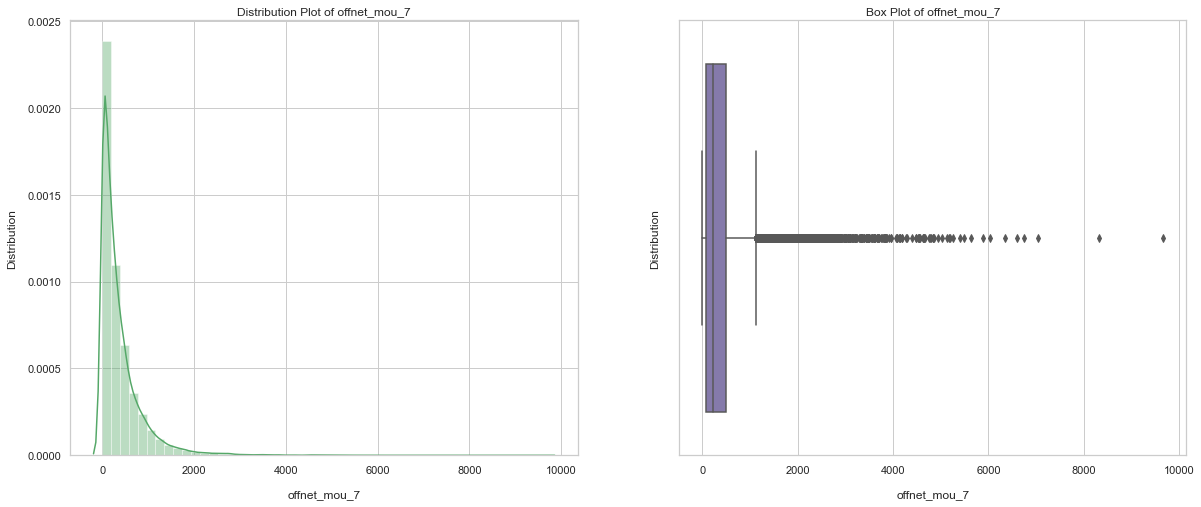

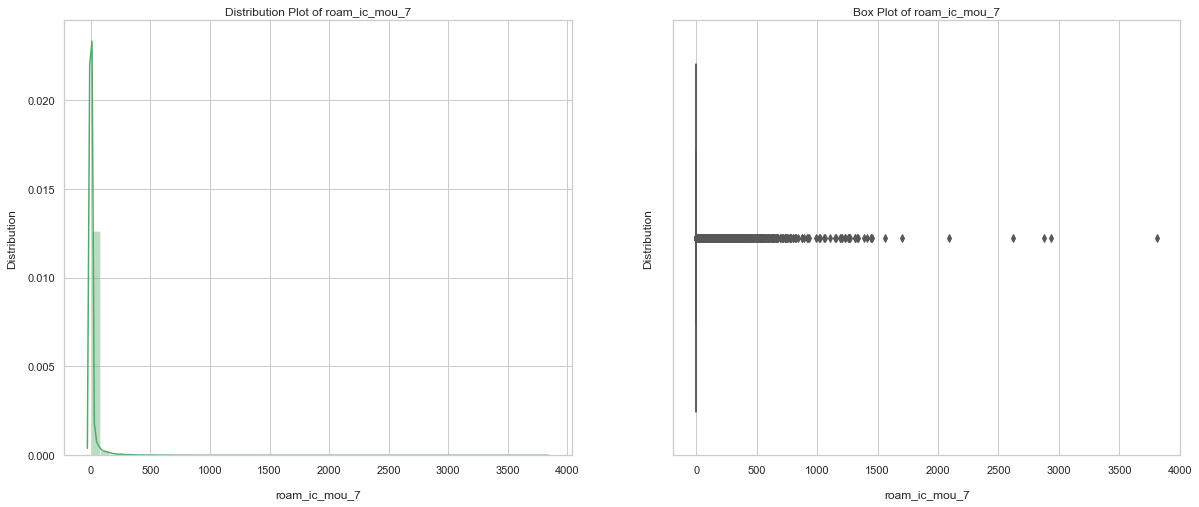

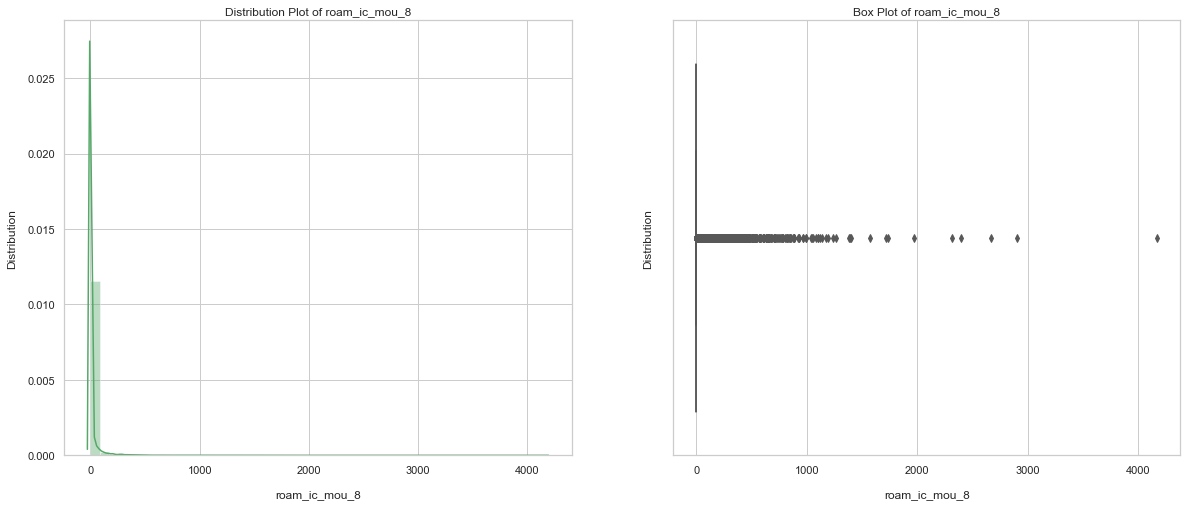

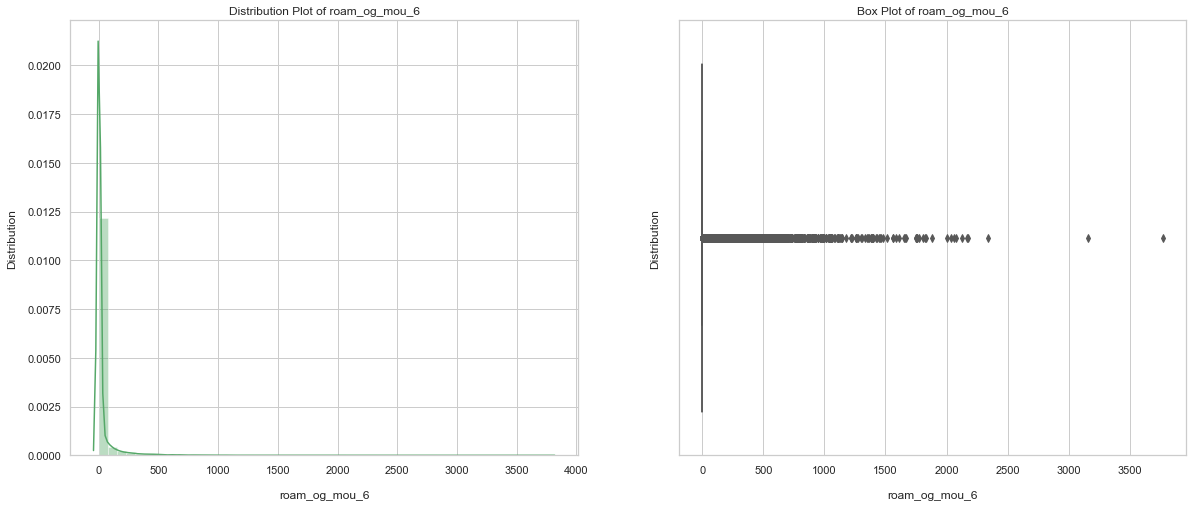

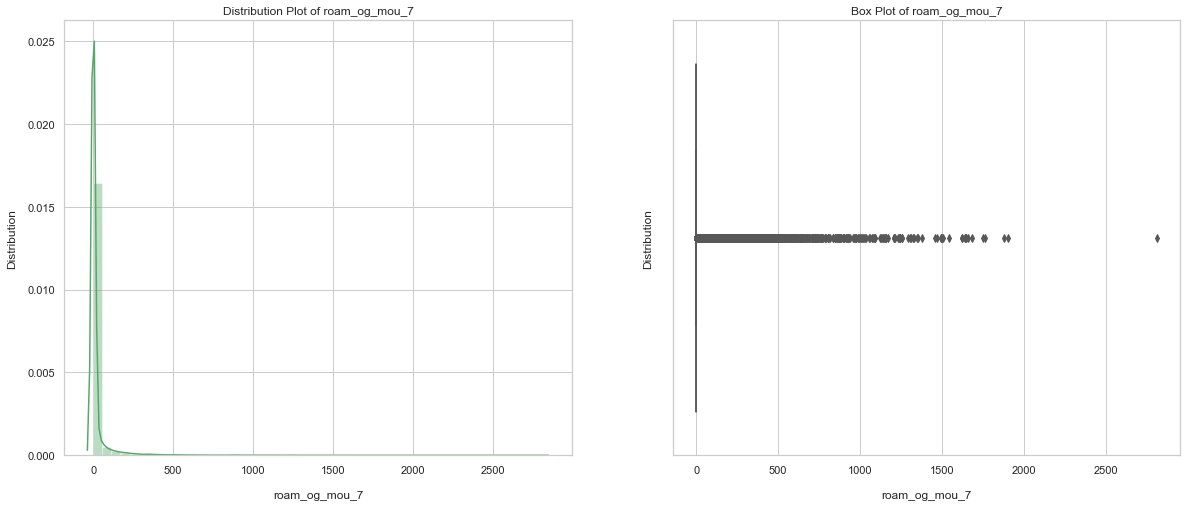

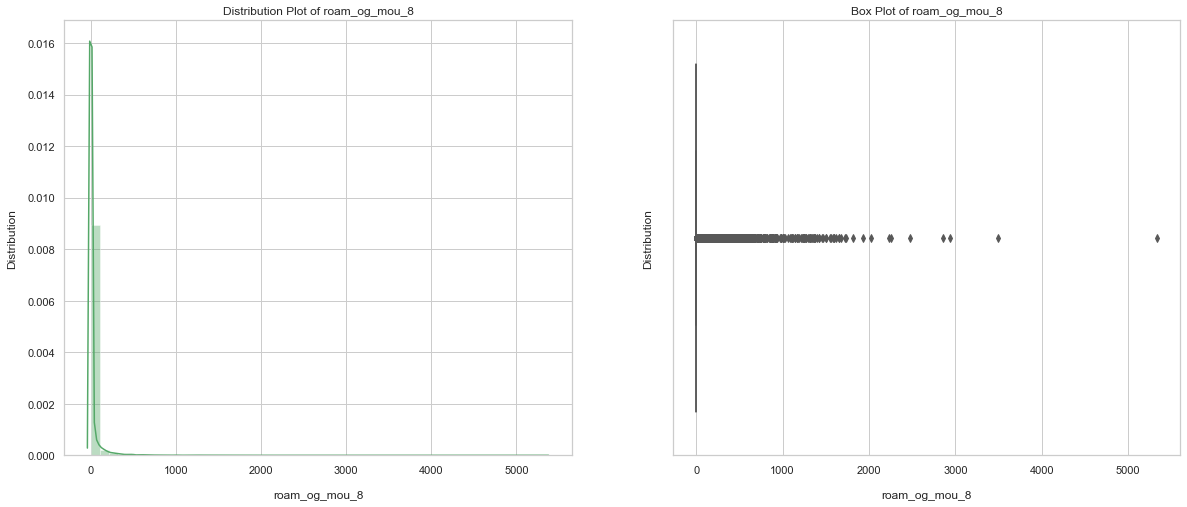

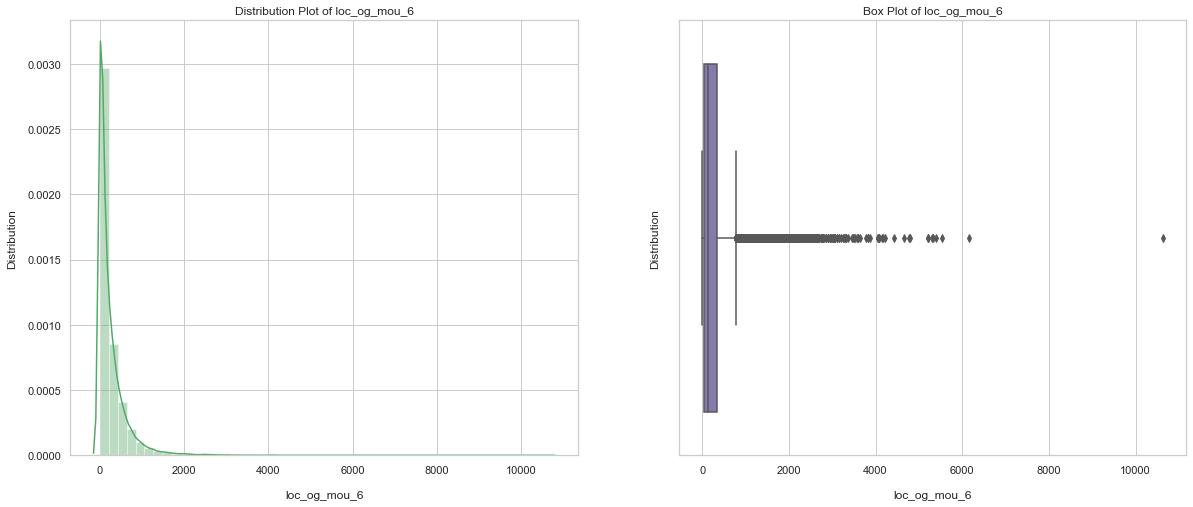

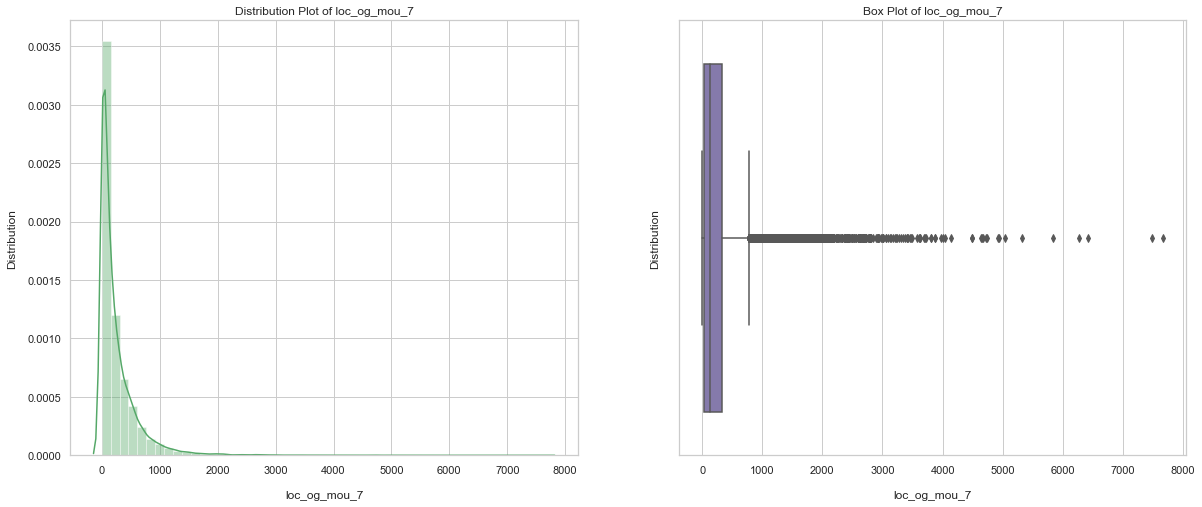

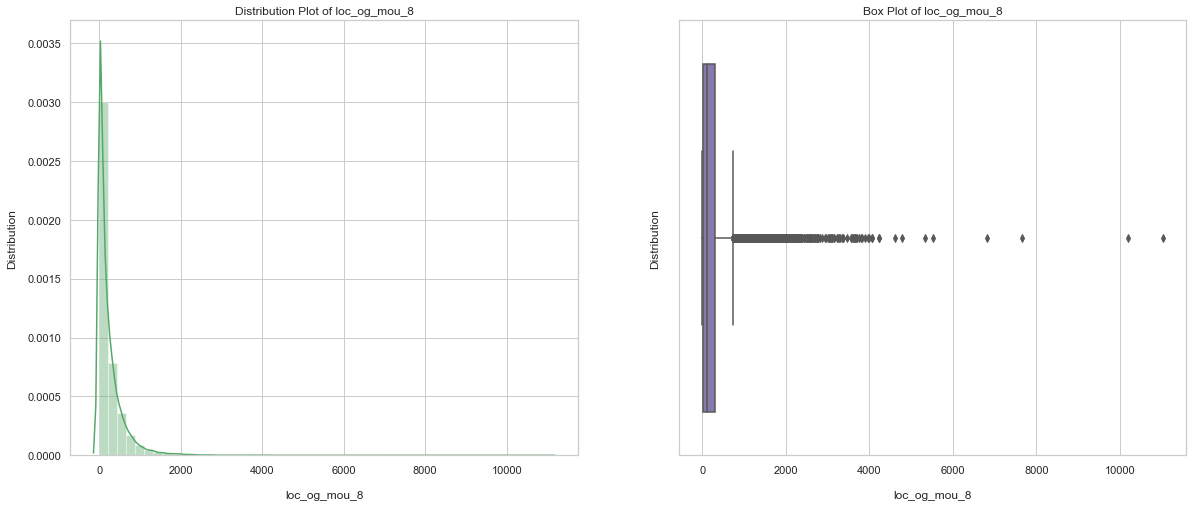

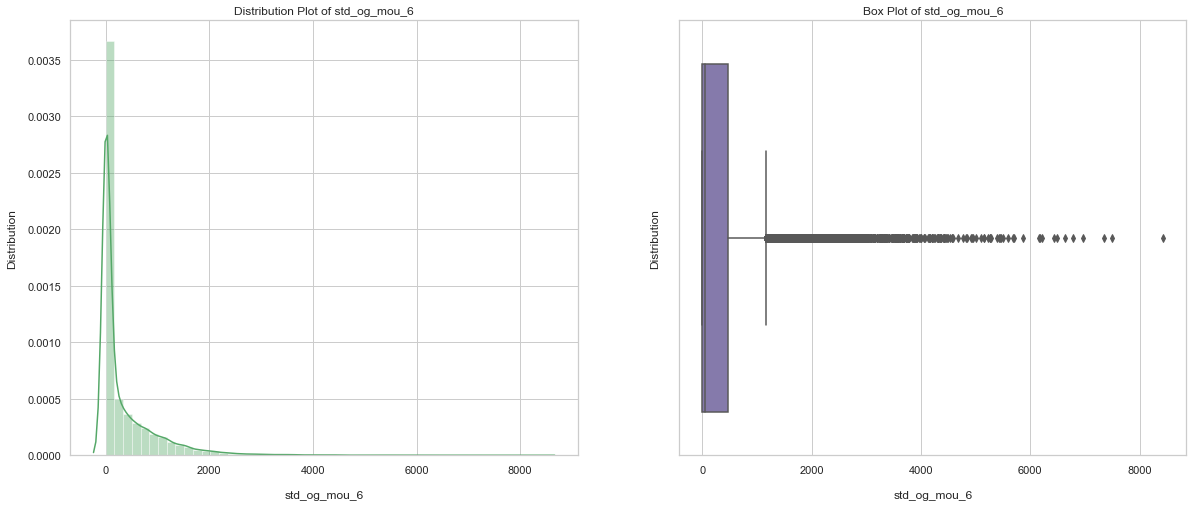

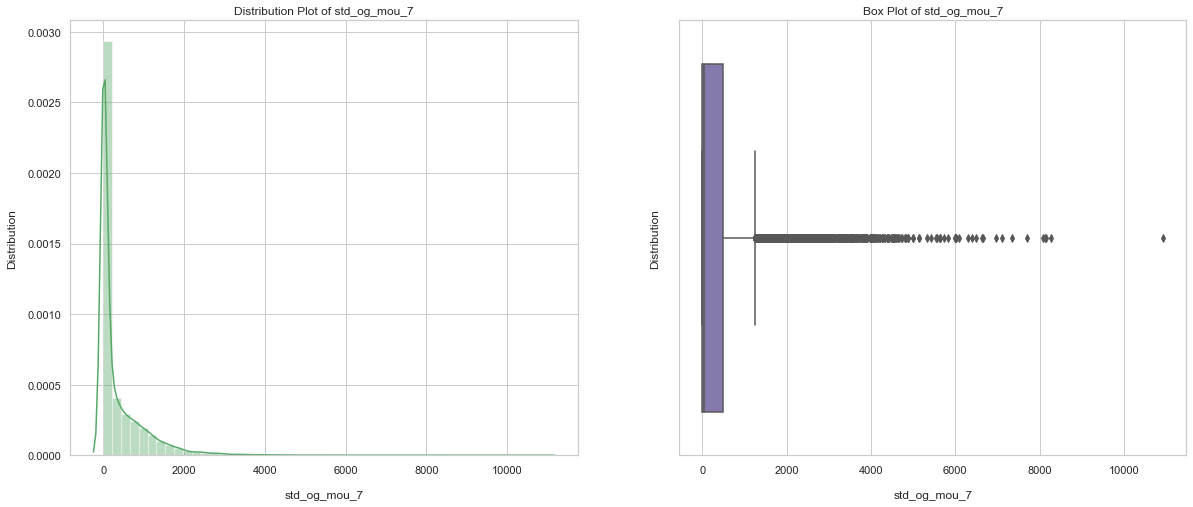

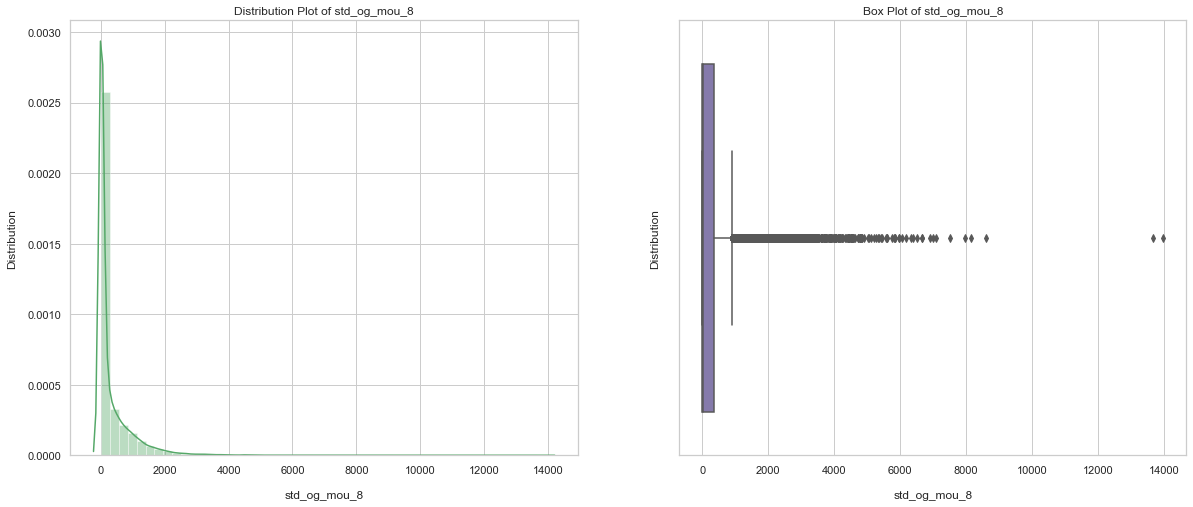

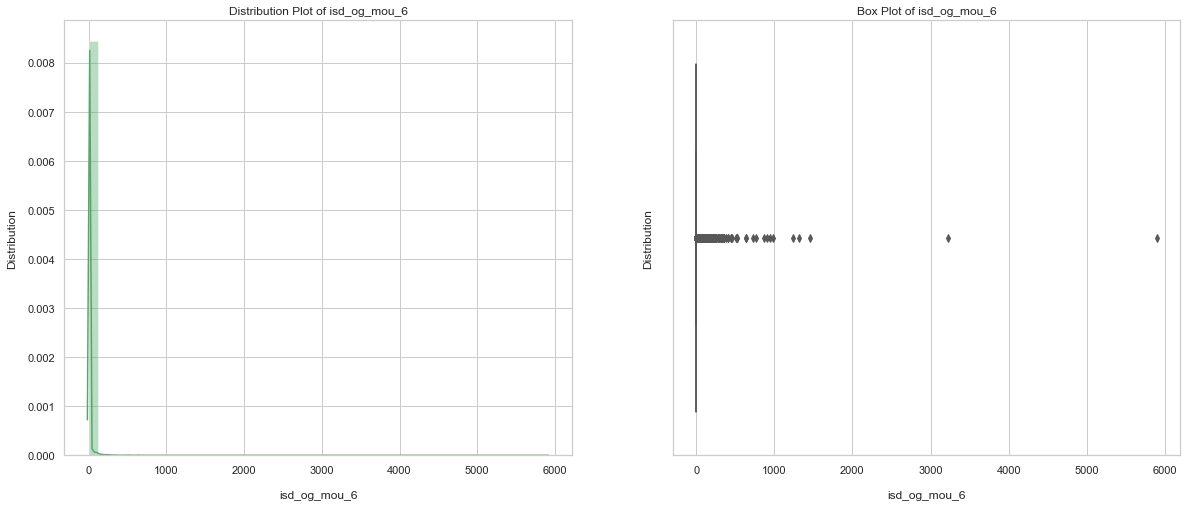

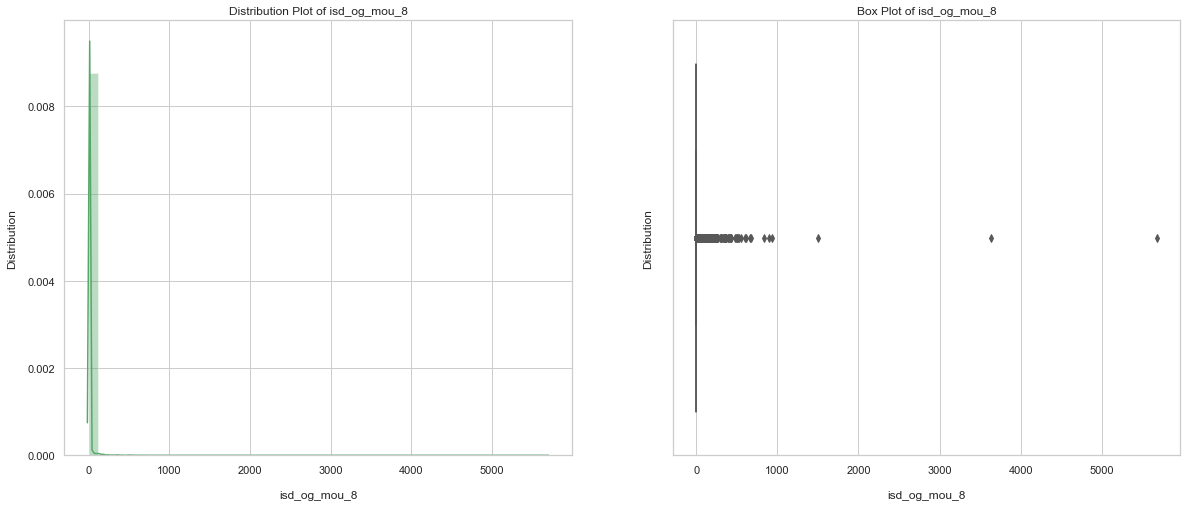

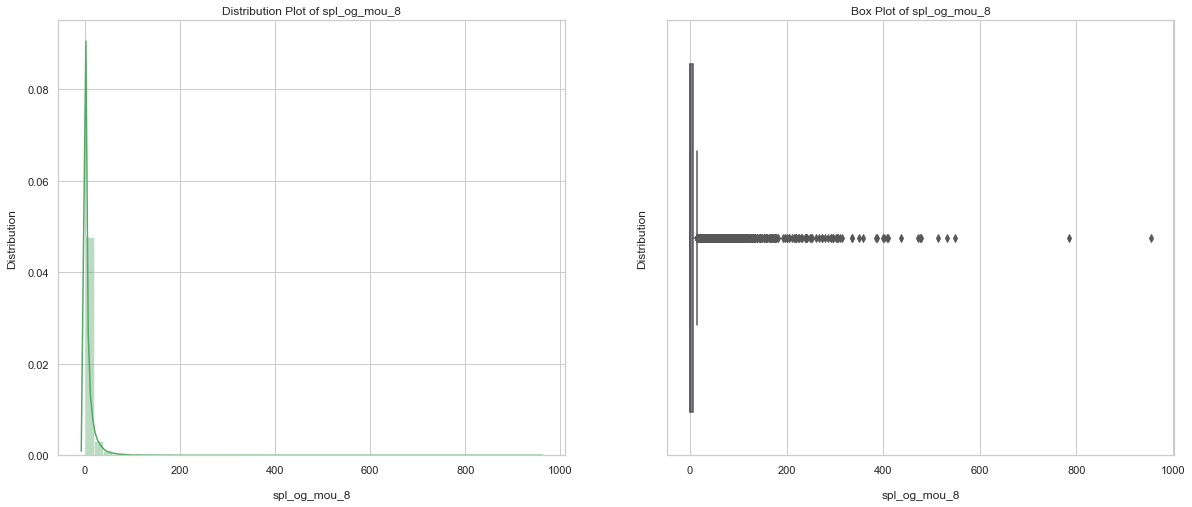

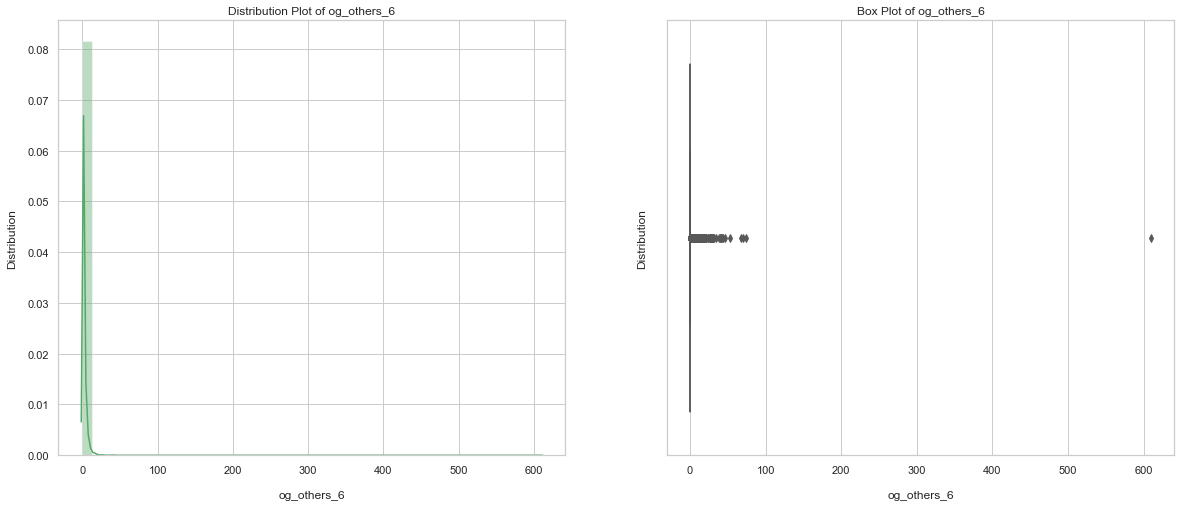

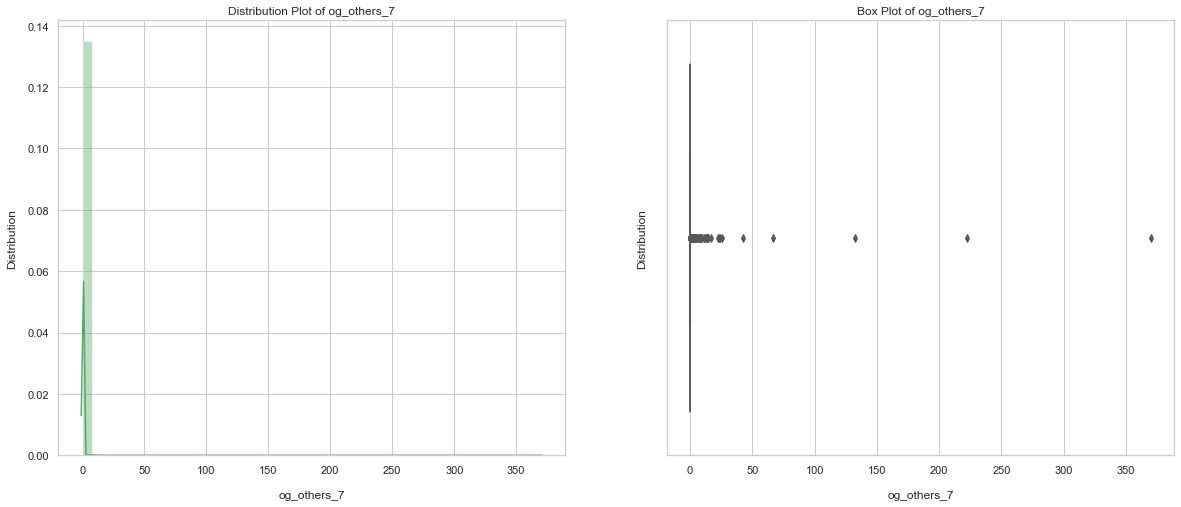

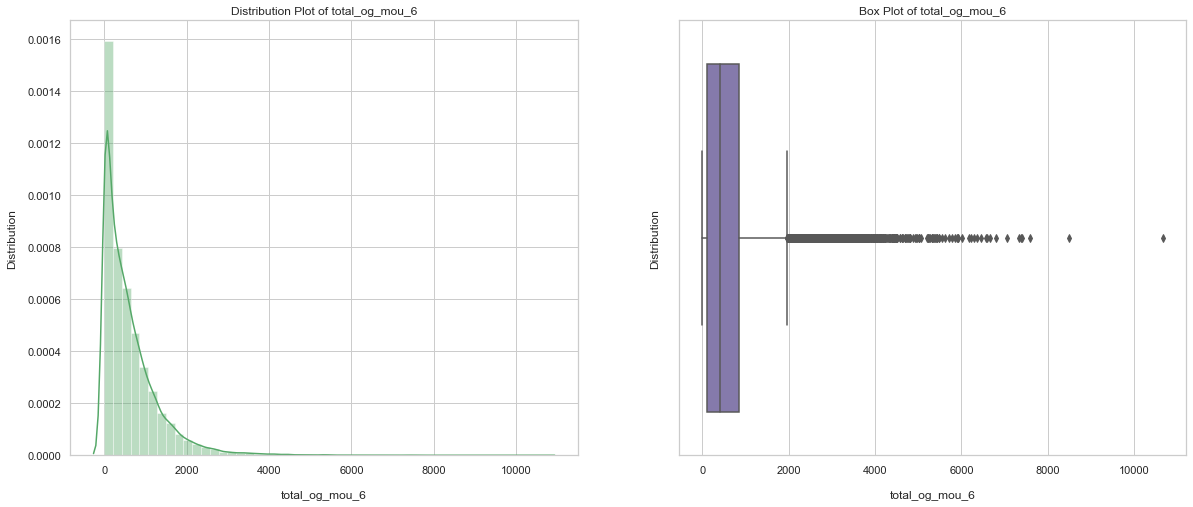

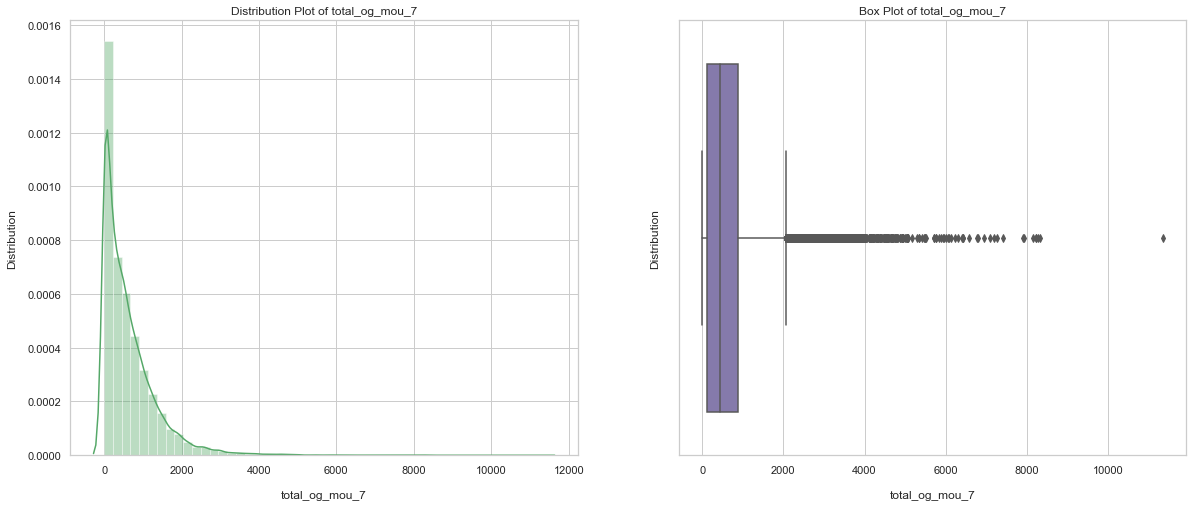

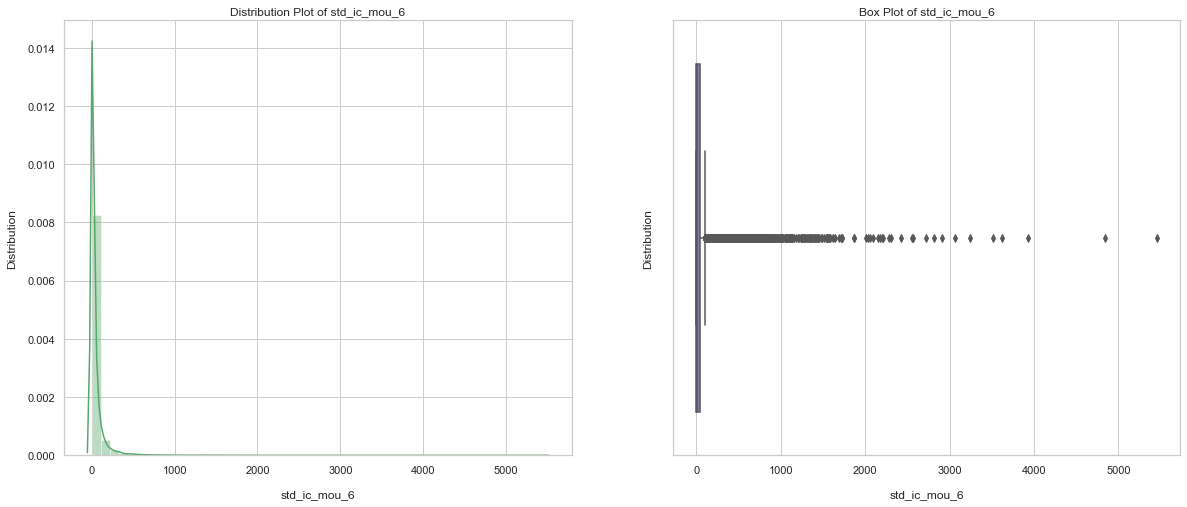

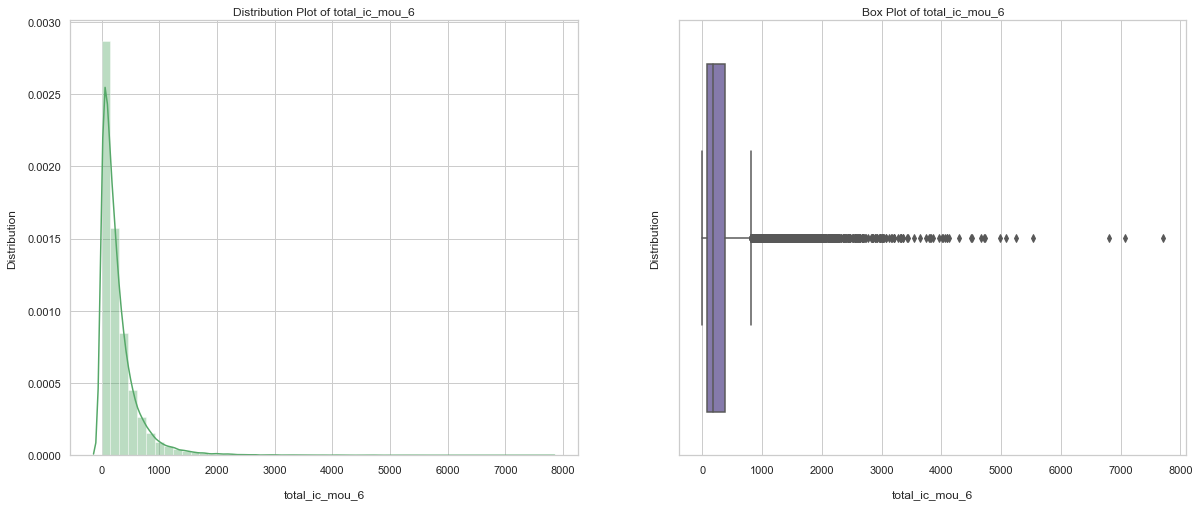

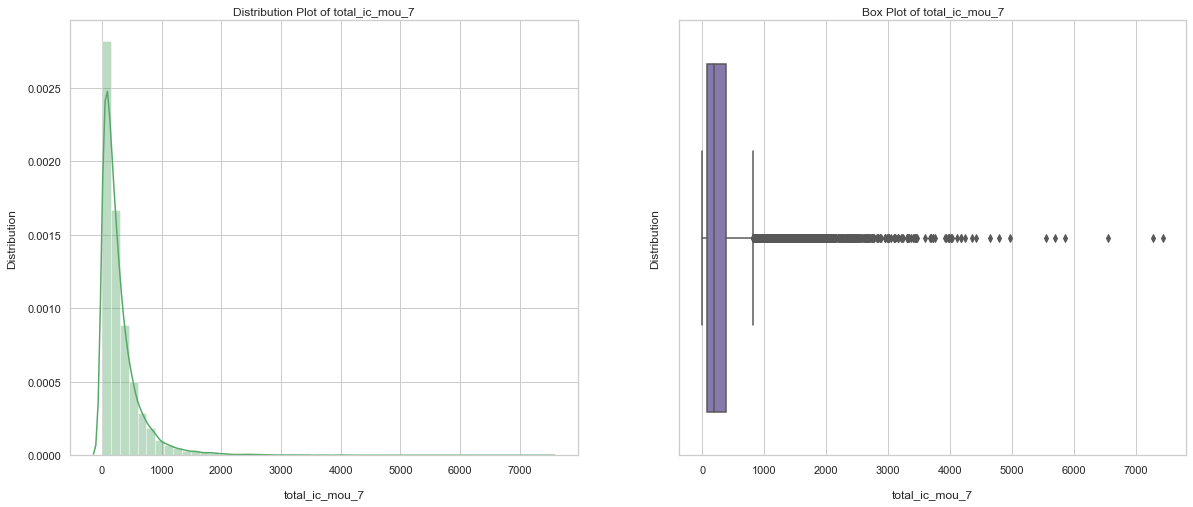

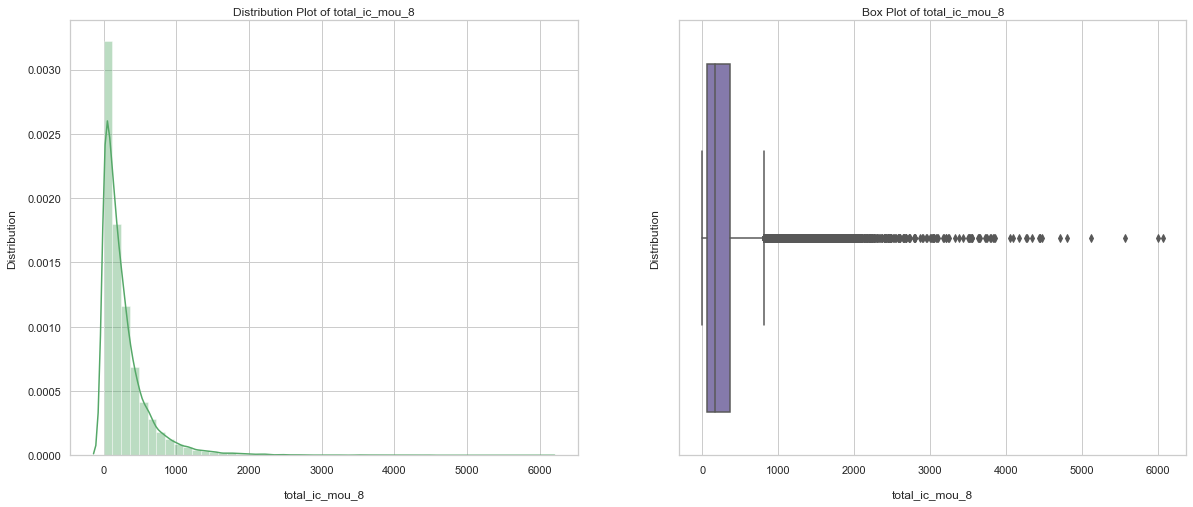

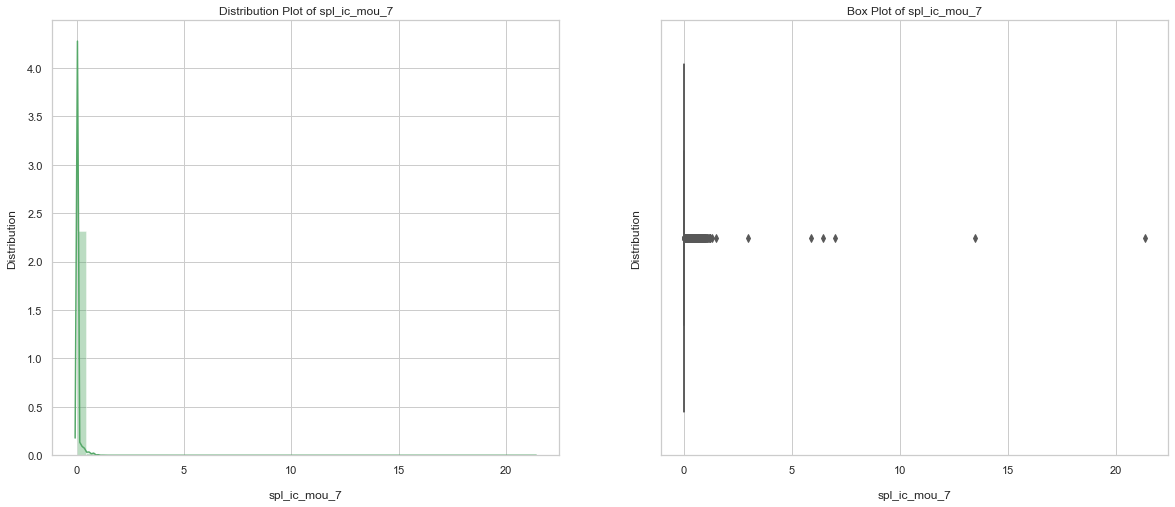

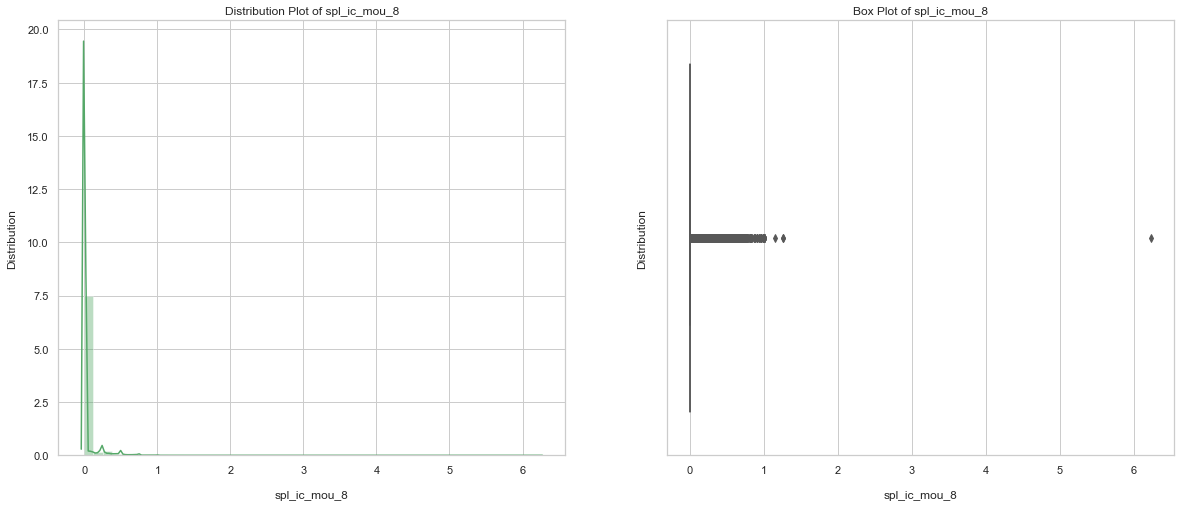

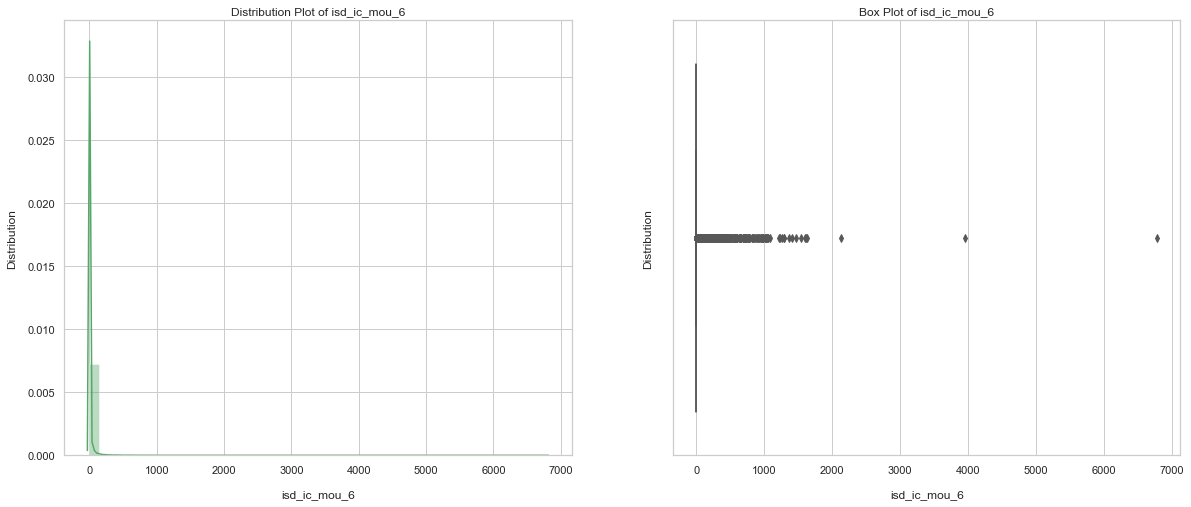

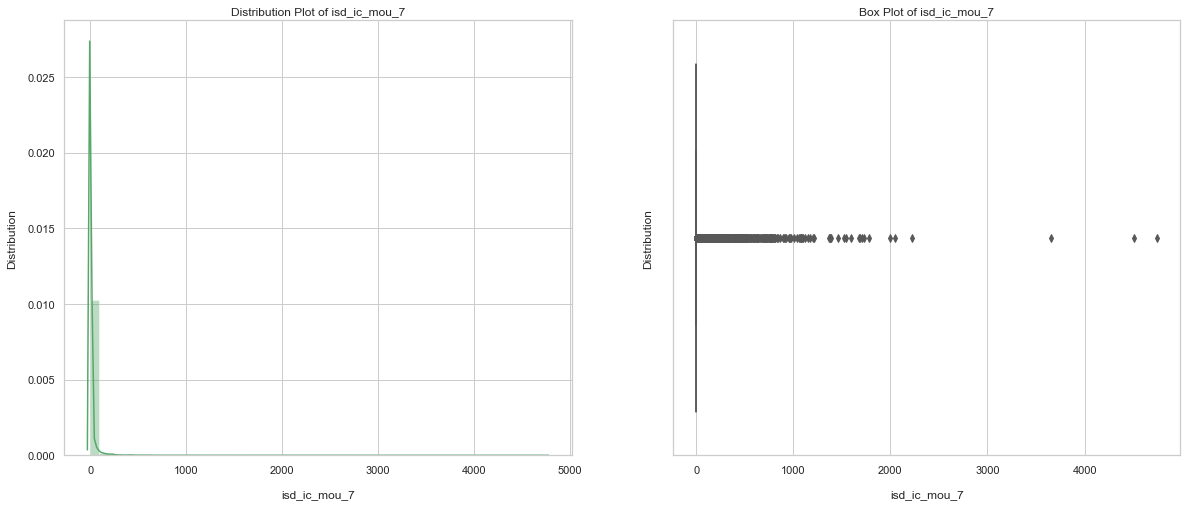

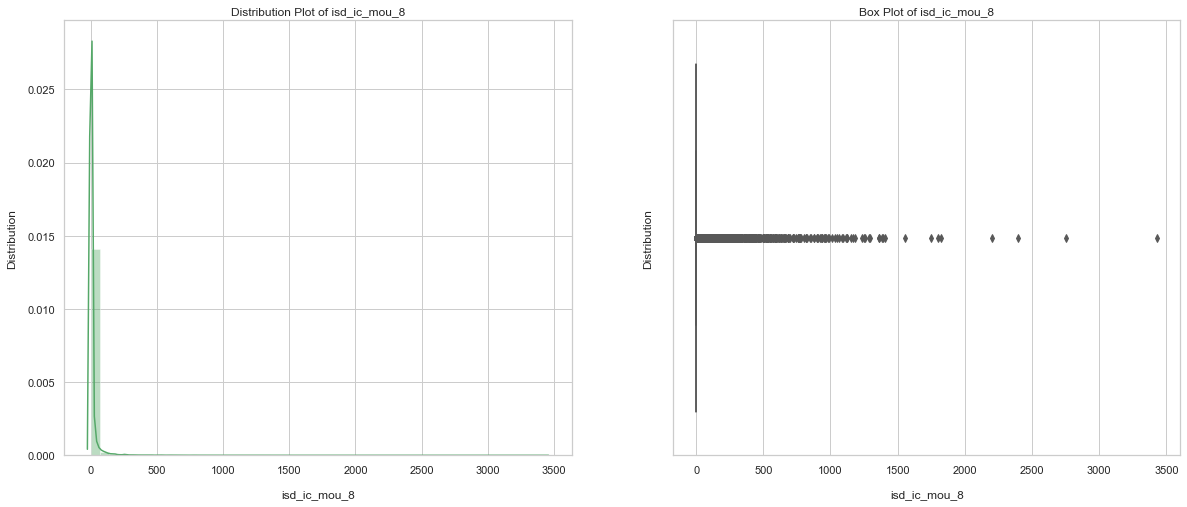

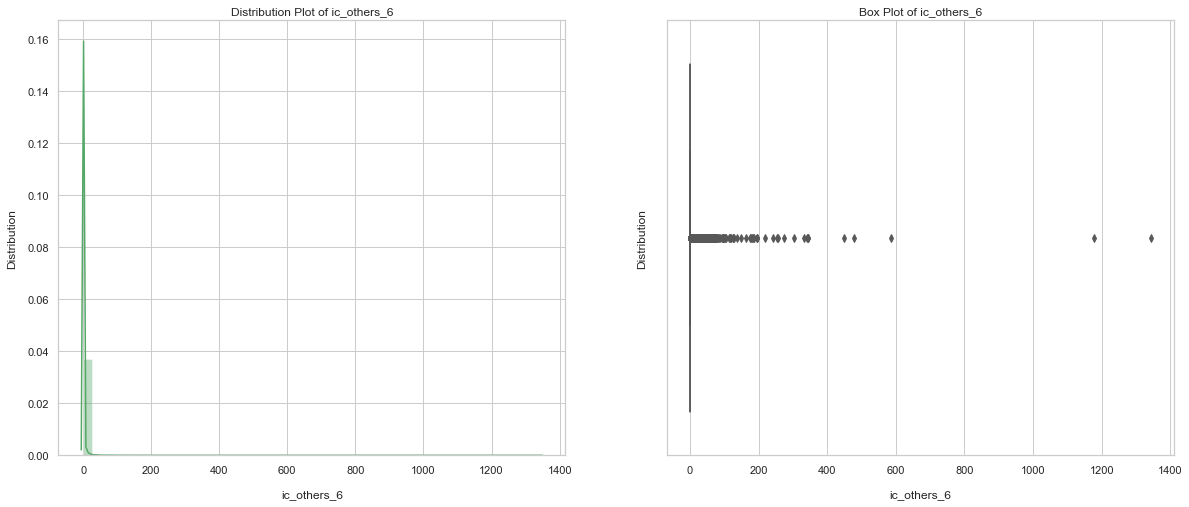

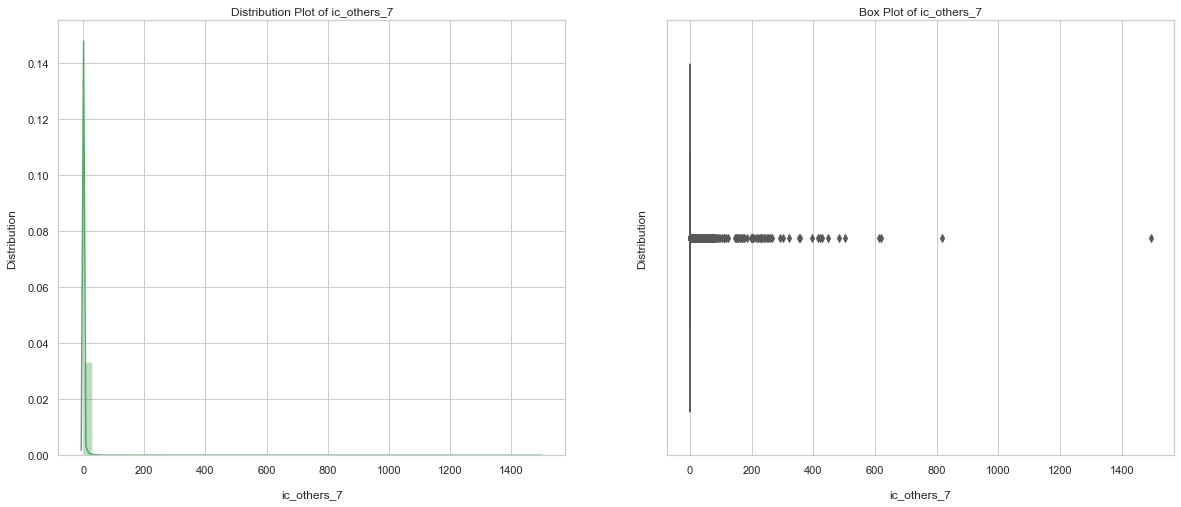

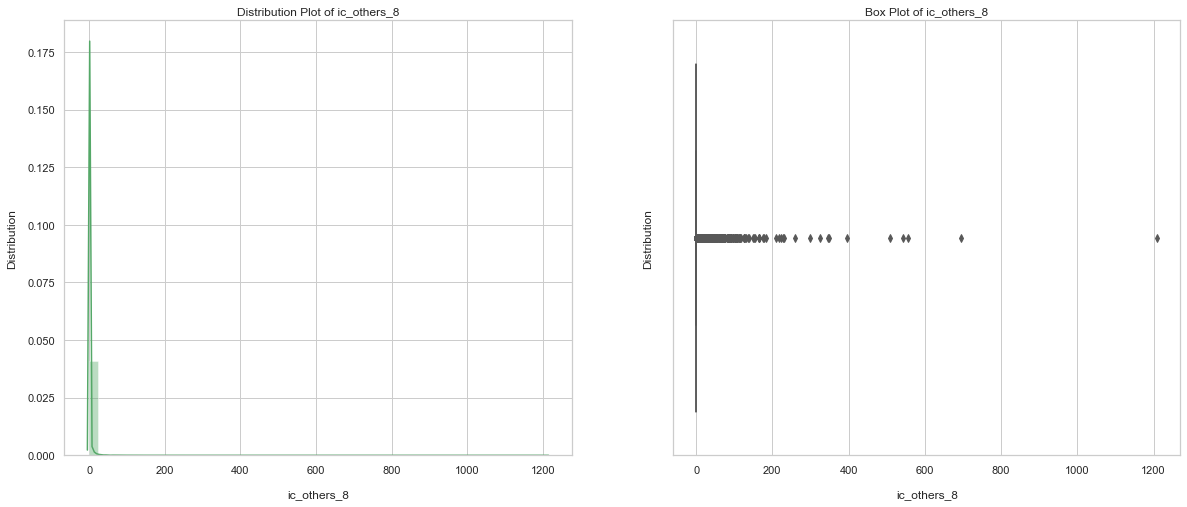

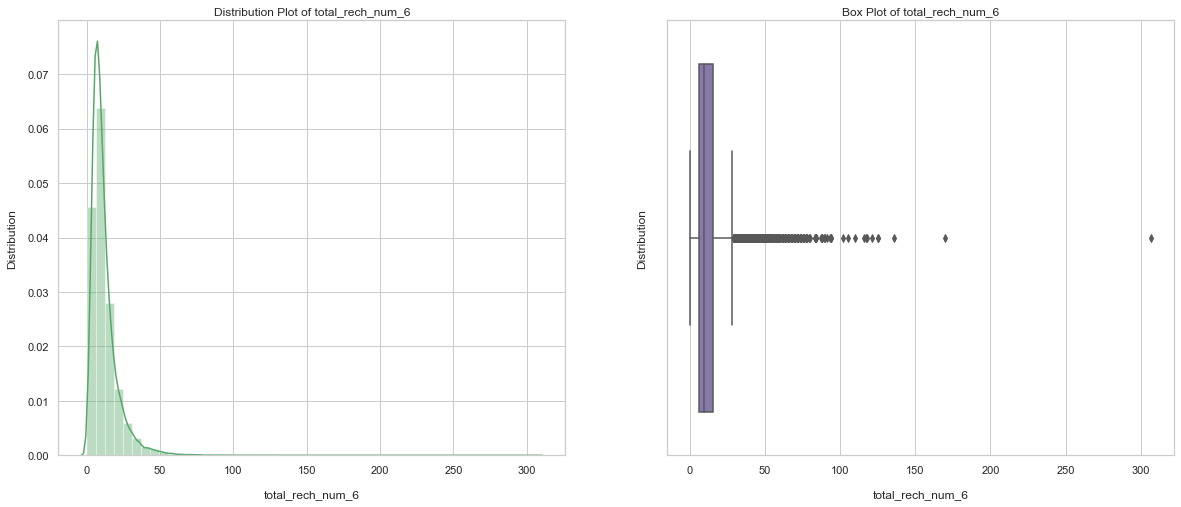

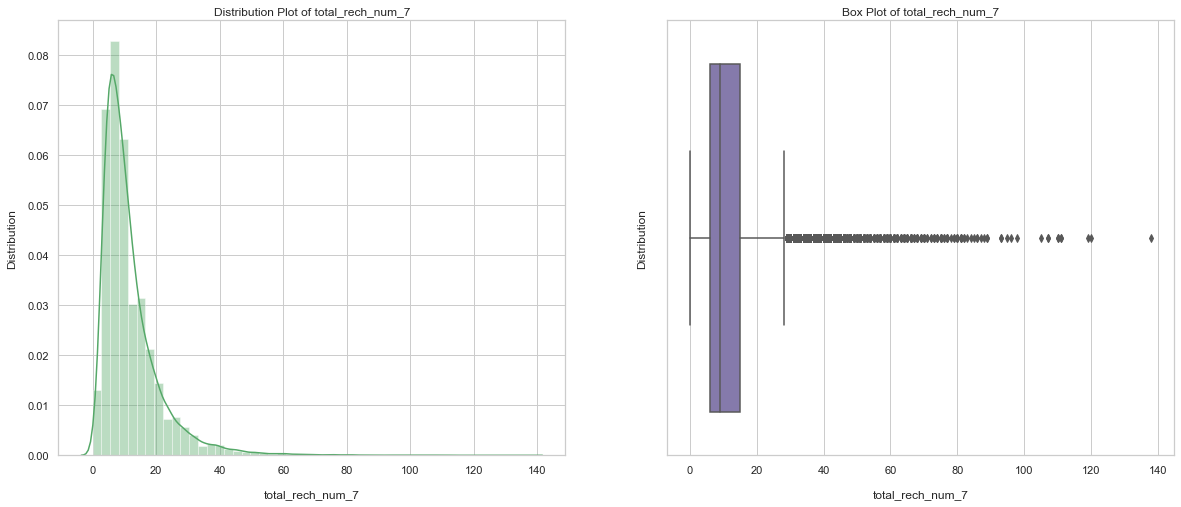

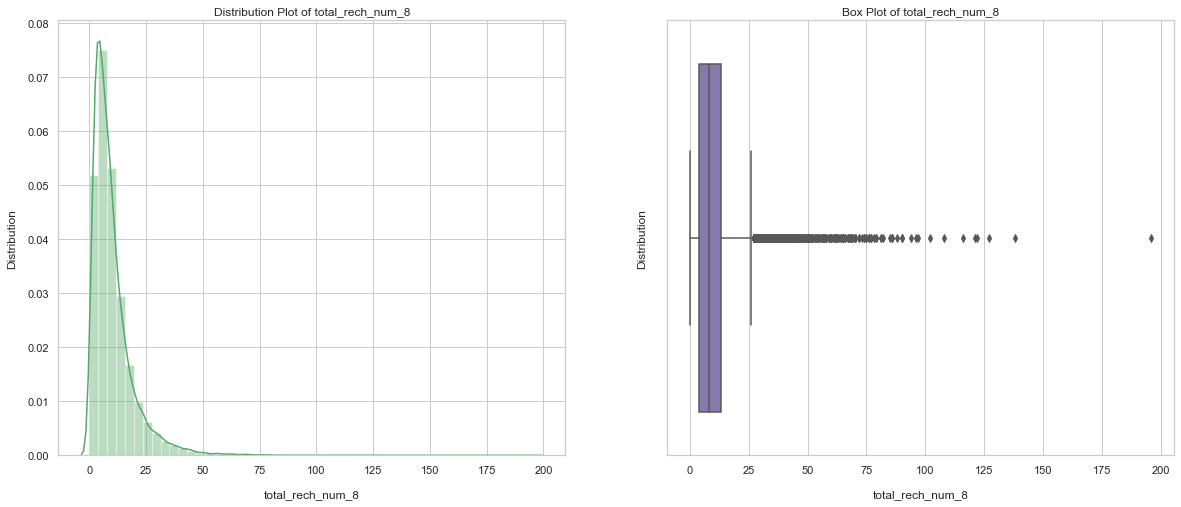

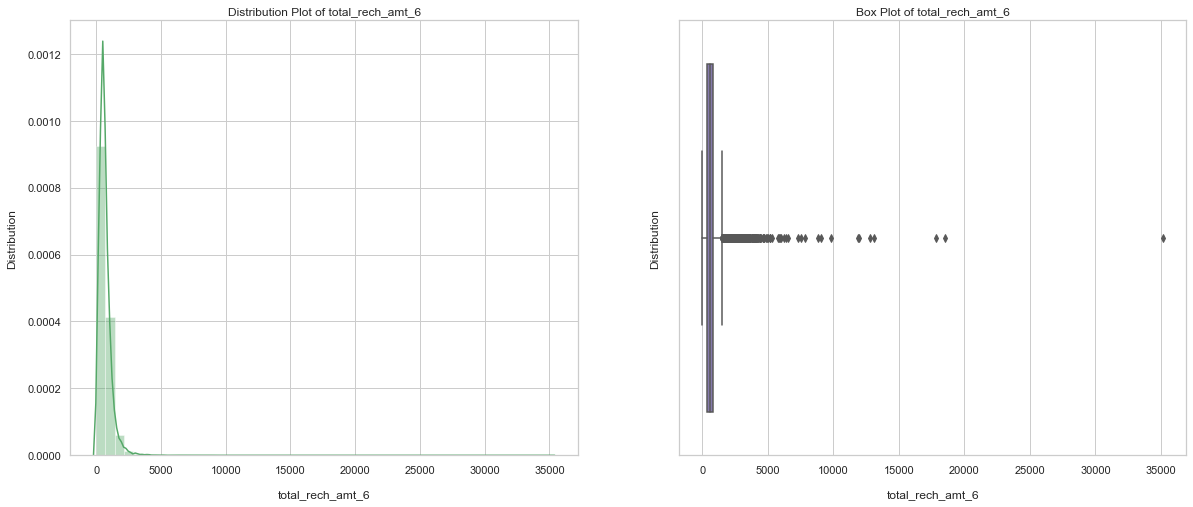

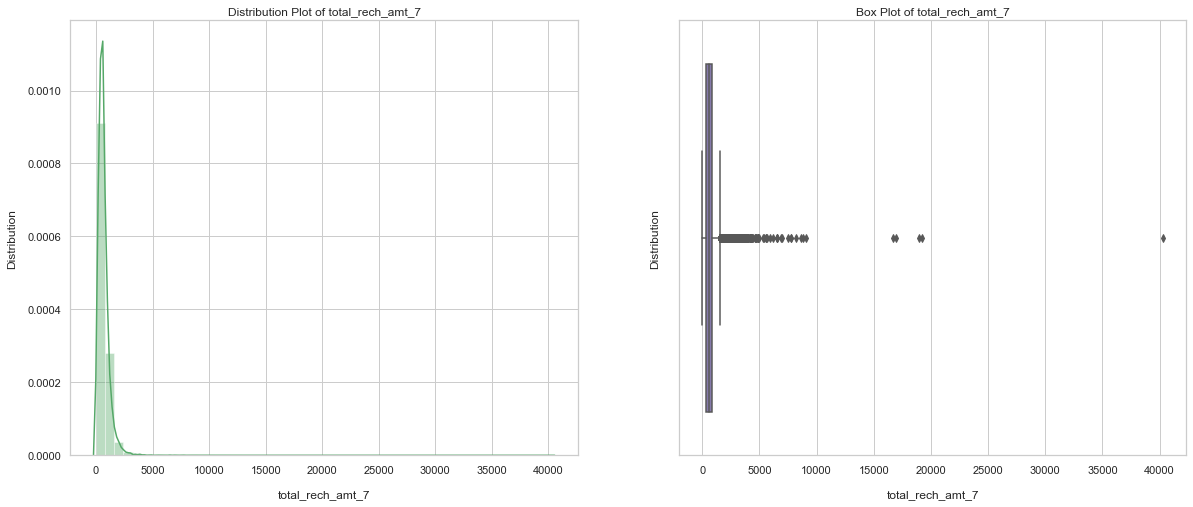

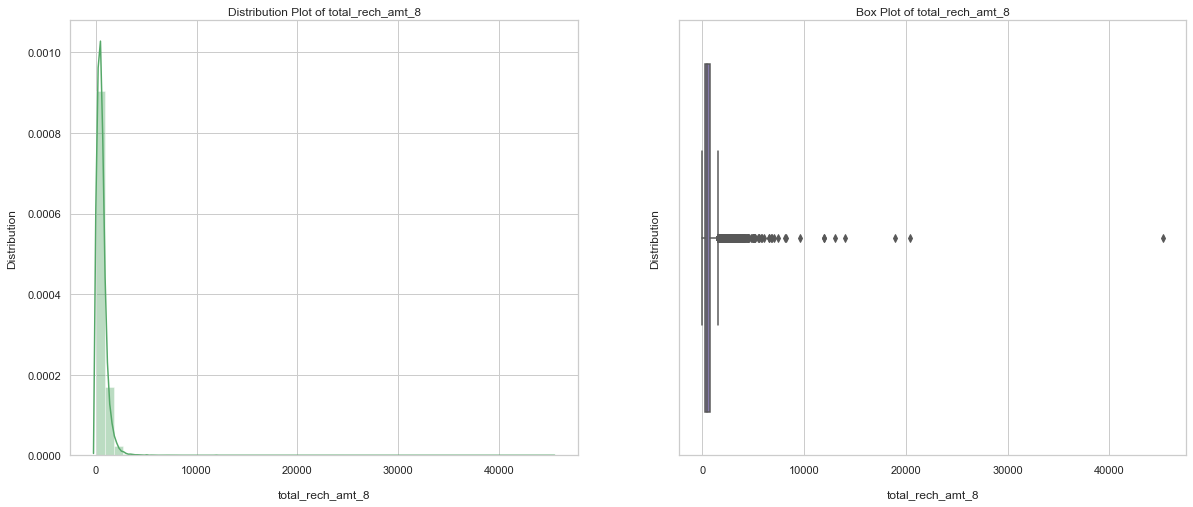

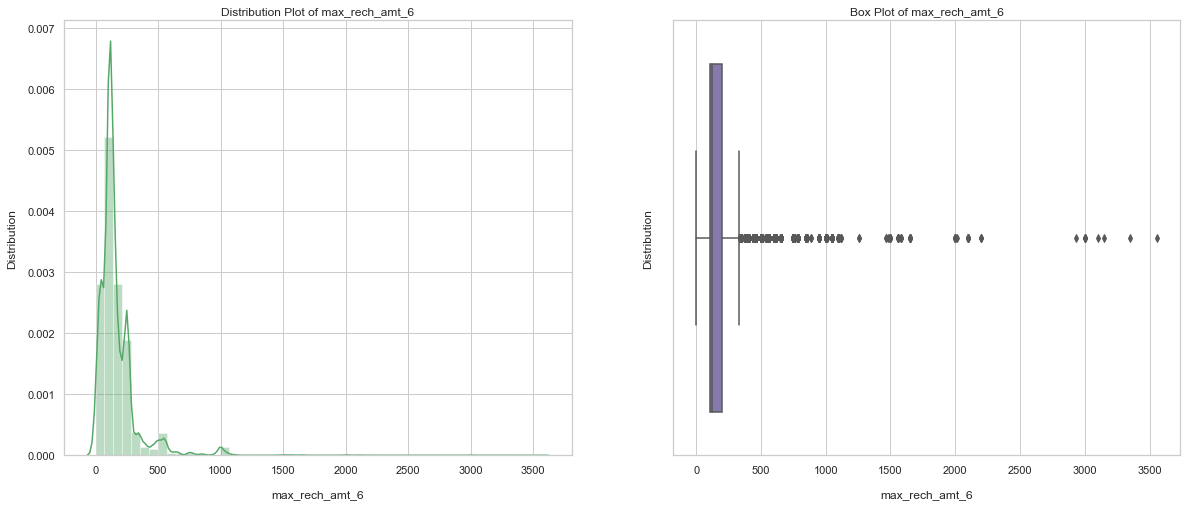

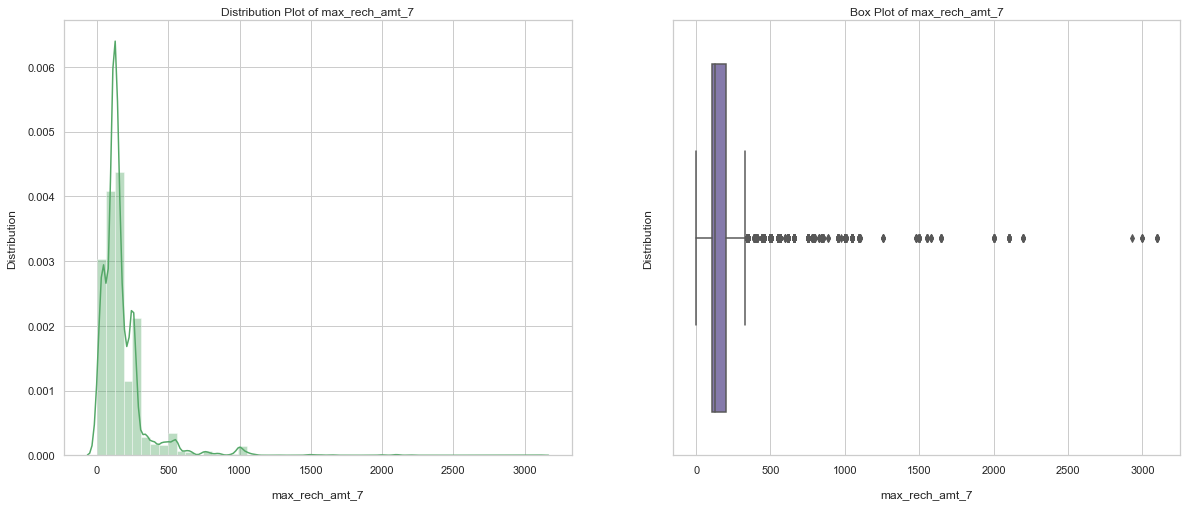

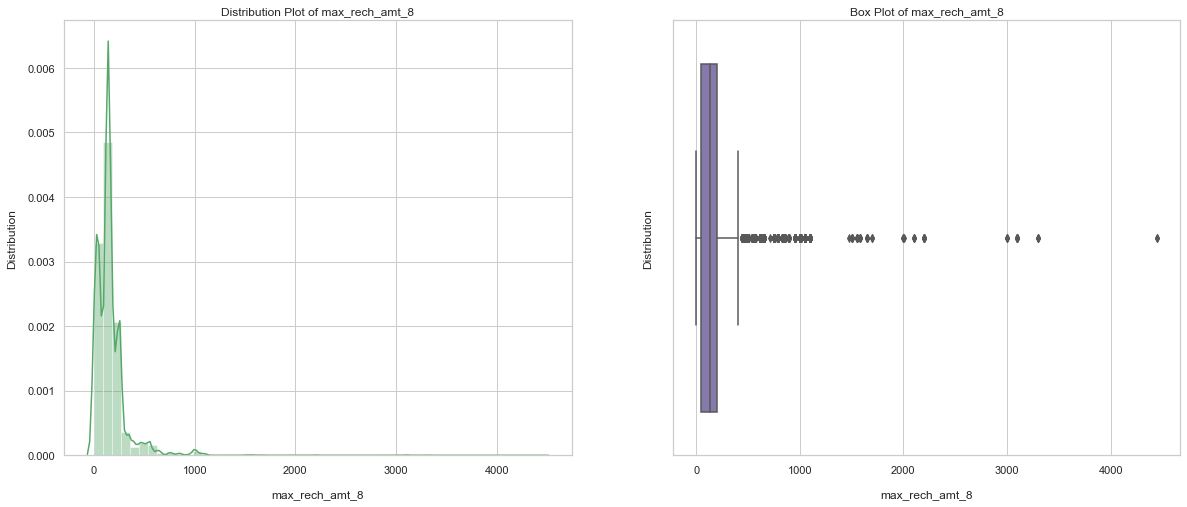

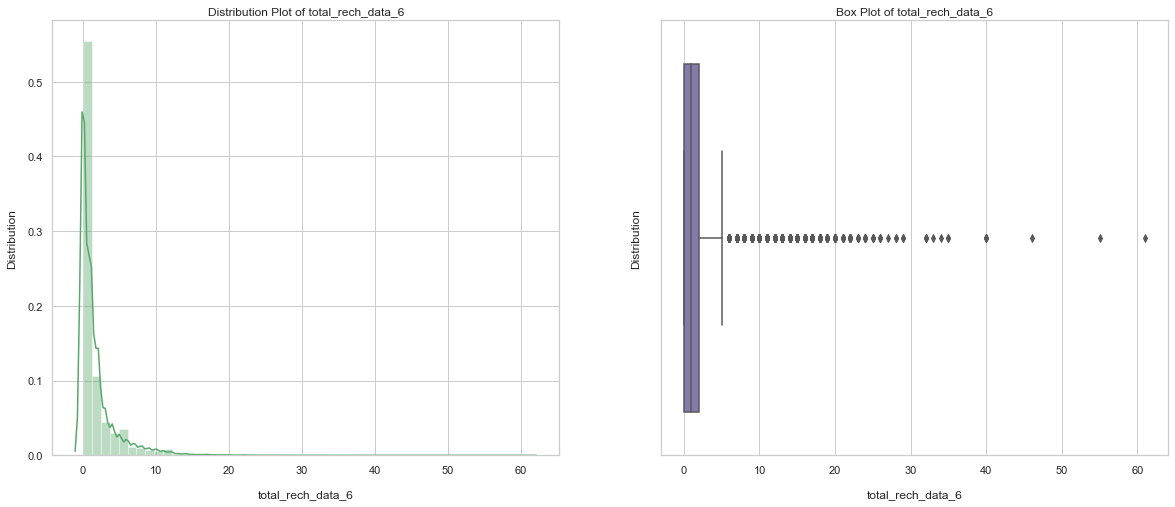

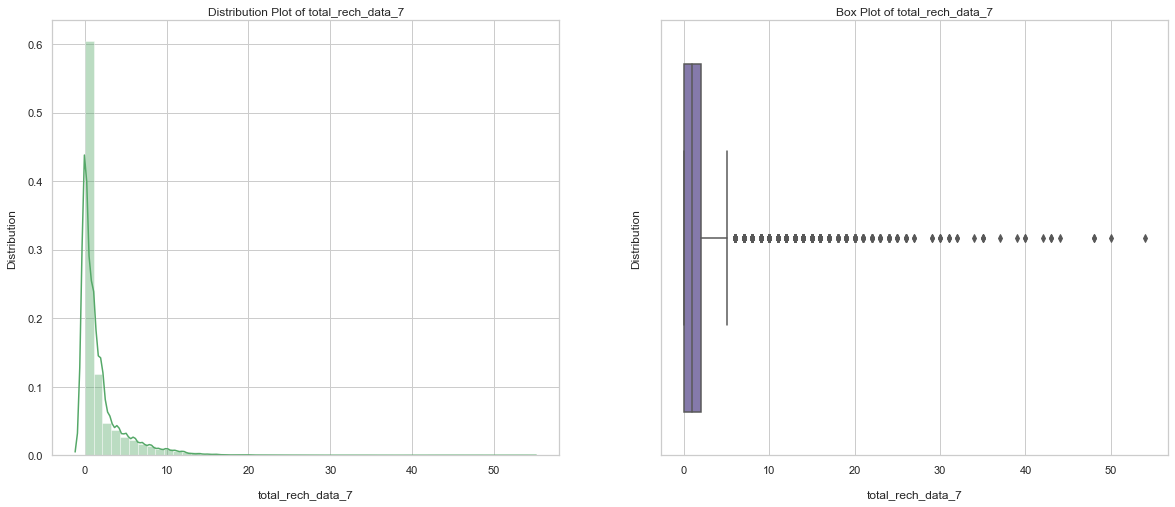

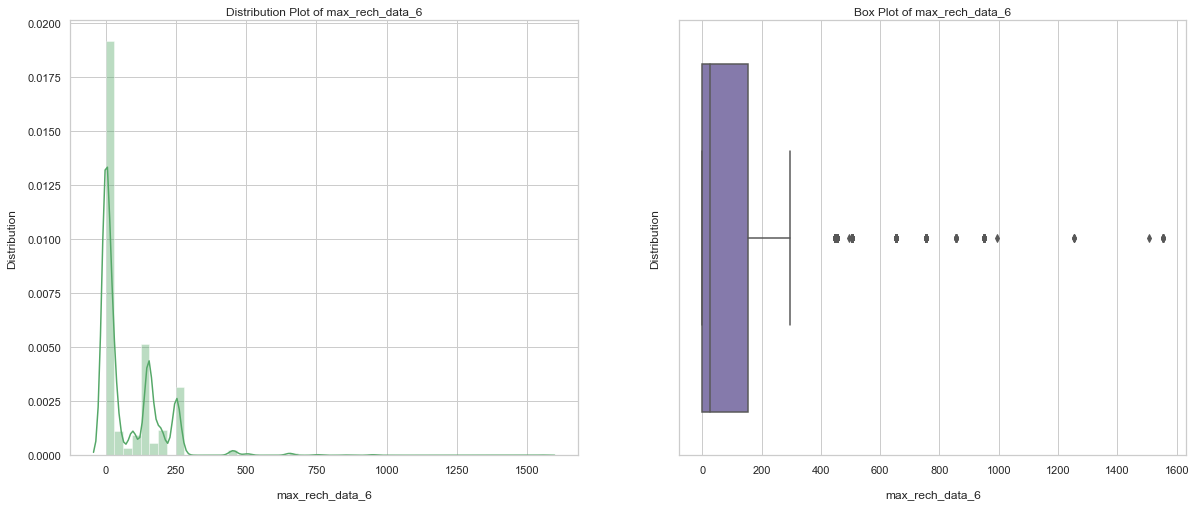

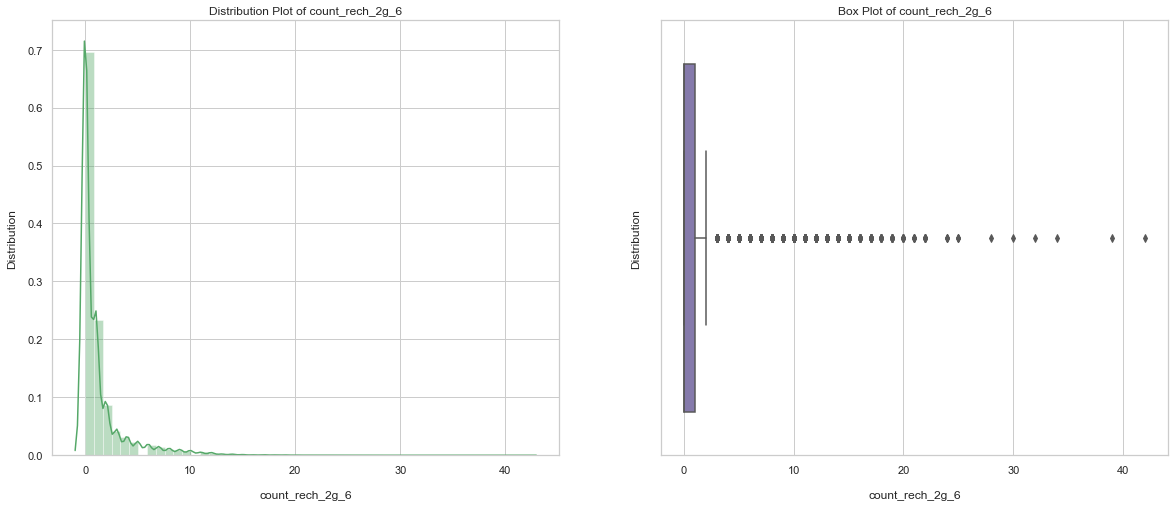

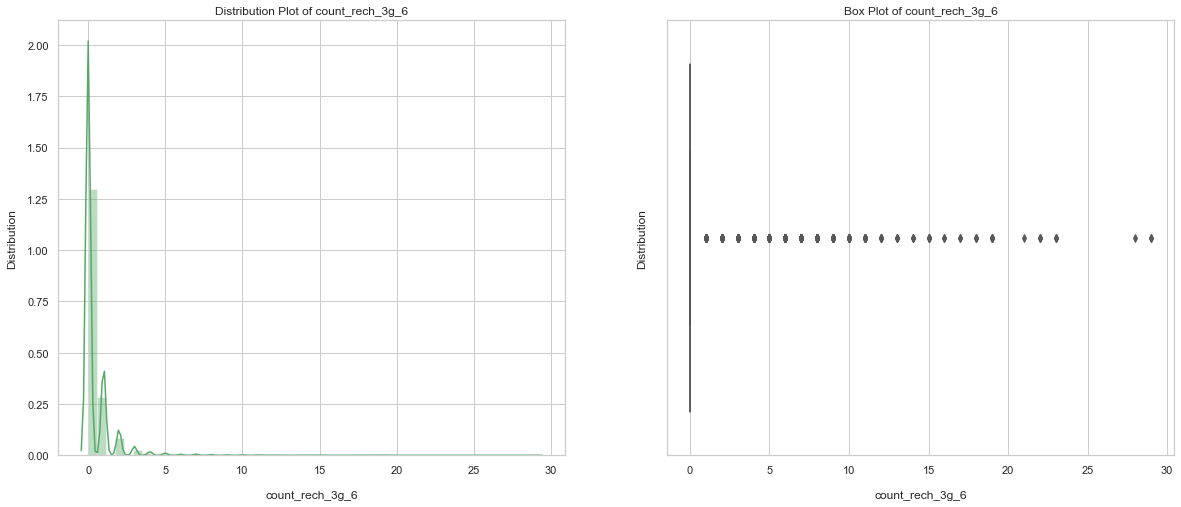

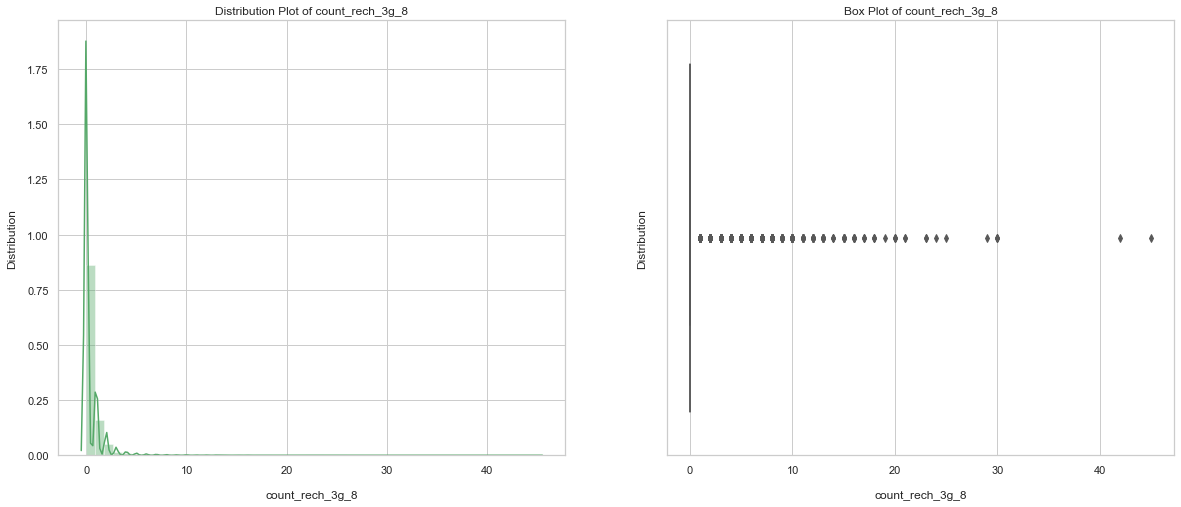

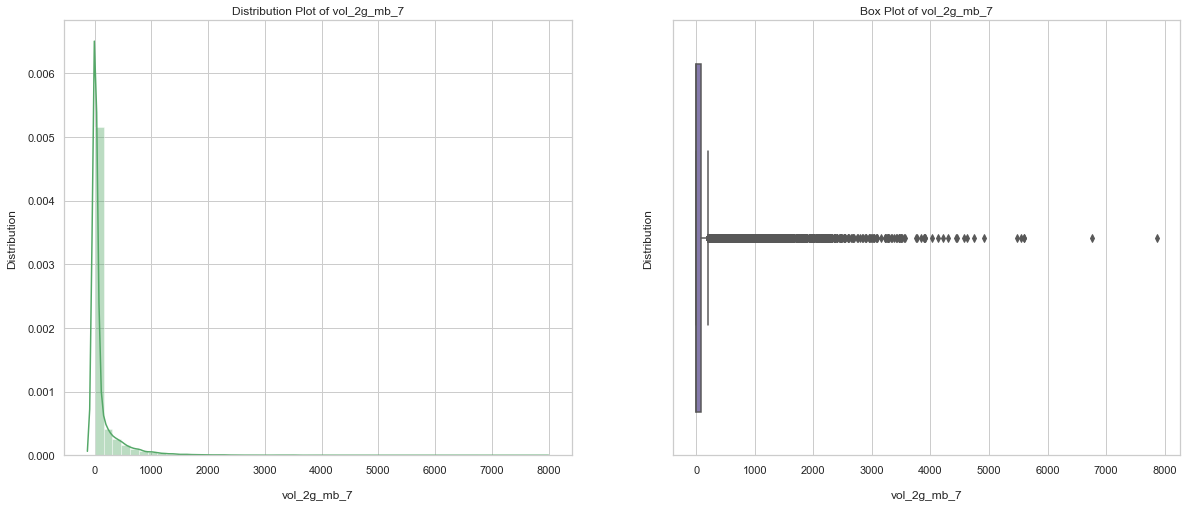

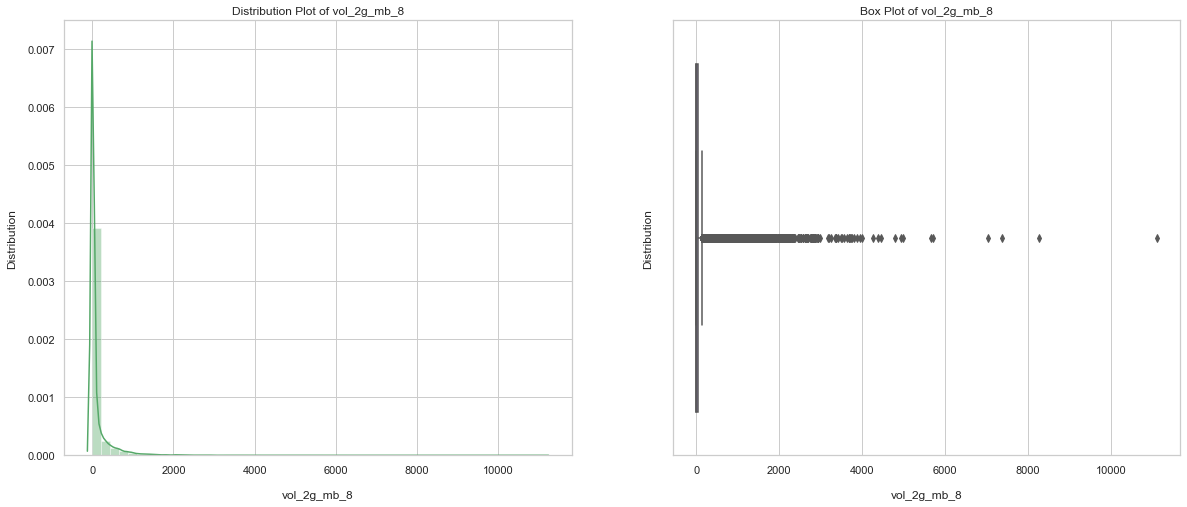

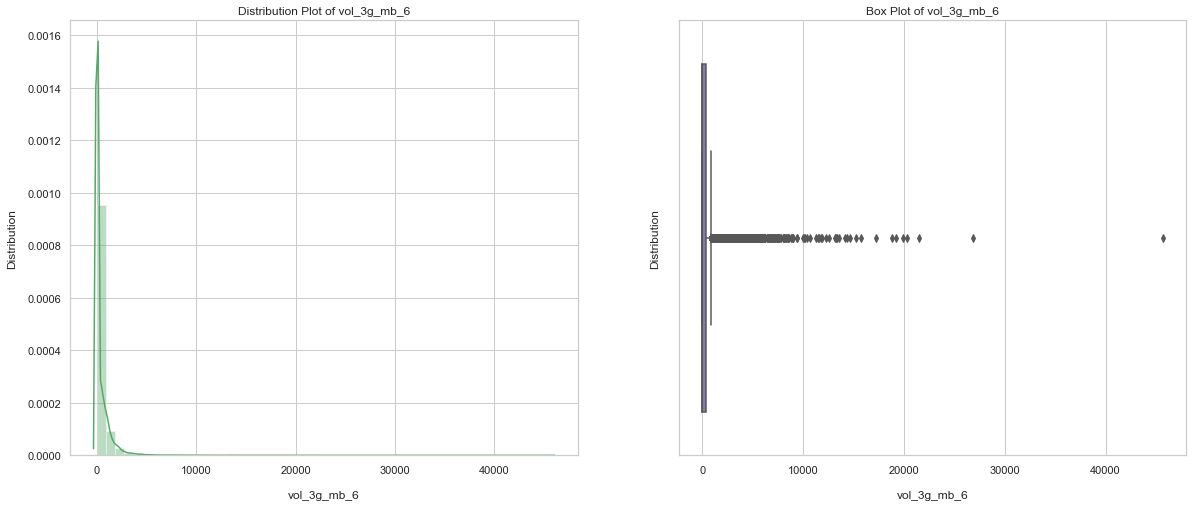

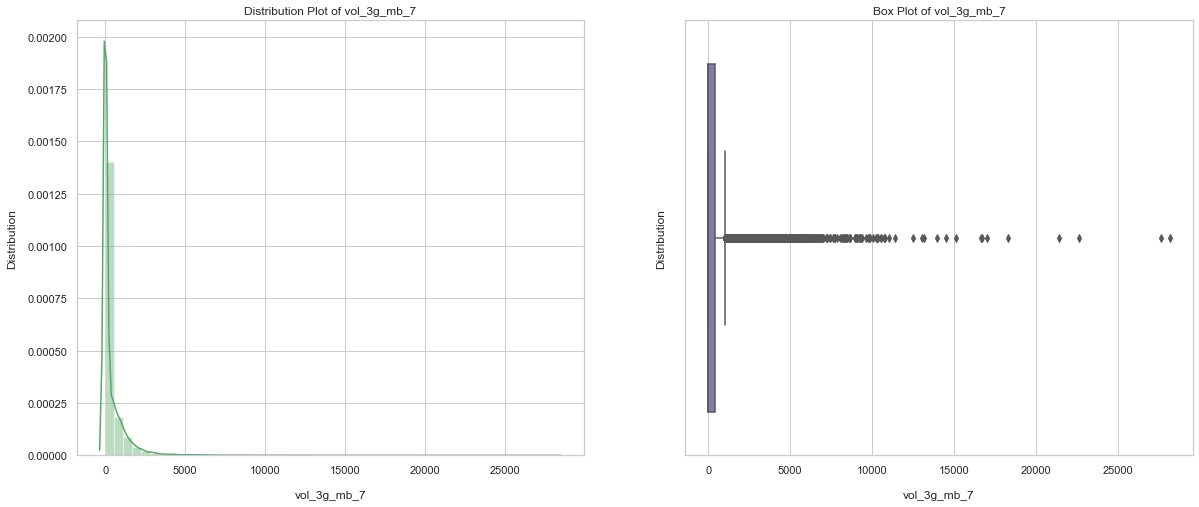

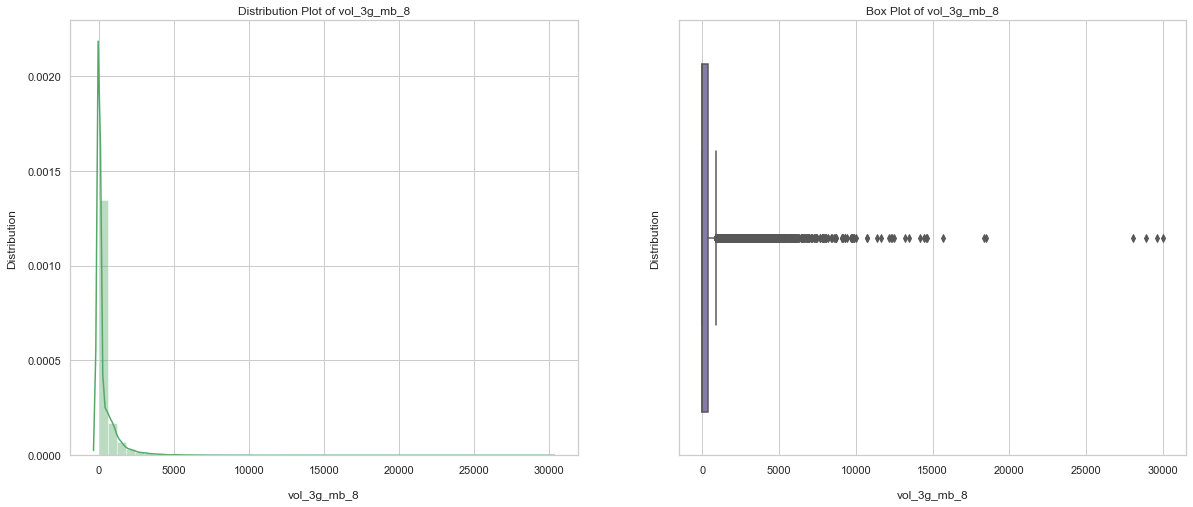

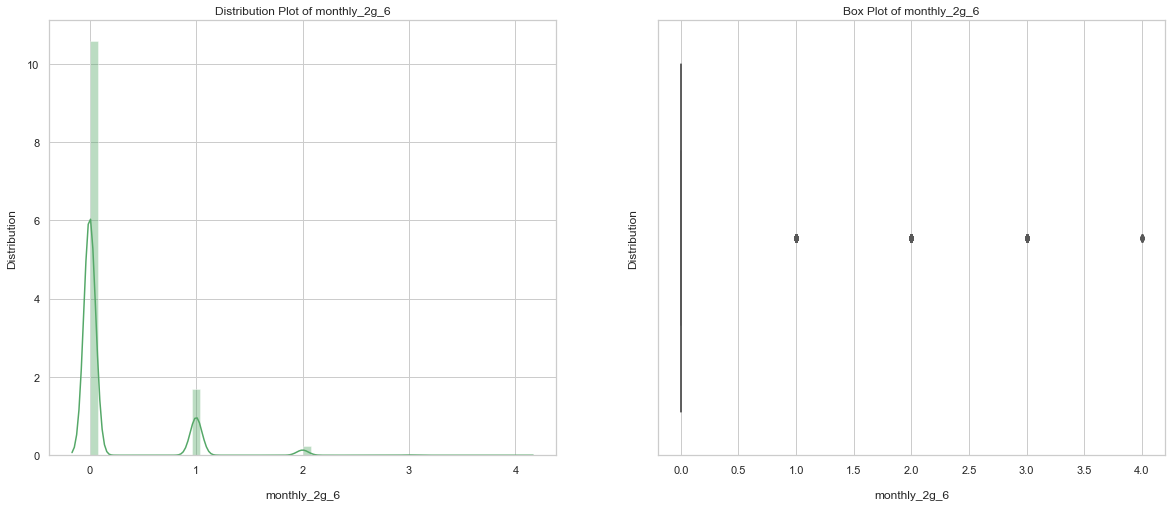

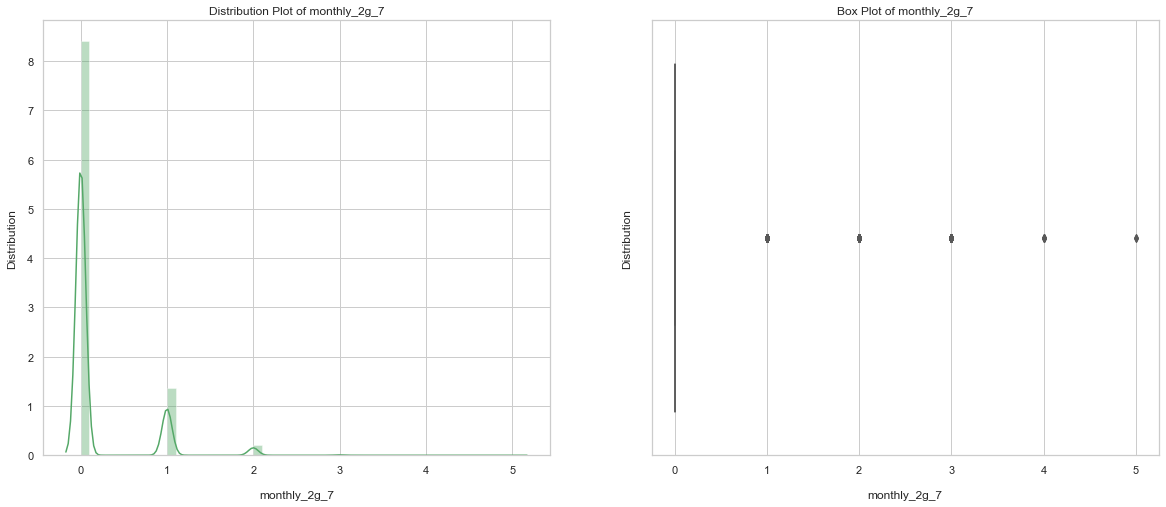

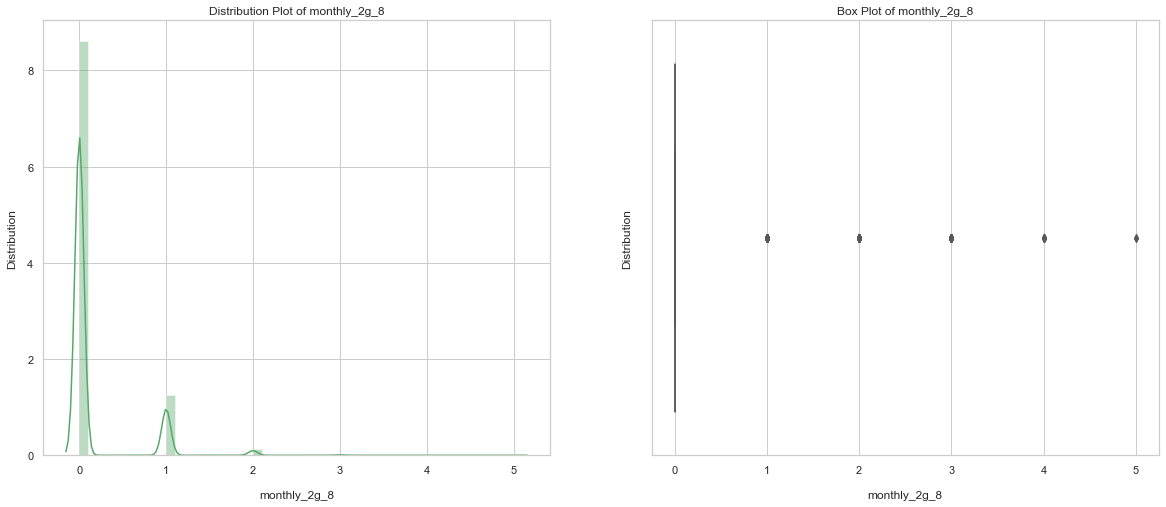

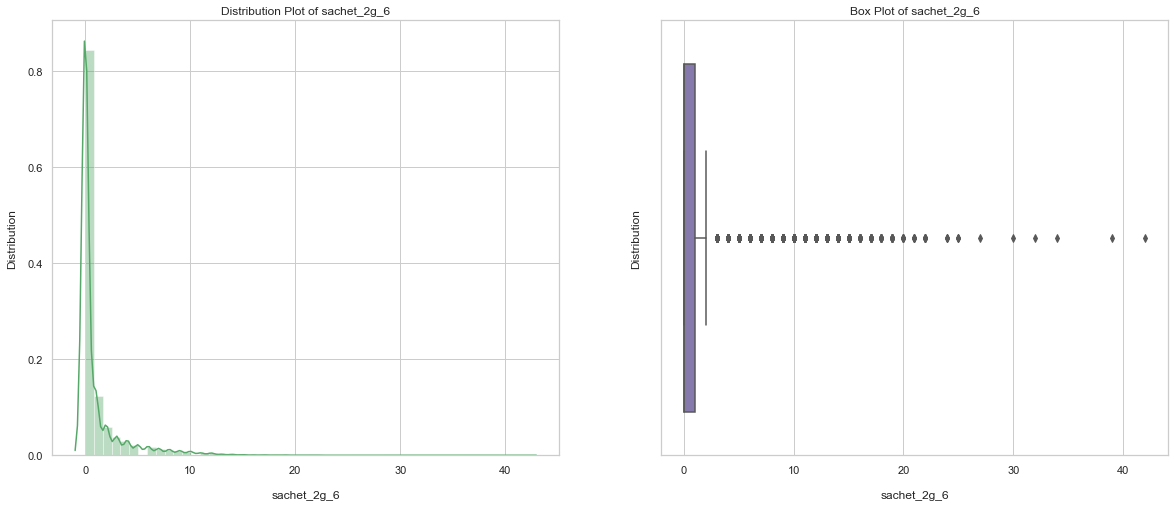

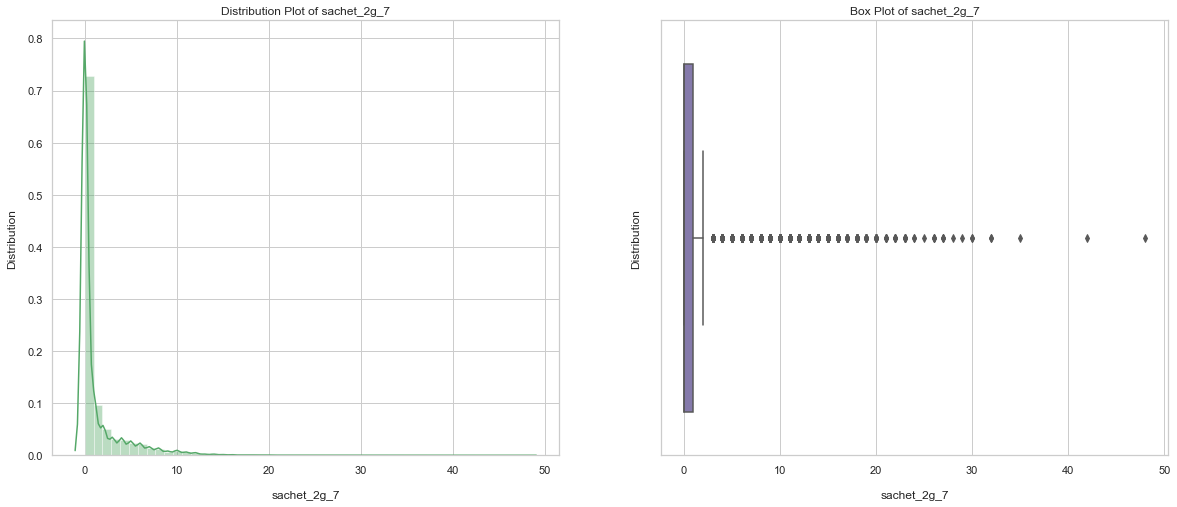

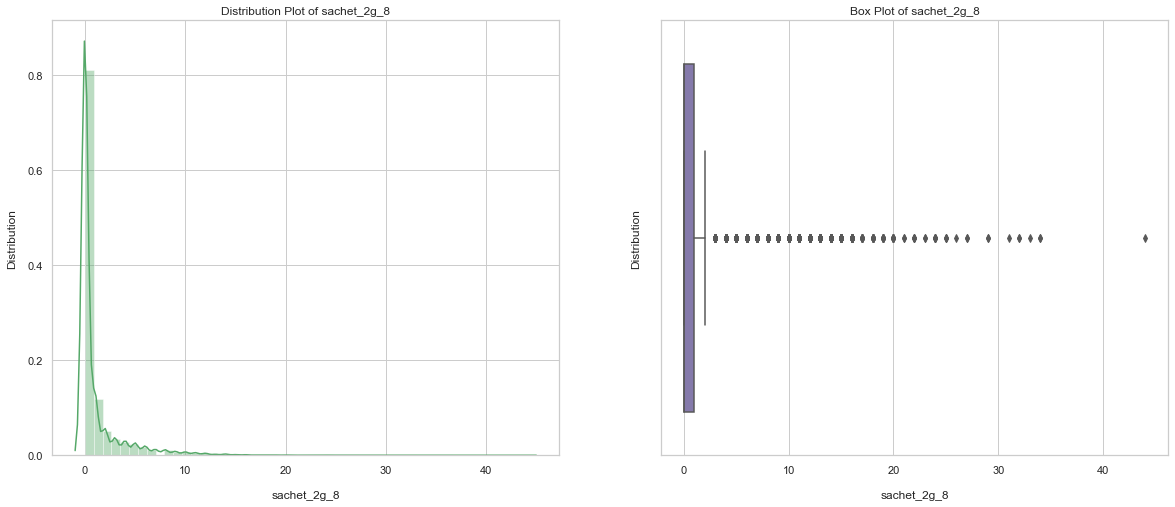

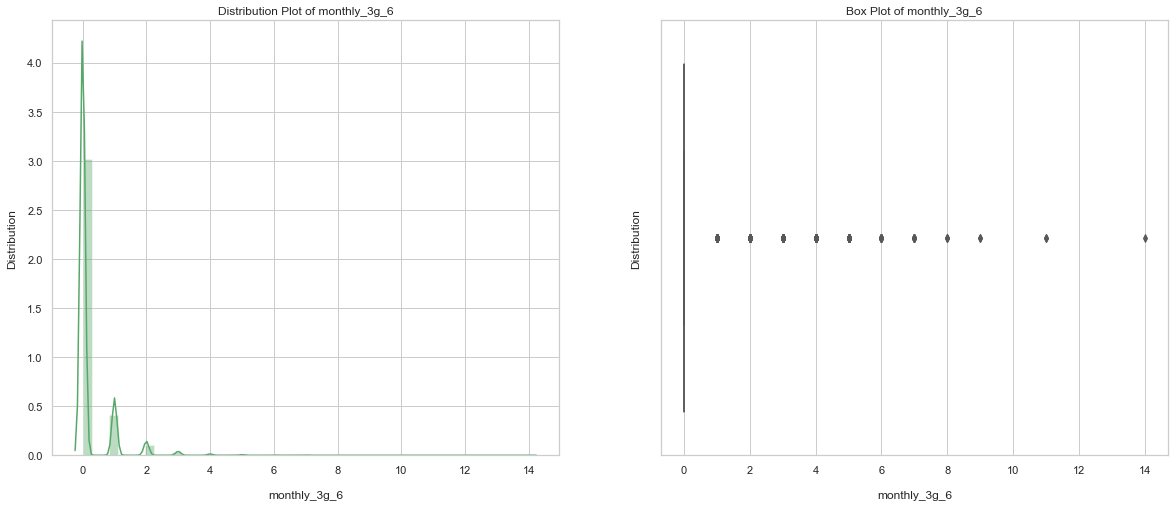

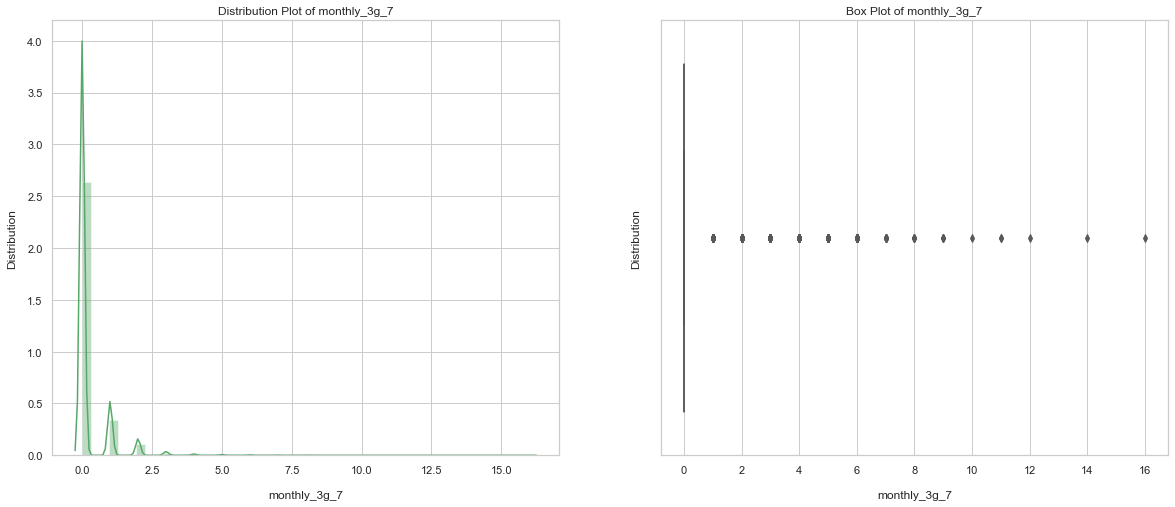

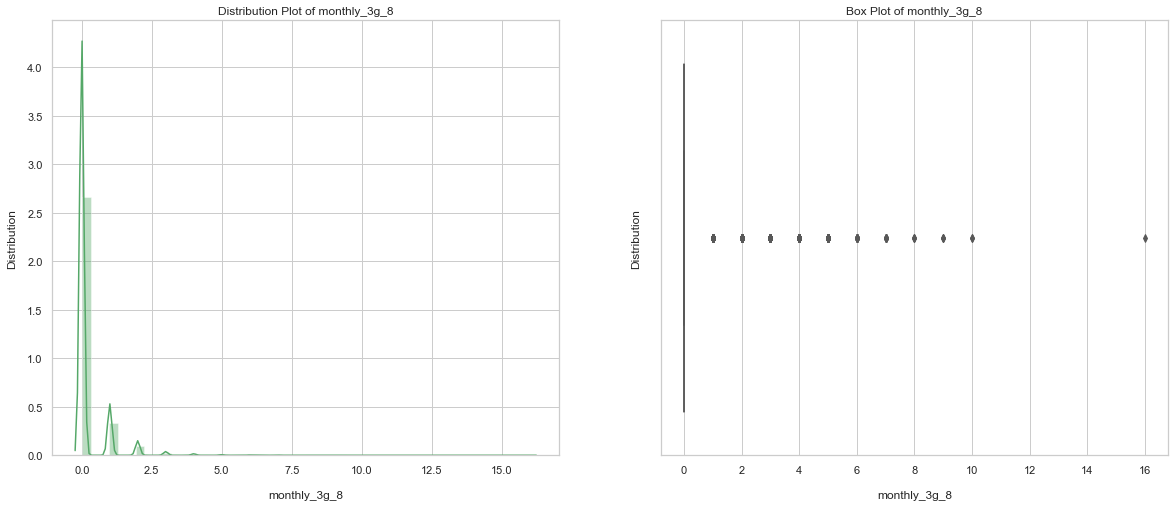

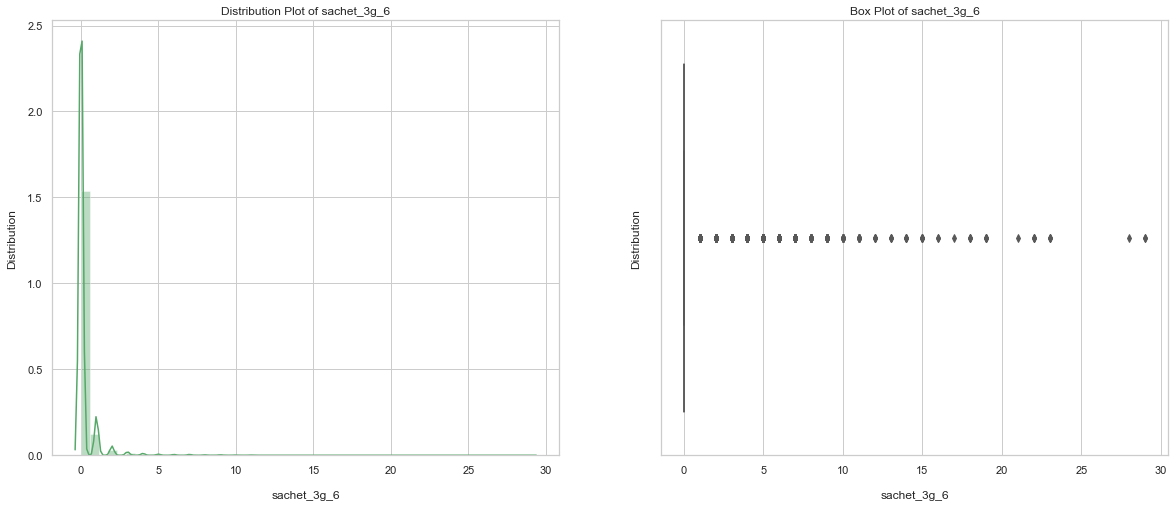

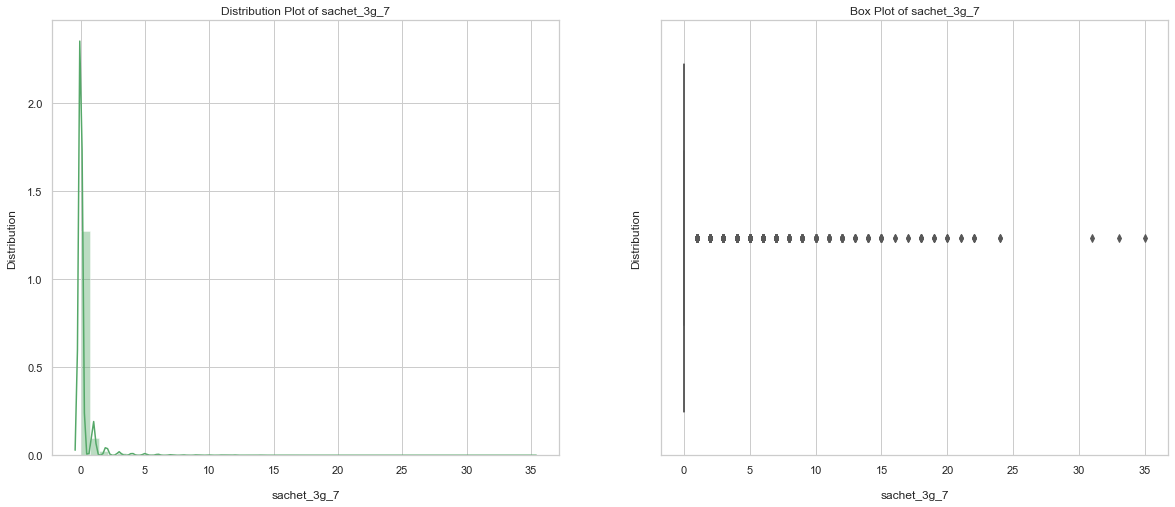

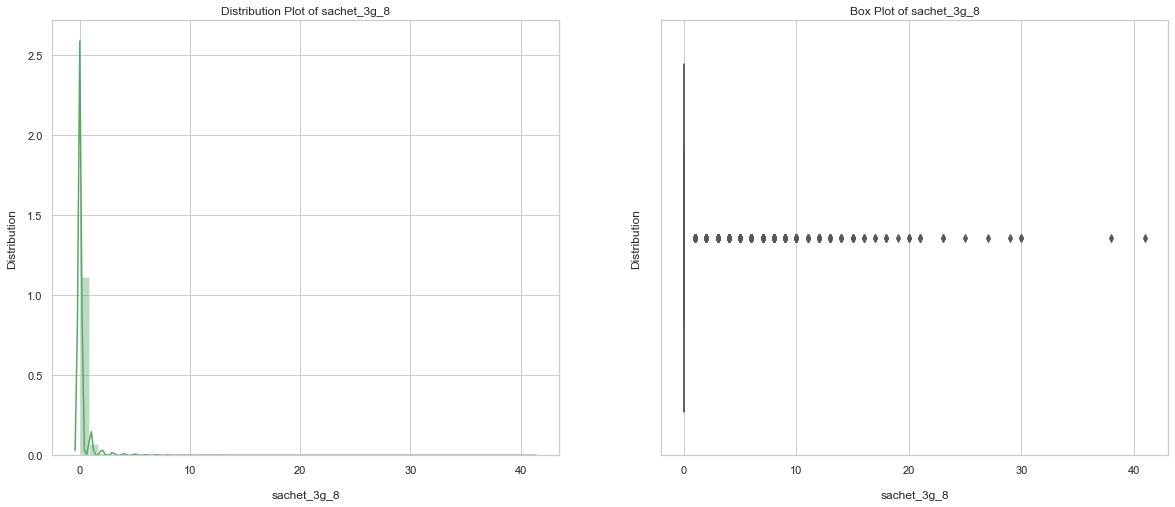

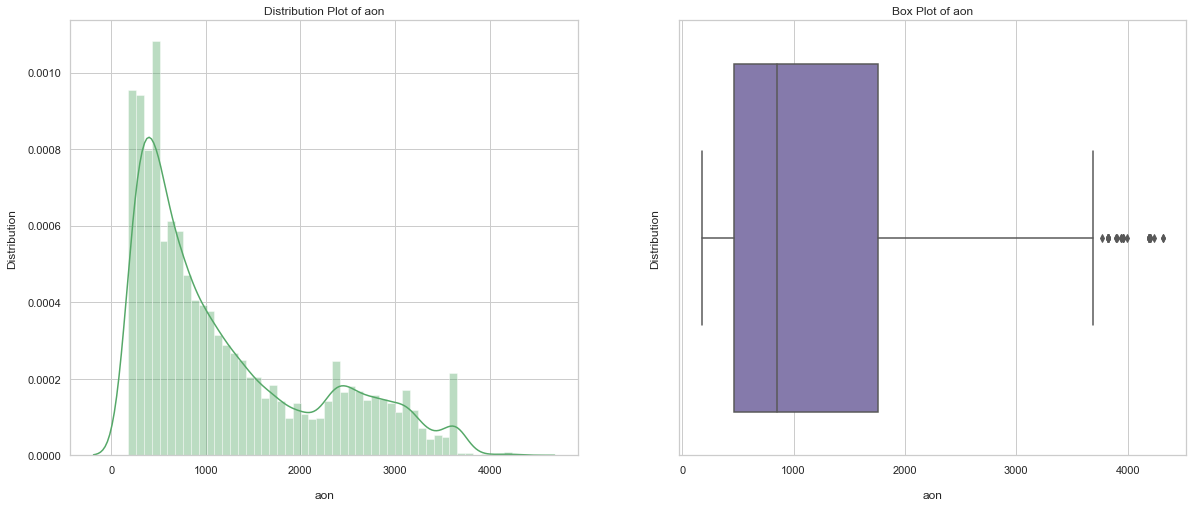

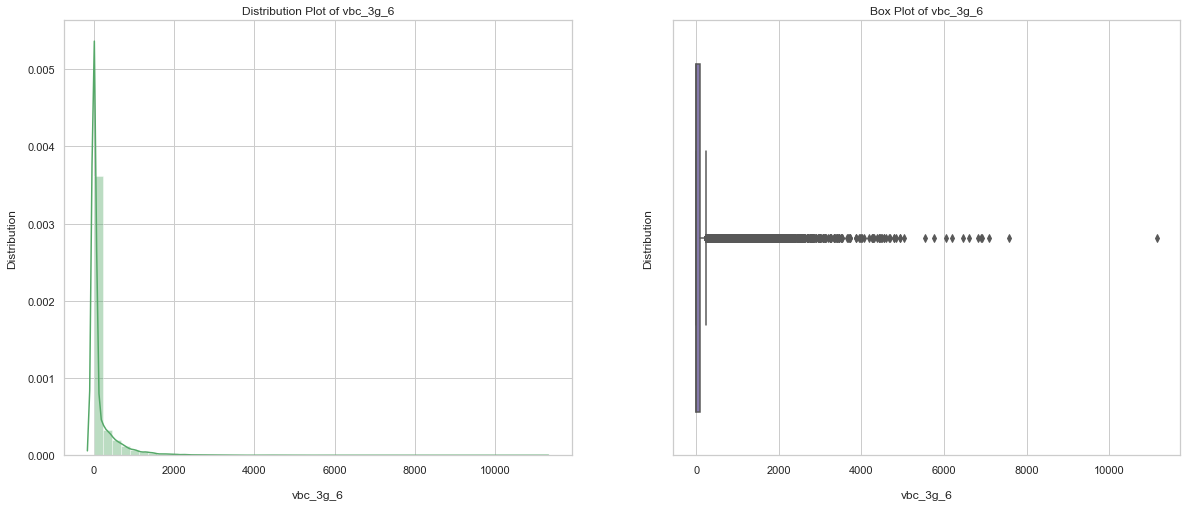

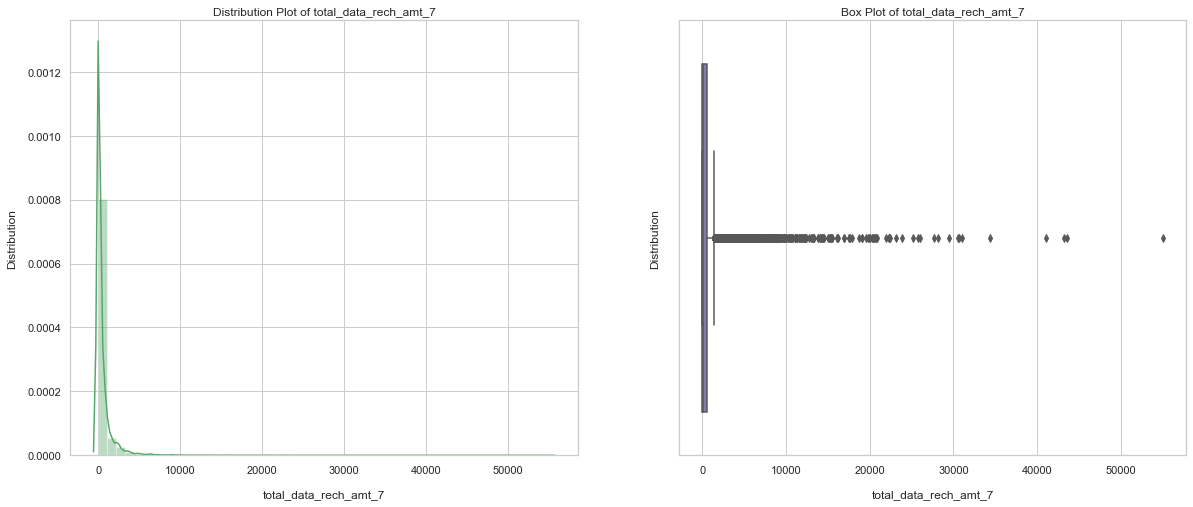

In [77]:
# Univariate Plot Analysis of Quantitative Variables

category_list = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 
                 'fb_user_6', 'fb_user_7', 'fb_user_8', 'churn']
counter = 1

for col_list in tel_churn.columns:
    
    if col_list not in category_list:
        
        # Call Custom Function
        plot_univariate(figsize_x = 20,
                        figsize_y = 8,
                        subplot_x = 1,
                        subplot_y = 2,
                        xlabel = col_list,
                        ylabel = "Distribution",
                        x_axis = col_list,
                        data = tel_churn,
                        wspace = 0.2)

        counter += 1

From these visualizations and observations, it is evident that there are many outliers in the features. We will use data normalization to correct in later stages. 

## Bivariate Analysis - Variables with hue = churn

In [80]:
# Custom Function for Bivariate Analysis

# Function Parameters   -

# y_axis                -      The series/variable to be plotted along the y-axis.

def plot_bivariate(y_axis):
    
    plt.figure(figsize = (15, 5))
    
    xlabel = "Churn"
    x_axis = "churn"
    
    title_1 = "Month 6 - " + xlabel
    title_2 = "Month 7 - " + xlabel
    title_3 = "Month 8 - " + xlabel
    
    print("\nData Visualization of churn vs " + y_axis)

    # Subplot - 1
    plt.subplot(1, 3, 1)

    sns.boxplot(x = x_axis, y = y_axis + "_6", hue = "churn", data = tel_churn, showfliers = False)
    #sns.barplot(x = x_axis, y = y_axis + "_6", hue = "churn", data = telecom_data)
    # Call Custom Function
    set_plotting_variable(title_1, xlabel, y_axis + "_6")

    # Subplot - 2
    plt.subplot(1, 3, 2)

    sns.boxplot(x = x_axis, y = y_axis + "_7", hue = "churn", data = tel_churn, showfliers = False)
    #sns.barplot(x = x_axis, y = y_axis + "_7", hue = "churn", data = telecom_data)
    # Call Custom Function
    set_plotting_variable(title_2, xlabel, y_axis + "_7")
    
    # Subplot - 3
    plt.subplot(1, 3, 3)

    sns.boxplot(x = x_axis, y = y_axis + "_8", hue = "churn", data = tel_churn, showfliers = False)
    #sns.barplot(x = x_axis, y = y_axis + "_8", hue = "churn", data = telecom_data)
    # Call Custom Function
    set_plotting_variable(title_3, xlabel, y_axis + "_8")
    
    plt.subplots_adjust(wspace = 0.4)
    plt.show()


Data Visualization of churn vs arpu



Data Visualization of churn vs onnet_mou



Data Visualization of churn vs offnet_mou


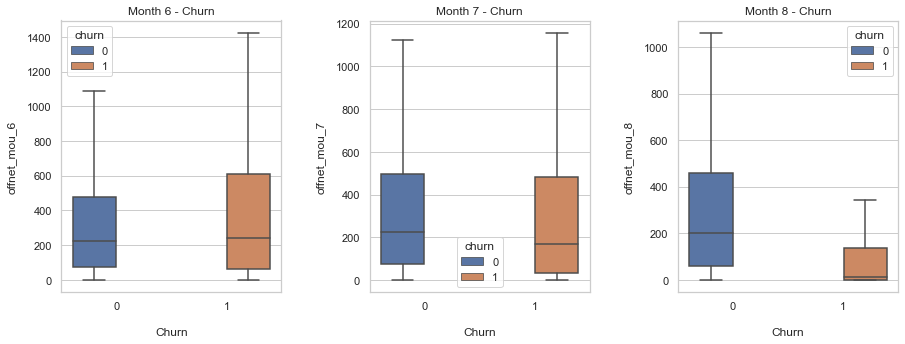


Data Visualization of churn vs total_og_mou



Data Visualization of churn vs total_ic_mou



Data Visualization of churn vs total_rech_num


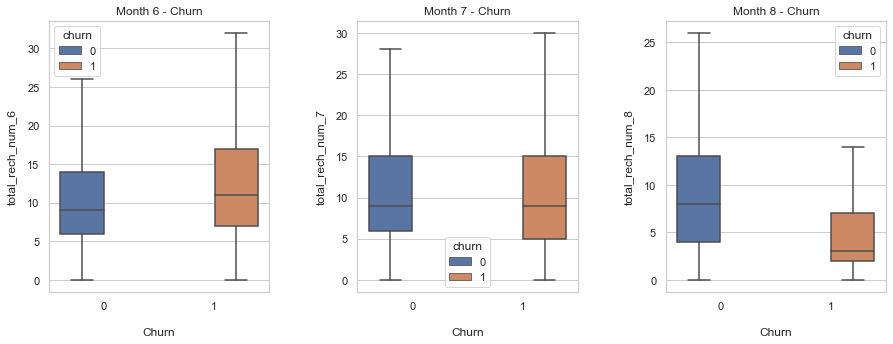


Data Visualization of churn vs total_rech_amt


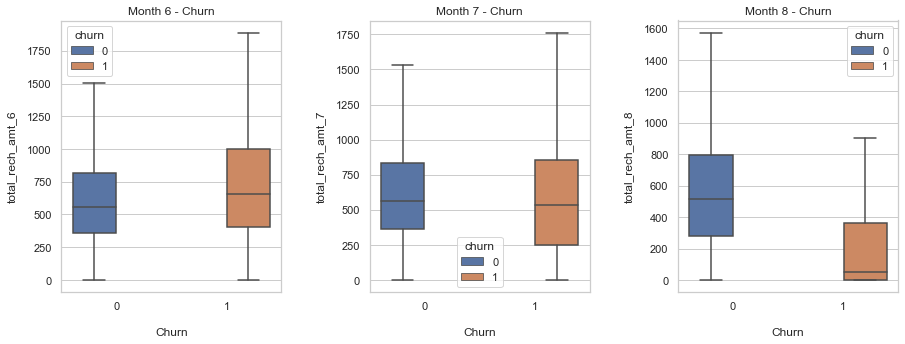


Data Visualization of churn vs total_rech_data



Data Visualization of churn vs vol_2g_mb



Data Visualization of churn vs vol_3g_mb



Data Visualization of churn vs vbc_3g



Data Visualization of churn vs total_data_rech_amt


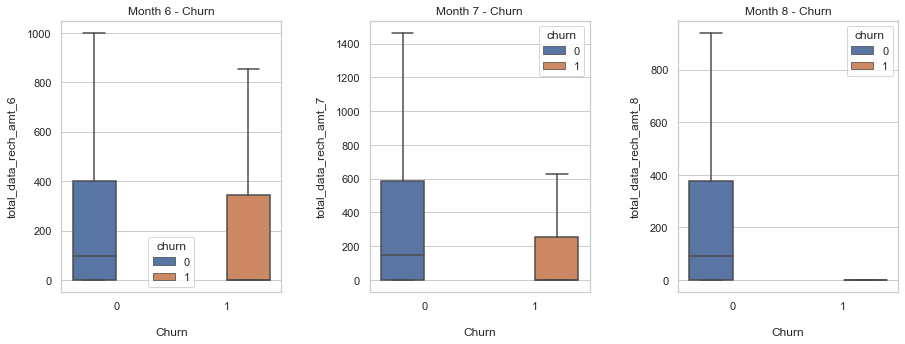

In [81]:
# Bivariate Analysis

plot_bivariate("arpu")

plot_bivariate("onnet_mou")

plot_bivariate("offnet_mou")

plot_bivariate("total_og_mou")

plot_bivariate("total_ic_mou")

plot_bivariate("total_rech_num")

plot_bivariate("total_rech_amt")

plot_bivariate("total_rech_data")

plot_bivariate("vol_2g_mb")

plot_bivariate("vol_3g_mb")

plot_bivariate("vbc_3g")

plot_bivariate("total_data_rech_amt")


## Bivariate analysis - Quantative variables 

In [83]:
# Let us drop circle_id as it may not be of any use

tel_churn.drop(['circle_id'], axis=1, inplace = True)


In [84]:
tel_churn.corr()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  og_others_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  ic_others_6  ic_others_7  ic_others_8  total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  total_rech_data_6  total_rech_data_7  total_rech_data_8  max_rech_data_6  max_rech_data_7  max_rech_data_8  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8  vol_3g_mb_6  vol_3g_mb_7  vol_3g_mb_8  night_pck_user_6  night_pck_user_7  night_pck_user_8  monthly_2g_6  monthly_2g_7  monthly_2g_8  sachet_2g_6  sachet_2g_7  sachet_2g_8  monthly_3g_6  monthly_3g_7  monthly_3g_8  sachet_3g_6  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  fb_user_8       aon  vbc_3g_8  vbc_3g_7  vbc_3g_6  total_data_rech_amt_6  total_data_rech_amt_7  total_data_rech_amt_8     churn
arpu_6                 1.000000  0.682003  0.619778  0.343885     0.218888     0.190011     0.515151      0.344861      0.293097      0.126446       0.084451       0.091188       0.193762       0.144104       0.125665       0.332272      0.250254      0.228189      0.389018      0.233674      0.187182      0.468214      0.423341      0.415527      0.122977      0.068927      0.045037      0.054344     0.024506     0.015547     0.560203        0.369345        0.309954        0.181510      0.142665      0.124397      0.124386      0.085947      0.079674      0.225125        0.169390        0.151226        0.030974     -0.034140     -0.011639      0.101627      0.063595      0.071179      0.016058     0.023974     0.012889     0.349319          0.136645          0.120199          0.955028          0.656232          0.611837          0.359418        0.270988        0.294987       -0.109153          -0.175949          -0.122931           0.072176        -0.021185         0.025441        -0.166031        -0.209324        -0.162884         0.090724         0.020739         0.035218        -0.063367    -0.099363    -0.078459     0.153220     0.071096     0.085465     0.014389         -0.005108          0.009911         -0.039621     -0.084621     -0.061778     -0.158811    -0.194619    -0.153057     0.177047      0.082135      0.104428     -0.002592    -0.025222    -0.017707    -0.121993  -0.198300  -0.141476   0.041807  0.059760  0.055983  0.112693  0.089954              -0.023367               0.003365               0.067199
arpu_7                 0.682003  1.000000  0.767143  0.212713     0.321003     0.270779     0.355968      0.492669      0.397986      0.092642       0.093467       0.093837       0.134787       0.180120       0.152270       0.215675      0.305336      0.256323      0.250161      0.382571      0.306308      0.420003      0.511164      0.454754      0.068380      0.115440      0.070322      0.018084     0.026200     0.017888     0.368902        0.538390        0.431726        0.109477      0.165308      0.143613      0.087636      0.123759      0.116897      0.140187        0.211376        0.184371        0.007778     -0.015937     -0.007898      0.059973      0.100083      0.082853      0.008028     0.023994     0.016718     0.166367          0.303032          0.219739          0.683232          0.953983          0.757663          0.267926        0.392793        0.375124       -0.165607          -0.096183          -0.09298

In [85]:
plt.figure(figsize = (25, 20))

sns.heatmap(tel_churn.corr())

plt.show()

In [86]:
# There are highly correlated values in this correlation matrix. Let's extract it 

corr_matrix = tel_churn.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
upper_triangle = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)))

highly_correlated_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.80)]
print("List of highly correlated features from the above plot - \n\n", highly_correlated_features)
print("\n\nTotal features with high correlation - ", len(highly_correlated_features))


List of highly correlated features from the above plot - 

 ['onnet_mou_8', 'loc_og_mou_7', 'loc_og_mou_8', 'isd_og_mou_7', 'isd_og_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_mou_7', 'loc_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8']


Total features with high correlation -  25


## Insight no 6 

There are total 25 columns that are highly correlated with each other greater than 0.80. We will not drop them now. We will use it and drop it during Principle Component Analysis

# Step 4 : Data Preparation 

 In churn prediction, we assume that there are three phases of customer lifecycle :

#### The ‘good’ phase: 

In this phase, the customer is happy with the service and behaves as usual.

#### The ‘action’ phase: 

The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

#### The ‘churn’ phase: 

In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.

#### Let us work over a four month window 6,7,8 and 9: The first two months are good phase. The third month is the action phase and the fourth month is the churn phase

In [87]:
# Custom Function to derive new good phase columns and drop the original columns 
def derive_good_action_phase(df, col):
    
    col_6 = col + "_6"
    col_7 = col + "_7"
    col_8 = col + "_8"
    good_phase_col = col + "_good_phase"
    action_phase_col = col + "_action_phase"
    
    df[good_phase_col] = (df[col_6] + df[col_7])/2
    df[action_phase_col] = df[col_8] - df[good_phase_col]
    
    df.drop([col_6, col_7, col_8], axis = 1, inplace = True)
    
    return df


In [89]:
# Deriving Good and Action Phase Variables

tel_churn = derive_good_action_phase(tel_churn, "arpu")

tel_churn = derive_good_action_phase(tel_churn, "onnet_mou")

tel_churn = derive_good_action_phase(tel_churn, "offnet_mou")

tel_churn = derive_good_action_phase(tel_churn, "roam_ic_mou")

tel_churn = derive_good_action_phase(tel_churn, "roam_og_mou")

tel_churn = derive_good_action_phase(tel_churn, "loc_og_mou")

tel_churn = derive_good_action_phase(tel_churn, "std_og_mou")

tel_churn = derive_good_action_phase(tel_churn, "isd_og_mou")

tel_churn = derive_good_action_phase(tel_churn, "spl_og_mou")

tel_churn = derive_good_action_phase(tel_churn, "og_others")

tel_churn = derive_good_action_phase(tel_churn, "total_og_mou")

tel_churn = derive_good_action_phase(tel_churn, "loc_ic_mou")

tel_churn = derive_good_action_phase(tel_churn, "std_ic_mou")

tel_churn = derive_good_action_phase(tel_churn, "spl_ic_mou")

tel_churn = derive_good_action_phase(tel_churn, "isd_ic_mou")

tel_churn = derive_good_action_phase(tel_churn, "ic_others")

tel_churn = derive_good_action_phase(tel_churn, "total_ic_mou")

tel_churn = derive_good_action_phase(tel_churn, "total_rech_num")

tel_churn = derive_good_action_phase(tel_churn, "total_rech_amt")

tel_churn = derive_good_action_phase(tel_churn, "max_rech_amt")

tel_churn = derive_good_action_phase(tel_churn, "total_rech_data")

tel_churn = derive_good_action_phase(tel_churn, "max_rech_data")

tel_churn = derive_good_action_phase(tel_churn, "count_rech_2g")

tel_churn = derive_good_action_phase(tel_churn, "count_rech_3g")

tel_churn = derive_good_action_phase(tel_churn, "vol_2g_mb")

tel_churn = derive_good_action_phase(tel_churn, "vol_3g_mb")

tel_churn = derive_good_action_phase(tel_churn, "monthly_2g")

tel_churn = derive_good_action_phase(tel_churn, "sachet_2g")

tel_churn = derive_good_action_phase(tel_churn, "monthly_3g")

tel_churn = derive_good_action_phase(tel_churn, "sachet_3g")

tel_churn = derive_good_action_phase(tel_churn, "vbc_3g")

tel_churn = derive_good_action_phase(tel_churn, "total_data_rech_amt")

tel_churn.head()

night_pck_user_6  night_pck_user_7  night_pck_user_8  fb_user_6  fb_user_7  fb_user_8  aon  churn  arpu_good_phase  arpu_action_phase  onnet_mou_good_phase  onnet_mou_action_phase  offnet_mou_good_phase  offnet_mou_action_phase  roam_ic_mou_good_phase  roam_ic_mou_action_phase  roam_og_mou_good_phase  roam_og_mou_action_phase  loc_og_mou_good_phase  loc_og_mou_action_phase  std_og_mou_good_phase  std_og_mou_action_phase  isd_og_mou_good_phase  isd_og_mou_action_phase  spl_og_mou_good_phase  spl_og_mou_action_phase  og_others_good_phase  og_others_action_phase  total_og_mou_good_phase  total_og_mou_action_phase  loc_ic_mou_good_phase  loc_ic_mou_action_phase  std_ic_mou_good_phase  std_ic_mou_action_phase  spl_ic_mou_good_phase  spl_ic_mou_action_phase  isd_ic_mou_good_phase  isd_ic_mou_action_phase  ic_others_good_phase  ic_others_action_phase  total_ic_mou_good_phase  total_ic_mou_action_phase  total_rech_num_good_phase  total_rech_num_action_phase  total_rech_amt_good_phase  total_rech_amt_action_phase  max_rech_amt_good_phase  max_rech_amt_action_phase  total_rech_data_good_phase  total_rech_data_action_phase  max_rech_data_good_phase  max_rech_data_action_phase  count_rech_2g_good_phase  count_rech_2g_action_phase  count_rech_3g_good_phase  count_rech_3g_action_phase  vol_2g_mb_good_phase  vol_2g_mb_action_phase  vol_3g_mb_good_phase  vol_3g_mb_action_phase  monthly_2g_good_phase  monthly_2g_action_phase  sachet_2g_good_phase  sachet_2g_action_phase  monthly_3g_good_phase  monthly_3g_action_phase  sachet_3g_good_phase  sachet_3g_action_phase  vbc_3g_good_phase  vbc_3g_action_phase  total_data_rech_amt_good_phase  total_data_rech_amt_action_phase
0   0                 0                 0                 1          1          1          968  1      206.1005         7.7025             0.00                  0.00                    0.000                  0.000                    0.00                    0.00                      0.000                   0.000                     0.000                  0.000                    0.000                  0.000                    0.000                  0.000                    0.00                   0.00                     0.0                   0.0                     0.000                    0.000                      0.000                  5.440                    0.000                  0.000                    0.000                  0.000                    0.000                  0.000                    0.000                 0.000                   0.000                    5.440                      3.5                       -1.5                          307.0                     -55.0                         252.0                    0.0                        1.0                         0.0                           252.0                     0.0                         0.0                       0.0                         1.0                       0.0                         15.725               -9.975                   117.165              -7.555                   0.0                    0.0                      0.0                   0.0                     1.0                    0.0                      0.0                   0.0                     50.600            -20.200               252.0                           0.0                             
7   0                 0                 0                 0          0          0          802  1      1209.5150        1961.9650          56.26                -3.97                    510.295               -184.385                  24.86                   6.78                      18.165                  19.895                    478.035               -222.245                  68.000                 9.840                    0.090                  9.920                    2.25                   4.25                     0.0                   0.0                     548.385                 -198.225                    391.555          

In [90]:
tel_churn.shape

(29824, 72)

# Step 5: Data Modelling, prediction and evaluation

## Train-test split 

In [91]:
X = tel_churn.drop('churn', axis = 1)
y = tel_churn[['churn']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(20876, 71)
(20876, 1)
(8948, 71)
(8948, 1)


## Logistics regression

In [257]:
# apply pca to train data

from sklearn.preprocessing import StandardScaler

pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])


In [258]:
pca.fit(X_train)
churn_pca = pca.fit_transform(X_train)

In [259]:
# extract pca model from pipeline
pca = pca.named_steps['pca']

# look at explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0     10.12 
1     18.28 
2     24.11 
3     29.05 
4     33.88 
5     37.91 
6     41.41 
7     44.47 
8     47.24 
9     49.86 
10    52.45 
11    54.91 
12    57.23 
13    59.51 
14    61.65 
15    63.74 
16    65.61 
17    67.46 
18    69.24 
19    70.98 
20    72.65 
21    74.25 
22    75.83 
23    77.31 
24    78.64 
25    79.97 
26    81.21 
27    82.41 
28    83.48 
29    84.55 
30    85.58 
31    86.57 
32    87.50 
33    88.35 
34    89.19 
35    89.95 
36    90.70 
37    91.45 
38    92.17 
39    92.86 
40    93.52 
41    94.15 
42    94.77 
43    95.37 
44    95.92 
45    96.41 
46    96.87 
47    97.30 
48    97.73 
49    98.15 
50    98.55 
51    98.87 
52    99.11 
53    99.33 
54    99.54 
55    99.70 
56    99.84 
57    99.99 
58    100.00
59    100.00
60    100.00
61    100.00
62    100.00
63    100.00
64    100.00
65    100.00
66    100.00
67    100.00
68    100.00
69    100.00
70    100.00
dtype: float64


In [260]:
# plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20)) # 100 elements on y-axis; 175 elements on x-axis; 20 is normalising factor
plt.plot(cumulative_variance)

## PCA and logistics regression

In [261]:
# create pipeline
PCA_VARS = 60
steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

In [262]:
# fit model
pipeline.fit(X_train, y_train)

# check score on train data
pipeline.score(X_train, y_train)

0.8072906687104809

## Evaluating on test data

In [264]:
from imblearn.metrics import sensitivity_specificity_support

# predict churn on test data
y_pred = pipeline.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))


[[6680 1584]
 [ 115  569]]
Sensitivity: 	0.83
Specificity: 	0.81
AUC:    	 0.9


## Hyperparameter tuning - PCA and Logistic Regression


In [265]:
# class imbalance
y_train.value_counts()/y_train.shape

churn
0        0.919525   
1        1680.000000
dtype: float64

In [266]:
# PCA
pca = PCA()

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression(class_weight={0:0.1, 1: 0.9})

# create pipeline
steps = [("scaler", StandardScaler()), 
         ("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [60, 80], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [267]:
# fit model
model.fit(X_train, y_train)


Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2'],
                         'pca__n_components': [60, 80]},
             scoring='roc_auc', verbose=1)

In [268]:
# cross validation results
pd.DataFrame(model.cv_results_)


mean_fit_time  std_fit_time  mean_score_time  std_score_time param_logistic__C param_logistic__penalty param_pca__n_components                                                                    params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score
0   0.686388       0.187359      0.000000         0.000000        0.1               l1                      60                      {'logistic__C': 0.1, 'logistic__penalty': 'l1', 'pca__n_components': 60} NaN                NaN                NaN                NaN                NaN                NaN              NaN              11             
1   0.131663       0.047638      0.000000         0.000000        0.1               l1                      80                      {'logistic__C': 0.1, 'logistic__penalty': 'l1', 'pca__n_components': 80} NaN                NaN                NaN                NaN                NaN                NaN              NaN              30             
2   1.574325       0.477245      0.070061         0.027921        0.1               l2                      60                      {'logistic__C': 0.1, 'logistic__penalty': 'l2', 'pca__n_components': 60}  0.884249           0.888190           0.895646           0.872379           0.882521           0.884597         0.007599        8              
3   0.202405       0.039198      0.000000         0.000000        0.1               l2                      80                      {'logistic__C': 0.1, 'logistic__penalty': 'l2', 'pca__n_components': 80} NaN                NaN                NaN                NaN                NaN                NaN              NaN              29             
4   0.544841       0.087622      0.000000         0.000000        0.5               l1                      60                      {'logistic__C': 0.5, 'logistic__penalty': 'l1', 'pca__n_components': 60} NaN                NaN                NaN                NaN                NaN                NaN              NaN              28             
5   0.159012       0.020920      0.000000         0.000000        0.5               l1                      80                      {'logistic__C': 0.5, 'logistic__penalty': 'l1', 'pca__n_components': 80} NaN                NaN                NaN                NaN                NaN                NaN              NaN              27             
6   2.121957       0.415484      0.067807         0.034067        0.5               l2                      60                      {'logistic__C': 0.5, 'logistic__penalty': 'l2', 'pca__n_components': 60}  0.885486           0.888725           0.896968           0.872752           0.883740           0.885534         0.007842        7              
7   0.245820       0.060608      0.000000         0.000000        0.5               l2                      80                      {'logistic__C': 0.5, 'logistic__penalty': 'l2', 'pca__n_components': 80} NaN                NaN                NaN                NaN                NaN                NaN              NaN              26             
8   0.526637       0.064073      0.000000         0.000000        1                 l1                      60                      {'logistic__C': 1, 'logistic__penalty': 'l1', 'pca__n_components': 60}   NaN                NaN                NaN                NaN                NaN                NaN              NaN              25             
9   0.164616       0.025428      0.000000         0.000000        1                 l1                      80                      {'logistic__C': 1, 'logistic__penalty': 'l1', 'pca__n_components': 80}   NaN                NaN                NaN                NaN                NaN                NaN              NaN              24             
10  2.028350       0.368398      0.064207         0.011646        1                 l2                      60                      {'logistic__C': 1, 'lo

In [269]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8857934213676625
Best hyperparameters:  {'logistic__C': 10, 'logistic__penalty': 'l2', 'pca__n_components': 60}


In [275]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC: \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[7016 1248]
 [ 133  551]]
Sensitivity: 	0.81
Specificity: 	0.85
AUC: 	 0.9


## Random Forest 

In [276]:
# random forest - the class weight is used to handle class imbalance - it adjusts the cost function
forest = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)

# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)


In [277]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.1, 1: 0.9},
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 0.4]},
             scoring='roc_auc', verbose=1)

In [278]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.909414669295803
Best hyperparameters:  {'criterion': 'entropy', 'max_features': 'auto'}


In [279]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))


[[8147  117]
 [ 408  276]]
Sensitivity: 	0.4
Specificity: 	0.99
AUC:    	 0.92


In [ ]:
# Poor sensitivity. The best model is PCA along with Logistic regression.

### Lets choose the best features

In [284]:
# run a random forest model on train data
max_features = int(round(np.sqrt(X_train.shape[1])))    # number of variables to consider to split each node
print(max_features)

rf_model = RandomForestClassifier(n_estimators=100, max_features=max_features, class_weight={0:0.1, 1: 0.9}, oob_score=True, random_state=4, verbose=1)

8


In [285]:
# fit model
rf_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    8.7s finished


RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, max_features=8,
                       oob_score=True, random_state=4, verbose=1)

In [286]:
# OOB score
rf_model.oob_score_

0.9325541291435141

In [287]:
len(X_train.columns)


71

In [288]:
# predict churn on test data
y_pred = rf_model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[[8149  115]
 [ 438  246]]
Sensitivity: 	0.36
Specificity: 	0.99
ROC:    	 0.92


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


## Feature Importance 

In [291]:
# predictors
features = tel_churn.drop("churn", axis=1).columns

# feature_importance
importance = rf_model.feature_importances_

# create dataframe
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())
feature_importance

Sum of importance= 99.99999999999997


variables  importance_percentage
0   arpu_action_phase                 8.279569             
1   total_rech_amt_action_phase       5.865930             
2   total_ic_mou_action_phase         5.289672             
3   max_rech_amt_action_phase         4.052516             
4   loc_ic_mou_action_phase           3.791171             
5   total_rech_num_action_phase       3.414147             
6   std_ic_mou_action_phase           3.175466             
7   total_og_mou_action_phase         3.136443             
8   loc_ic_mou_good_phase             2.932819             
9   loc_og_mou_action_phase           2.906734             
10  roam_og_mou_action_phase          2.834420             
11  fb_user_8                         2.636900             
12  std_og_mou_action_phase           2.579660             
13  onnet_mou_action_phase            2.493835             
14  loc_og_mou_good_phase             2.475890             
15  offnet_mou_action_phase           2.356317             
16  roam_ic_mou_action_phase          2.238506             
17  total_ic_mou_good_phase           2.070753             
18  total_og_mou_good_phase           1.739567             
19  spl_og_mou_action_phase           1.685035             
20  aon                               1.605359             
21  vol_2g_mb_action_phase            1.586942             
22  total_rech_amt_good_phase         1.555613             
23  arpu_good_phase                   1.511415             
24  max_rech_data_action_phase        1.352597             
25  offnet_mou_good_phase             1.351251             
26  total_data_rech_amt_action_phase  1.216962             
27  std_og_mou_good_phase             1.205997             
28  onnet_mou_good_phase              1.189393             
29  total_rech_data_action_phase      1.170303             
30  max_rech_amt_good_phase           1.110825             
31  total_rech_num_good_phase         1.064499             
32  std_ic_mou_good_phase             1.062411             
33  ic_others_action_phase            1.054434             
34  vol_3g_mb_action_phase            0.982930             
35  roam_og_mou_good_phase            0.938116             
36  vbc_3g_action_phase               0.907847             
37  spl_ic_mou_action_phase           0.897853             
38  spl_og_mou_good_phase             0.834798             
39  max_rech_data_good_phase          0.816428             
40  roam_ic_mou_good_phase            0.814053             
41  isd_ic_mou_action_phase           0.766682             
42  vol_2g_mb_good_phase              0.720315             
43  total_data_rech_amt_good_phase    0.665072             
44  vol_3g_mb_good_phase              0.591764             
45  sachet_2g_action_phase            0.544443             
46  count_rech_2g_action_phase        0.525828             
47  vbc_3g_good_phase                 0.479671             
48  ic_others_good_phase              0.454685             
49  spl_ic_mou_good_phase             0.385606             
50  isd_ic_mou_good_phase             0.380217             
51  total_rech_data_good_phase        0.375590             
52  og_others_good_phase              0.374181             
53  og_others_action_phase            0.370454             
54  isd_og_mou_action_phase           0.353638             
55  count_rech_2g_good_phase          0.352096             
56  count_rech_3g_action_phase        0.290342             
57  sachet_2g_good_phase              0.267594             
58  isd_og_mou_good_phase             0.260599             
59  count_rech_3g_good_phase          0.245459             
60  monthly_2g_good_phase             0.201496             
61  sachet_3g_action_phase            0.195799             
62  monthly_3g_action_phase           0.183460             
63  monthly_3g_good_phase             0.181152             
64  monthly_2g_action_phase           0.173709             
65  sachet_3g_good_phase              0.170769             
66  fb_

## Extracting top 30 features

In [292]:
# extract top 'n' features
top_n = 30
top_features = feature_importance.variables[0:top_n]

<AxesSubplot:>

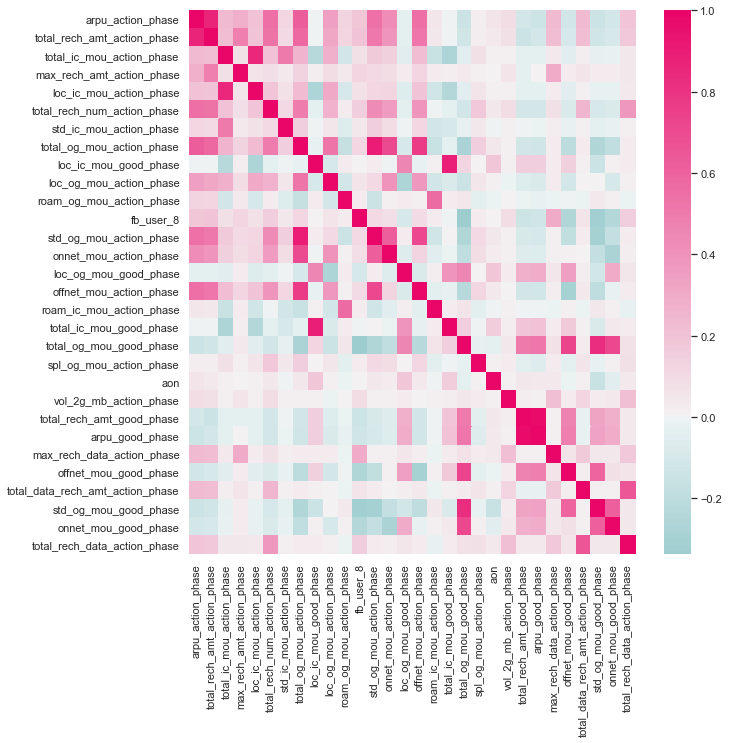

In [293]:
# plot feature correlation
import seaborn as sns
plt.rcParams["figure.figsize"] =(10,10)
mycmap = sns.diverging_palette(199, 359, s=99, center="light", as_cmap=True)
sns.heatmap(data=X_train[top_features].corr(), center=0.0, cmap=mycmap)


In [294]:
top_features = ["arpu_action_phase", "total_rech_amt_action_phase", "total_ic_mou_action_phase", 
               "max_rech_amt_action_phase", "loc_ic_mou_action_phase", "total_rech_num_action_phase",
               "std_ic_mou_action_phase", "total_og_mou_action_phase", "loc_ic_mou_good_phase", "loc_og_mou_action_phase"]

X_train = X_train[top_features]
X_test = X_test[top_features]


In [295]:
# logistic regression
steps = [('scaler', StandardScaler()), 
         ("logistic", LogisticRegression(class_weight={0:0.1, 1:0.9}))
        ]

# compile pipeline
logistic = Pipeline(steps)

# hyperparameter space
params = {'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)


In [296]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

In [297]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)


Best AUC:  0.8626279404804544
Best hyperparameters:  {'logistic__C': 10, 'logistic__penalty': 'l2'}


## Evaluate the model 

In [305]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm_load = confusion_matrix(y_test, y_pred)
print(cm_load)

# check sensitivity and specificity
sensitivity_load, specificity_load, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity_load, 2), "\n", "Specificity: \t", round(specificity_load, 2), sep='')

# check area under curve
y_pred_prob_load = model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob_load),2))


[[7020 1244]
 [ 150  534]]
Sensitivity: 	0.78
Specificity: 	0.85
ROC:    	 0.88


## Evaluate the trained model object

In [306]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[7020 1244]
 [ 150  534]]
Sensitivity: 	0.78
Specificity: 	0.85
ROC:    	 0.88


## Extract the intercept and the coefficients from the logistic model

In [307]:
logistic_model = model.best_estimator_.named_steps['logistic']

In [308]:
# intercept
intercept_df = pd.DataFrame(logistic_model.intercept_.reshape((1,1)), columns = ['intercept'])


In [310]:
# coefficients
coefficients = logistic_model.coef_.reshape((10, 1)).tolist()
coefficients = [val for sublist in coefficients for val in sublist]
coefficients = [round(coefficient, 3) for coefficient in coefficients]

logistic_features = list(X_train.columns)
coefficients_df = pd.DataFrame(logistic_model.coef_, columns=logistic_features)


In [311]:
# concatenate dataframes
coefficients = pd.concat([intercept_df, coefficients_df], axis=1)
coefficients

intercept  arpu_action_phase  total_rech_amt_action_phase  total_ic_mou_action_phase  max_rech_amt_action_phase  loc_ic_mou_action_phase  total_rech_num_action_phase  std_ic_mou_action_phase  total_og_mou_action_phase  loc_ic_mou_good_phase  loc_og_mou_action_phase
0 -1.448501  -0.158831          -0.198646                    -0.152709                  -0.192973                  -1.46                    -0.312002                    -0.084488                -0.182629                  -1.999821              -0.002573

# Step 6: Findings 

- Telecom company should focus on roaming rates. They must provide good offers to customers who use the mobile and internet services from a roaming area

- The company should focus on STD and ISD rates. They are too high. So, they must reduce it

- Telecom company should collect customer query and complaint data and work on it iteratively

The winner of this analysis is the logistics regression with Principle Component Analysis 

### Top 10 features affecting the churn (Most features belong to the action phase)


1. arpu_action_phase	
2. total_rech_amt_action_phase	
3. total_ic_mou_action_phase	
4. max_rech_amt_action_phase	
5. loc_ic_mou_action_phase	
6. total_rech_num_action_phase	
7. std_ic_mou_action_phase	
8. total_og_mou_action_phase	
9. loc_ic_mou_good_phase	
10. loc_og_mou_action_phase	